In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from torch.nn import MSELoss
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import copy
from IPython.display import display, Math, Latex

import Formula
import functions
import importlib
from hessian import hessian
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

device = torch.device("cpu")
if torch.cuda.is_available():
    device = torch.device("cuda")

In [2]:
importlib.reload(Formula)
importlib.reload(functions)

<module 'functions' from '/home/zybinmikhail/Documents/LearningFormulas/functions.py'>

In [3]:
def PrettyRepresent(some_tensor):
    return some_tensor.cpu().numpy()[0].tolist()

# Делаем обучающую выборку

In [4]:
X1 = torch.rand(1000, 1) * 1000
X2 = torch.rand(1000, 1) * 1000
X3 = torch.rand(1000, 1) * 1000
X = torch.cat([X1, X2, X3], dim=1).to(device)
assert X.shape[1] == 3
X = X.to(device)
print(X)

tensor([[594.1002, 627.7140, 572.0235],
        [591.3568, 840.5191,  53.4200],
        [950.5255, 136.1736,  45.3991],
        ...,
        [630.9435, 897.3044, 731.8533],
        [388.4684, 568.5702, 954.2451],
        [464.6778, 570.5646, 594.8464]])


# Обучение

Example 1
[41.0, -48.0, 43.0] [13, 33, 44] [3.153846263885498, -1.454545497894287, 0.9772727489471436]
[23.0, -44.0, -42.0] [17, 45, 14] [1.3529411554336548, -0.9777777791023254, -3.0]

	Bootstrap attempt # 0
		Initiation #1
		Epoch 5000, current loss 8.81e+02, current formula \left(2.94x_1^{1.36}-8.1x_2^{0.101}-4.22e+02x_3^{-2.58} + 86.8\right)
		Epoch 10000, current loss 23.1, current formula \left(3.12x_1^{1.35}-8.31x_2^{0.047}-98.5x_3^{-2.89} + 22.6\right)
		Finished run #1, loss 23.053804397583008, best loss 23.053804397583008
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 109730.28125, best loss 23.053804397583008
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 121575144.0, best loss 23.053804397583008
		Initiation #4
		Epoch 5000, current loss 4.77e+02, current formula \left(2.99x_1^{1.36} + 0.108x_2^{0.392}-17.0x_3^{-0.354} + 54.3\right)
		Epoch 10000, current loss 28.

<IPython.core.display.Math object>

/home/zybinmikhail/Documents/LearningFormulas/functions.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.log2((1 + torch.abs(torch.tensor(denominator))) * torch.abs(torch.tensor(numerator)))


<IPython.core.display.Math object>

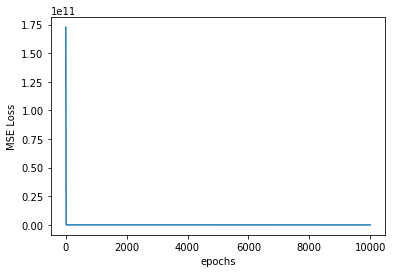

	Hessian at (1, 1, 1)
	 tensor([[ 1.4977e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  3.7221e-01,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -1.1082e+03]], grad_fn=<CopySlices>)
	Bootstrap attempt # 1
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 121556904.0, best loss 121556904.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 121575312.0, best loss 121556904.0
		Initiation #3
		Epoch 5000, current loss 22.6, current formula \left(3.12x_1^{1.35} + 4.05x_2^{-0.87}-81.7x_3^{-2.69} + 11.6\right)
		Epoch 10000, current loss 22.6, current formula \left(3.12x_1^{1.35} + 4.05x_2^{-0.87}-81.7x_3^{-2.69} + 11.6\right)
		Finished run #3, loss 22.626861572265625, best loss 22.626861572265625
		Initiation #4
		Epoch 5000, current loss 6.95e+02, current formula \left(3.36x_1^{1.34}-29.3x_2^{-0.851} + 1.49x_3^{0.233}-70.0\right)
		Epoch 10000, current loss 23.0, current fo

<IPython.core.display.Math object>

<IPython.core.display.Math object>

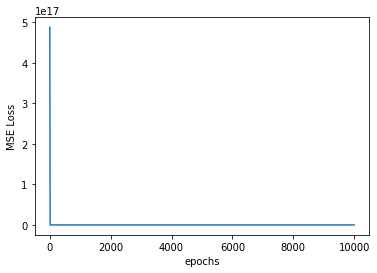

	Hessian at (1, 1, 1)
	 tensor([[   1.4977,    0.0000,    0.0000],
        [   0.0000,    6.5841,    0.0000],
        [   0.0000,    0.0000, -810.7128]], grad_fn=<CopySlices>)
	Bootstrap attempt # 2
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 75981968.0, best loss 75981968.0
		Initiation #2
		Epoch 5000, current loss 21.9, current formula \left(3.12x_1^{1.35}-3.5x_2^{0.0641}-3.69x_3^{-0.274} + 17.2\right)
		Epoch 10000, current loss 21.9, current formula \left(3.12x_1^{1.35}-3.5x_2^{0.0641}-3.69x_3^{-0.274} + 17.2\right)
		Finished run #2, loss 21.904043197631836, best loss 21.904043197631836
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 76606528.0, best loss 21.904043197631836
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 75814208.0, best loss 21.904043197631836
		Initiation #5
		Epoch 5000, current loss 6.85e+03, 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

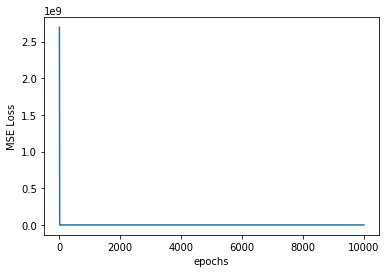

	Hessian at (1, 1, 1)
	 tensor([[ 1.4979,  0.0000,  0.0000],
        [ 0.0000,  0.2103,  0.0000],
        [ 0.0000,  0.0000, -1.2860]], grad_fn=<CopySlices>)
	Bootstrap attempt # 3
		Initiation #1
		Epoch 5000, current loss 24.7, current formula \left(3.12x_1^{1.35} + 0.000151x_2^{1.13}-5.89x_3^{0.0508} + 19.9\right)
		Epoch 10000, current loss 24.7, current formula \left(3.12x_1^{1.35} + 0.000151x_2^{1.13}-5.89x_3^{0.0508} + 19.9\right)
		Finished run #1, loss 24.696182250976562, best loss 24.696182250976562
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 121575488.0, best loss 24.696182250976562
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 121567720.0, best loss 24.696182250976562
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 75648552.0, best loss 24.696182250976562
		Initiation #5
		The model does not seem to conver

<IPython.core.display.Math object>

<IPython.core.display.Math object>

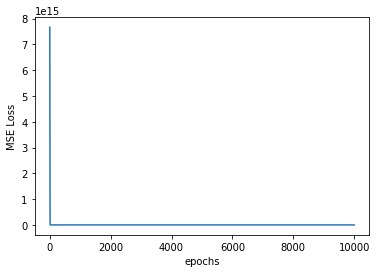

	Hessian at (1, 1, 1)
	 tensor([[1.4974e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.1427e-05, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 2.8402e-01]], grad_fn=<CopySlices>)
	Bootstrap attempt # 4
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 75773168.0, best loss 75773168.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 75662056.0, best loss 75662056.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 75195664.0, best loss 75195664.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 121564896.0, best loss 75195664.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 121572464.0, best loss 75195664.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

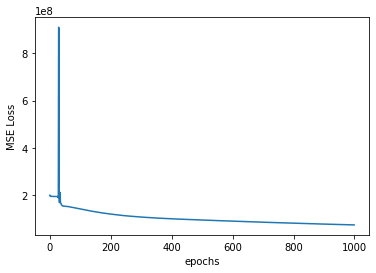

	Hessian at (1, 1, 1)
	 tensor([[-9.5946e+03,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -2.3421e-01,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -9.6839e+01]], grad_fn=<CopySlices>)
	Bootstrap attempt # 5
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 75403288.0, best loss 75403288.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 235994.0625, best loss 235994.0625
		Initiation #3
		Epoch 5000, current loss 2.27e+03, current formula \left(2.82x_1^{1.37}-0.259x_2^{0.33} + 2.25e+05x_3^{-10.0} + 1.17e+02\right)
		Epoch 10000, current loss 60.3, current formula \left(3.1x_1^{1.36}-0.258x_2^{0.265} + 4.57e+05x_3^{-10.1} + 20.3\right)
		Finished run #3, loss 60.34560012817383, best loss 60.34560012817383
		Initiation #4
		Epoch 5000, current loss 2.45e+03, current formula \left(2.8x_1^{1.37} + 0.168x_2^{0.42} + 2.24e+05x_3^{-10.1} + 1.18e+02\right)
		Epoch 10000, current

<IPython.core.display.Math object>

<IPython.core.display.Math object>

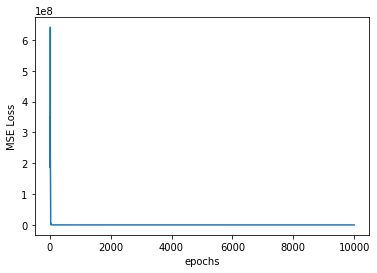

	Hessian at (1, 1, 1)
	 tensor([[1.4925e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 5.0378e-02, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 5.1392e+07]], grad_fn=<CopySlices>)
	Bootstrap attempt # 6
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 76021184.0, best loss 76021184.0
		Initiation #2
		Epoch 5000, current loss 2.63e+02, current formula \left(3.04x_1^{1.36}-9.2x_2^{0.0732}-18.2x_3^{0.0566} + 79.0\right)
		Epoch 10000, current loss 25.6, current formula \left(3.12x_1^{1.35}-9.25x_2^{0.042}-18.3x_3^{0.0244} + 45.2\right)
		Finished run #2, loss 25.642078399658203, best loss 25.642078399658203
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 76822568.0, best loss 25.642078399658203
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 156486.0625, best loss 25.642078399658203
		Initiation #5
		The model does not se

<IPython.core.display.Math object>

<IPython.core.display.Math object>

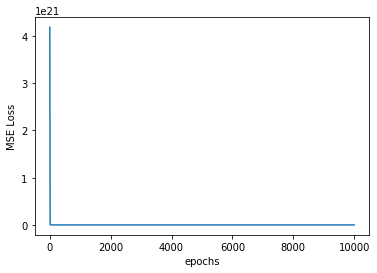

	Hessian at (1, 1, 1)
	 tensor([[1.4973, 0.0000, 0.0000],
        [0.0000, 0.3718, 0.0000],
        [0.0000, 0.0000, 0.4358]], grad_fn=<CopySlices>)
	Bootstrap attempt # 7
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 121614848.0, best loss 121614848.0
		Initiation #2
		Epoch 5000, current loss 24.4, current formula \left(3.12x_1^{1.35} + 4.23x_2^{-0.919}-0.00178x_3^{0.779} + 12.2\right)
		Epoch 10000, current loss 24.4, current formula \left(3.12x_1^{1.35} + 4.23x_2^{-0.919}-0.00178x_3^{0.779} + 12.2\right)
		Finished run #2, loss 24.44544219970703, best loss 24.44544219970703
		Initiation #3
		Epoch 5000, current loss 4.53e+02, current formula \left(3.0x_1^{1.36} + 0.0645x_2^{0.466}-56.1x_3^{0.0301} + 1.18e+02\right)
		Epoch 10000, current loss 19.2, current formula \left(3.12x_1^{1.35}-0.0216x_2^{0.458}-57.2x_3^{0.0104} + 71.7\right)
		Finished run #3, loss 19.190217971801758, best loss 19.190217971801758
		Initiation #4
		The

<IPython.core.display.Math object>

<IPython.core.display.Math object>

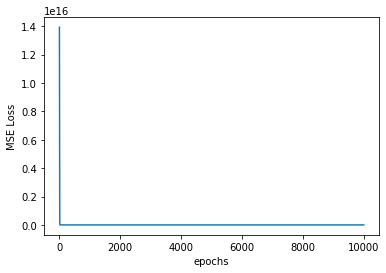

	Hessian at (1, 1, 1)
	 tensor([[1.4985, 0.0000, 0.0000],
        [0.0000, 0.0054, 0.0000],
        [0.0000, 0.0000, 0.5877]], grad_fn=<CopySlices>)
	Bootstrap attempt # 8
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 75390216.0, best loss 75390216.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 330998.59375, best loss 330998.59375
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 121570672.0, best loss 330998.59375
		Initiation #4
		Epoch 5000, current loss 1.77e+03, current formula \left(3.48x_1^{1.34}-53.8x_2^{-0.948}-1.78e+05x_3^{-9.46}-1.03e+02\right)
		Epoch 10000, current loss 56.1, current formula \left(3.21x_1^{1.35}-10.6x_2^{-0.963}-3.84e+05x_3^{-10.2}-18.1\right)
		Finished run #4, loss 56.13858413696289, best loss 56.13858413696289
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000


<IPython.core.display.Math object>

<IPython.core.display.Math object>

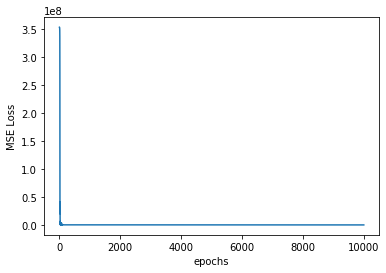

	Hessian at (1, 1, 1)
	 tensor([[ 1.5190e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -2.0040e+01,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -4.4003e+07]], grad_fn=<CopySlices>)
	Bootstrap attempt # 9
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 185649.78125, best loss 185649.78125
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 75796384.0, best loss 185649.78125
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 121564008.0, best loss 185649.78125
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 76999592.0, best loss 185649.78125
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 75785136.0, best loss 185649.78125
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

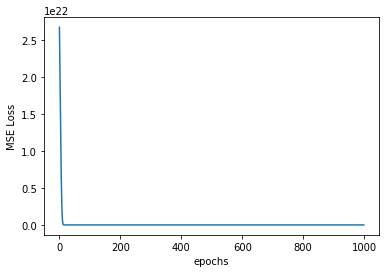

	Hessian at (1, 1, 1)
	 tensor([[ 0.8296,  0.0000,  0.0000],
        [ 0.0000, -0.0382,  0.0000],
        [ 0.0000,  0.0000, -0.2420]], grad_fn=<CopySlices>)
	Bootstrap attempt # 10
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 121566432.0, best loss 121566432.0
		Initiation #2
		Epoch 5000, current loss 4.42e+02, current formula \left(3.0x_1^{1.36} + 20.1x_2^{-0.82}-20.8x_3^{0.0491} + 78.6\right)
		Epoch 10000, current loss 18.6, current formula \left(3.12x_1^{1.35} + 2.37x_2^{-0.865}-21.0x_3^{0.0245} + 34.7\right)
		Finished run #2, loss 18.628705978393555, best loss 18.628705978393555
		Initiation #3
		Epoch 5000, current loss 6.78e+02, current formula \left(3.35x_1^{1.34}-27.2x_2^{-0.822} + 0.84x_3^{0.308}-68.5\right)
		Epoch 10000, current loss 24.5, current formula \left(3.19x_1^{1.35}-5.78x_2^{-0.867} + 0.842x_3^{0.175}-14.4\right)
		Finished run #3, loss 24.49431610107422, best loss 18.628705978393555
		Initiation #4
		Th

<IPython.core.display.Math object>

<IPython.core.display.Math object>

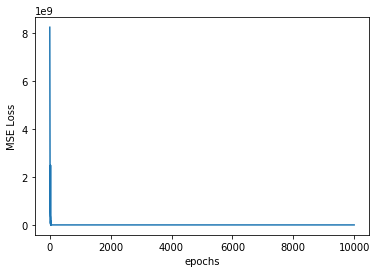

	Hessian at (1, 1, 1)
	 tensor([[1.4985, 0.0000, 0.0000],
        [0.0000, 3.8216, 0.0000],
        [0.0000, 0.0000, 0.5031]], grad_fn=<CopySlices>)
	Bootstrap attempt # 11
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 75619720.0, best loss 75619720.0
		Initiation #2
		Epoch 5000, current loss 8.78e+02, current formula \left(2.94x_1^{1.36}-1.33x_2^{0.238} + 2.13e+05x_3^{-9.77} + 77.5\right)
		Epoch 10000, current loss 24.3, current formula \left(3.12x_1^{1.35}-1.34x_2^{0.131} + 3.93e+05x_3^{-10.1} + 14.9\right)
		Finished run #2, loss 24.27585792541504, best loss 24.27585792541504
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 121562064.0, best loss 24.27585792541504
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 75970832.0, best loss 24.27585792541504
		Initiation #5
		The model does not seem to converge, finishing at 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

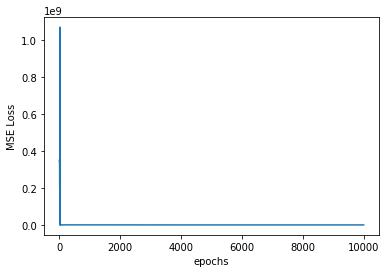

	Hessian at (1, 1, 1)
	 tensor([[1.4974e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.5227e-01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 4.3625e+07]], grad_fn=<CopySlices>)
	Bootstrap attempt # 12
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 1261432.875, best loss 1261432.875
		Initiation #2
		Epoch 5000, current loss 1.37e+02, current formula \left(3.24x_1^{1.35}-14.9x_2^{-0.872} + 0.000302x_3^{1.09}-28.7\right)
		Epoch 10000, current loss 25.4, current formula \left(3.19x_1^{1.35}-6.95x_2^{-0.896} + 0.000104x_3^{1.08}-12.3\right)
		Finished run #2, loss 25.3752498626709, best loss 25.3752498626709
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 77016648.0, best loss 25.3752498626709
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 401701.6875, best loss 25.3752498626709
		Initiation #5
		Epoch 5000, current 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

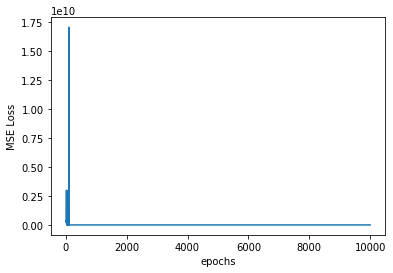

	Hessian at (1, 1, 1)
	 tensor([[ 1.5117e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  4.2109e+03,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -7.8818e-01]], grad_fn=<CopySlices>)
	Bootstrap attempt # 13
		Initiation #1
		Epoch 5000, current loss 18.7, current formula \left(3.12x_1^{1.35} + 2.77x_2^{-0.929}-16.5x_3^{-1.79} + 10.5\right)
		Epoch 10000, current loss 18.7, current formula \left(3.12x_1^{1.35} + 2.77x_2^{-0.929}-16.5x_3^{-1.79} + 10.5\right)
		Finished run #1, loss 18.69500160217285, best loss 18.69500160217285
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 75389240.0, best loss 18.69500160217285
		Initiation #3
		Epoch 5000, current loss 2.47e+02, current formula \left(3.27x_1^{1.35}-0.0367x_2^{0.485} + 2.46e+02x_3^{-2.6}-37.8\right)
		Epoch 10000, current loss 23.3, current formula \left(3.19x_1^{1.35} + 0.0068x_2^{0.475} + 77.9x_3^{-2.61}-11.9\right)
		Finished run #3, loss 23.32880401611328, best los

<IPython.core.display.Math object>

<IPython.core.display.Math object>

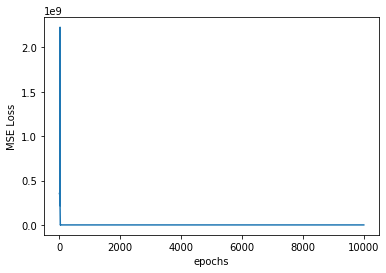

	Hessian at (1, 1, 1)
	 tensor([[  1.4985,   0.0000,   0.0000],
        [  0.0000,   4.9657,   0.0000],
        [  0.0000,   0.0000, -82.4961]], grad_fn=<CopySlices>)
	Bootstrap attempt # 14
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 121560512.0, best loss 121560512.0
		Initiation #2
		Epoch 5000, current loss 2.06e+02, current formula \left(3.05x_1^{1.36} + 0.0262x_2^{0.572}-0.0132x_3^{0.293} + 34.5\right)
		Epoch 10000, current loss 18.8, current formula \left(3.12x_1^{1.35}-0.00322x_2^{0.572}-0.0824x_3^{0.324} + 11.2\right)
		Finished run #2, loss 18.760208129882812, best loss 18.760208129882812
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 76415424.0, best loss 18.760208129882812
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 121563536.0, best loss 18.760208129882812
		Initiation #5
		Epoch 5000, current loss 2.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

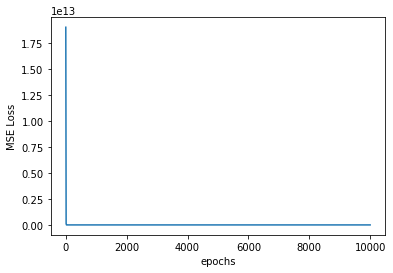

	Hessian at (1, 1, 1)
	 tensor([[1.4985e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 7.8779e-04, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.8049e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 15
		Initiation #1
		Epoch 5000, current loss 34.5, current formula \left(3.11x_1^{1.35} + 5.56x_2^{-0.919}-96.5x_3^{-2.65} + 14.4\right)
		Epoch 10000, current loss 20.8, current formula \left(3.12x_1^{1.35} + 4.07x_2^{-0.89}-82.0x_3^{-2.72} + 11.1\right)
		Finished run #1, loss 20.789243698120117, best loss 20.789243698120117
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 75608160.0, best loss 20.789243698120117
		Initiation #3
		Epoch 5000, current loss 2.89e+02, current formula \left(3.28x_1^{1.35}-20.8x_2^{-0.882}-1.7e+05x_3^{-9.66}-41.3\right)
		Epoch 10000, current loss 23.9, current formula \left(3.19x_1^{1.35}-7.6x_2^{-0.942}-3.42e+05x_3^{-10.3}-11.9\right)
		Finished run #3, loss 23.930206298828125, best loss 20.789243

<IPython.core.display.Math object>

<IPython.core.display.Math object>

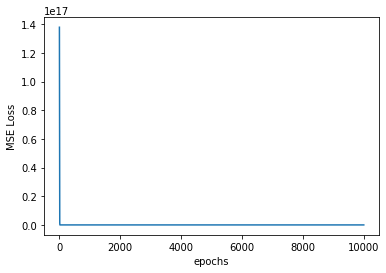

	Hessian at (1, 1, 1)
	 tensor([[   1.4981,    0.0000,    0.0000],
        [   0.0000,    6.8478,    0.0000],
        [   0.0000,    0.0000, -831.7843]], grad_fn=<CopySlices>)
	Bootstrap attempt # 16
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 75591888.0, best loss 75591888.0
		Initiation #2
		Epoch 5000, current loss 1.78e+02, current formula \left(3.26x_1^{1.35}-16.1x_2^{-0.875} + 94.3x_3^{-2.12}-32.3\right)
		Epoch 10000, current loss 22.6, current formula \left(3.19x_1^{1.35}-7.38x_2^{-0.96} + 78.6x_3^{-2.69}-11.5\right)
		Finished run #2, loss 22.581344604492188, best loss 22.581344604492188
		Initiation #3
		Epoch 5000, current loss 1.25e+02, current formula \left(3.07x_1^{1.36} + 10.8x_2^{-0.843}-31.1x_3^{0.0184} + 61.9\right)
		Epoch 10000, current loss 24.2, current formula \left(3.12x_1^{1.35} + 4.05x_2^{-0.912}-31.8x_3^{0.0173} + 47.1\right)
		Finished run #3, loss 24.16304588317871, best loss 22.581344604492188
		In

<IPython.core.display.Math object>

<IPython.core.display.Math object>

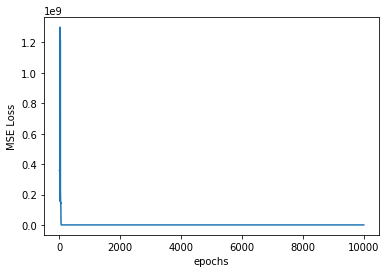

	Hessian at (1, 1, 1)
	 tensor([[  1.5143,   0.0000,   0.0000],
        [  0.0000, -13.8985,   0.0000],
        [  0.0000,   0.0000, 780.7230]], grad_fn=<CopySlices>)
	Bootstrap attempt # 17
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 75596456.0, best loss 75596456.0
		Initiation #2
		Epoch 5000, current loss 1.27e+02, current formula \left(3.07x_1^{1.36}-4.3e+04x_2^{-8.19}-14.8x_3^{0.0516} + 47.5\right)
		Epoch 10000, current loss 23.3, current formula \left(3.12x_1^{1.35}-4.3e+04x_2^{-8.72}-14.8x_3^{0.0324} + 29.6\right)
		Finished run #2, loss 23.30872344970703, best loss 23.30872344970703
		Initiation #3
		Epoch 5000, current loss 56.2, current formula \left(3.21x_1^{1.35}-9.88x_2^{-0.887} + 1.11e+02x_3^{-2.57}-18.3\right)
		Epoch 10000, current loss 23.5, current formula \left(3.19x_1^{1.35}-6.93x_2^{-0.961} + 71.0x_3^{-2.56}-11.8\right)
		Finished run #3, loss 23.5028133392334, best loss 23.30872344970703
		Initiation #4


<IPython.core.display.Math object>

<IPython.core.display.Math object>

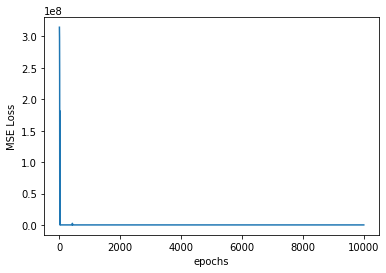

	Hessian at (1, 1, 1)
	 tensor([[ 1.4976e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -3.6487e+06,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  4.6460e-01]], grad_fn=<CopySlices>)
	Bootstrap attempt # 18
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 176094.078125, best loss 176094.078125
		Initiation #2
		Epoch 5000, current loss 8.3e+02, current formula \left(2.95x_1^{1.36} + 0.11x_2^{0.362}-17.0x_3^{0.0894} + 97.5\right)
		Epoch 10000, current loss 19.1, current formula \left(3.12x_1^{1.35}-0.0335x_2^{0.342}-17.2x_3^{0.0282} + 31.1\right)
		Finished run #2, loss 19.077844619750977, best loss 19.077844619750977
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 602909.5, best loss 19.077844619750977
		Initiation #4
		Epoch 5000, current loss 25.3, current formula \left(3.19x_1^{1.35}-6.59x_2^{-0.904} + 81.4x_3^{-2.63}-12.2\right)
		Epoch 10000, current loss 25.3, 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

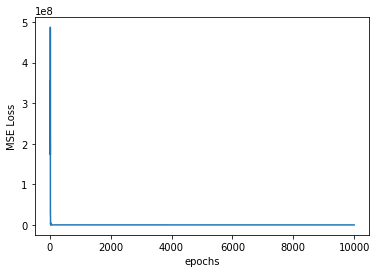

	Hessian at (1, 1, 1)
	 tensor([[1.4985, 0.0000, 0.0000],
        [0.0000, 0.0075, 0.0000],
        [0.0000, 0.0000, 0.4708]], grad_fn=<CopySlices>)
	Bootstrap attempt # 19
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 121568944.0, best loss 121568944.0
		Initiation #2
		Epoch 5000, current loss 74.9, current formula \left(3.09x_1^{1.36} + 0.00209x_2^{0.85}-3.27x_3^{0.119} + 27.8\right)
		Epoch 10000, current loss 23.8, current formula \left(3.12x_1^{1.35}-0.000278x_2^{0.735}-3.3x_3^{0.0884} + 17.4\right)
		Finished run #2, loss 23.75530433654785, best loss 23.75530433654785
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 121570736.0, best loss 23.75530433654785
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 121574232.0, best loss 23.75530433654785
		Initiation #5
		Epoch 5000, current loss 2.61e+02, current formula \lef

<IPython.core.display.Math object>

<IPython.core.display.Math object>

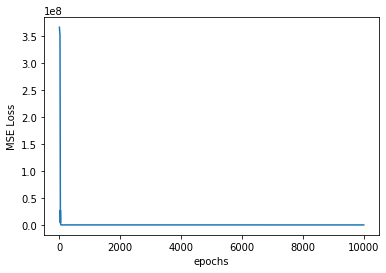

	Hessian at (1, 1, 1)
	 tensor([[  1.5143,   0.0000,   0.0000],
        [  0.0000, -13.2872,   0.0000],
        [  0.0000,   0.0000, 848.3141]], grad_fn=<CopySlices>)
plotting diagrams for coefficients
	plotting lambda_0


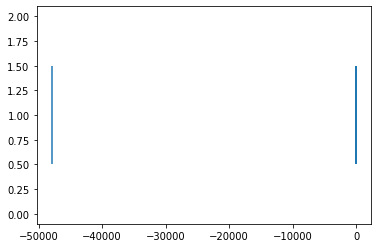

	plotting power_0


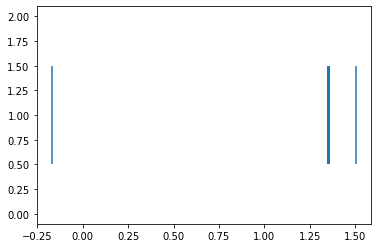

	plotting lambda_1


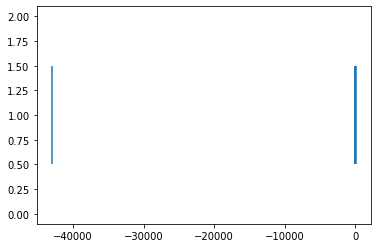

	plotting power_1


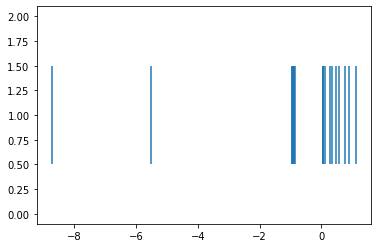

	plotting lambda_2


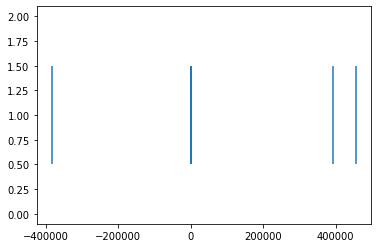

	plotting power_2


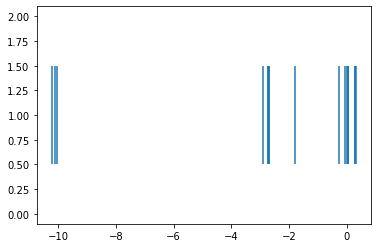

	plotting last_subformula.lambda_0


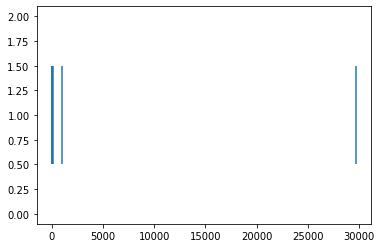


---------------------------------------------------------------------------------------------

Example 2
[-27.0, -26.0, 3.0] [47, 38, 48] [-0.5744680762290955, -0.6842105388641357, 0.0625]
[-2.0, 14.0, -22.0] [14, 43, 7] [-0.1428571492433548, 0.3255814015865326, -3.142857074737549]

	Bootstrap attempt # 0
		Initiation #1
		Finished run #1, loss 0.005555922165513039, best loss 0.005555922165513039
		Initiation #2
		Finished run #2, loss 0.006489224266260862, best loss 0.005555922165513039
		Initiation #3
		Finished run #3, loss 0.003337159054353833, best loss 0.003337159054353833
		Initiation #4
		Finished run #4, loss 0.1160949245095253, best loss 0.003337159054353833
		Initiation #5
		Finished run #5, loss 0.00615924596786499, best loss 0.003337159054353833
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

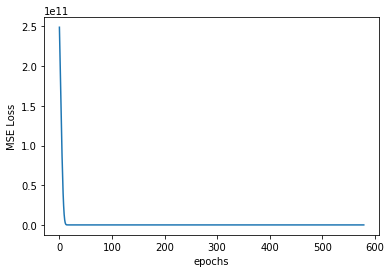

	Hessian at (1, 1, 1)
	 tensor([[-0.0736,  0.0000,  0.0000],
        [ 0.0000,  0.2565,  0.0000],
        [ 0.0000,  0.0000,  1.2036]], grad_fn=<CopySlices>)
	Bootstrap attempt # 1
		Initiation #1
		Finished run #1, loss 0.12182013690471649, best loss 0.12182013690471649
		Initiation #2
		Finished run #2, loss 0.0018170842668041587, best loss 0.0018170842668041587
		Initiation #3
		Finished run #3, loss 0.0052437069825828075, best loss 0.0018170842668041587
		Initiation #4
		Epoch 5000, current loss 0.00655, current formula \left(-0.509x_1^{-0.315}-0.258x_2^{0.443} + 0.0334x_3^{0.0881}-1.31\right)
		Finished run #4, loss 0.004982310812920332, best loss 0.0018170842668041587
		Initiation #5
		Finished run #5, loss 0.0030456222593784332, best loss 0.0018170842668041587
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

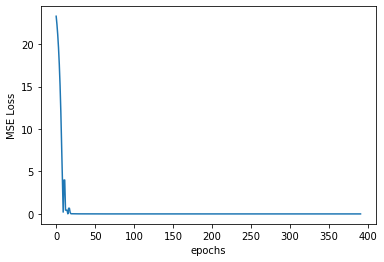

	Hessian at (1, 1, 1)
	 tensor([[-0.1394,  0.0000,  0.0000],
        [ 0.0000,  0.2242,  0.0000],
        [ 0.0000,  0.0000,  1.4502]], grad_fn=<CopySlices>)
	Bootstrap attempt # 2
		Initiation #1
		Finished run #1, loss 0.1182279884815216, best loss 0.1182279884815216
		Initiation #2
		Finished run #2, loss 0.11795800924301147, best loss 0.11795800924301147
		Initiation #3
		Finished run #3, loss 0.001957222353667021, best loss 0.001957222353667021
		Initiation #4
		Finished run #4, loss 0.12048057466745377, best loss 0.001957222353667021
		Initiation #5
		Finished run #5, loss 0.12128946930170059, best loss 0.001957222353667021
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

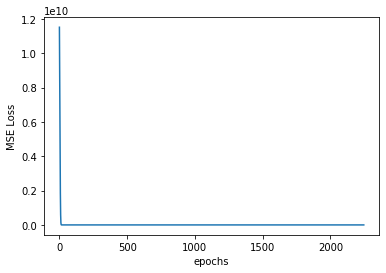

	Hessian at (1, 1, 1)
	 tensor([[-1.0073e-01,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  9.5310e-02,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  9.3545e+06]], grad_fn=<CopySlices>)
	Bootstrap attempt # 3
		Initiation #1
		Finished run #1, loss 0.005409806501120329, best loss 0.005409806501120329
		Initiation #2
		Finished run #2, loss 0.12367907911539078, best loss 0.005409806501120329
		Initiation #3
		Finished run #3, loss 0.007323387544602156, best loss 0.005409806501120329
		Initiation #4
		Epoch 5000, current loss 0.113, current formula \left(-8.35x_1^{-0.00293} + 25.5x_2^{-0.0651}-1.83e+05x_3^{-10.8}-14.3\right)
		Epoch 10000, current loss 0.101, current formula \left(-15.8x_1^{-0.00174} + 32.7x_2^{-0.0466}-4.08e+05x_3^{-11.4}-14.3\right)
		Finished run #4, loss 0.10073097795248032, best loss 0.005409806501120329
		Initiation #5
		Finished run #5, loss 0.0012050492223352194, best loss 0.0012050492223352194
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

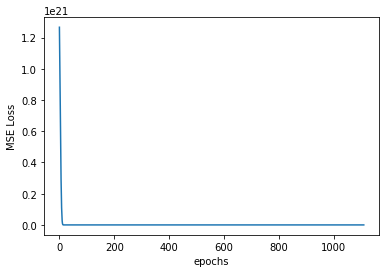

	Hessian at (1, 1, 1)
	 tensor([[-0.1029,  0.0000,  0.0000],
        [ 0.0000,  0.2088,  0.0000],
        [ 0.0000,  0.0000, -0.0005]], grad_fn=<CopySlices>)
	Bootstrap attempt # 4
		Initiation #1
		Finished run #1, loss 0.11688709259033203, best loss 0.11688709259033203
		Initiation #2
		Epoch 5000, current loss 0.251, current formula \left(-0.293x_1^{-1.14}-3.49x_2^{0.123} + 1.23e-08x_3^{1.92} + 1.92\right)
		Epoch 10000, current loss 0.251, current formula \left(-0.293x_1^{-1.14}-3.49x_2^{0.123} + 1.23e-08x_3^{1.92} + 1.92\right)
		Finished run #2, loss 0.250777930021286, best loss 0.11688709259033203
		Initiation #3
		Finished run #3, loss 0.11951752007007599, best loss 0.11688709259033203
		Initiation #4
		Finished run #4, loss 0.12015879899263382, best loss 0.11688709259033203
		Initiation #5
		Finished run #5, loss 0.0047568972222507, best loss 0.0047568972222507
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

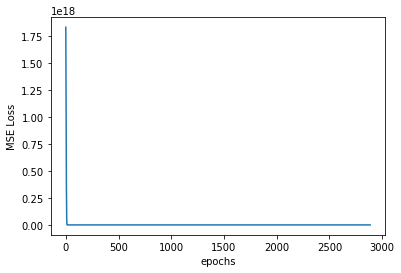

	Hessian at (1, 1, 1)
	 tensor([[-0.1833,  0.0000,  0.0000],
        [ 0.0000,  0.0728,  0.0000],
        [ 0.0000,  0.0000, -1.2441]], grad_fn=<CopySlices>)
	Bootstrap attempt # 5
		Initiation #1
		Finished run #1, loss 0.12019818276166916, best loss 0.12019818276166916
		Initiation #2
		Finished run #2, loss 0.004056508187204599, best loss 0.004056508187204599
		Initiation #3
		Finished run #3, loss 0.12189652025699615, best loss 0.004056508187204599
		Initiation #4
		Finished run #4, loss 0.12086101621389389, best loss 0.004056508187204599
		Initiation #5
		Finished run #5, loss 0.002800164744257927, best loss 0.002800164744257927
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

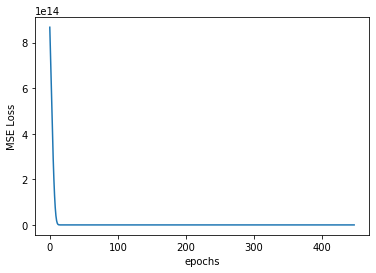

	Hessian at (1, 1, 1)
	 tensor([[-0.1356,  0.0000,  0.0000],
        [ 0.0000,  0.2459,  0.0000],
        [ 0.0000,  0.0000,  0.4378]], grad_fn=<CopySlices>)
	Bootstrap attempt # 6
		Initiation #1
		Finished run #1, loss 0.020595623180270195, best loss 0.020595623180270195
		Initiation #2
		Finished run #2, loss 0.11921801418066025, best loss 0.020595623180270195
		Initiation #3
		Epoch 5000, current loss 0.113, current formula \left(-6.78x_1^{-0.00373} + 25.1x_2^{-0.0666} + 0.000193x_3^{0.807}-15.5\right)
		Finished run #3, loss 0.11326882243156433, best loss 0.020595623180270195
		Initiation #4
		Finished run #4, loss 0.014640331268310547, best loss 0.014640331268310547
		Initiation #5
		Epoch 5000, current loss 0.11, current formula \left(0.000238x_1^{0.836} + 26.6x_2^{-0.0612}-6.03x_3^{-0.00187}-17.8\right)
		Finished run #5, loss 0.10857905447483063, best loss 0.014640331268310547
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

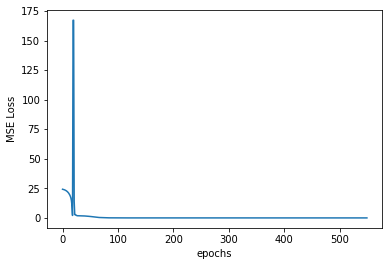

	Hessian at (1, 1, 1)
	 tensor([[-0.1173,  0.0000,  0.0000],
        [ 0.0000,  0.4337,  0.0000],
        [ 0.0000,  0.0000,  2.3763]], grad_fn=<CopySlices>)
	Bootstrap attempt # 7
		Initiation #1
		Epoch 5000, current loss 0.11, current formula \left(-0.521x_1^{-0.0787} + 26.4x_2^{-0.062}-4.21x_3^{-0.0031}-19.0\right)
		Finished run #1, loss 0.10879972577095032, best loss 0.10879972577095032
		Initiation #2
		Epoch 5000, current loss 0.106, current formula \left(-11.5x_1^{-0.00231} + 28.9x_2^{-0.0548}-5.12x_3^{-0.00242}-9.68\right)
		Finished run #2, loss 0.09757443517446518, best loss 0.09757443517446518
		Initiation #3
		Finished run #3, loss 0.12397574633359909, best loss 0.09757443517446518
		Initiation #4
		Epoch 5000, current loss 0.111, current formula \left(-4.48x_1^{-0.00584} + 25.9x_2^{-0.0638}-4.3x_3^{-0.0027}-14.4\right)
		Finished run #4, loss 0.11143731325864792, best loss 0.09757443517446518
		Initiation #5
		Finished run #5, loss 0.003498945850878954, best loss 0.00349

<IPython.core.display.Math object>

<IPython.core.display.Math object>

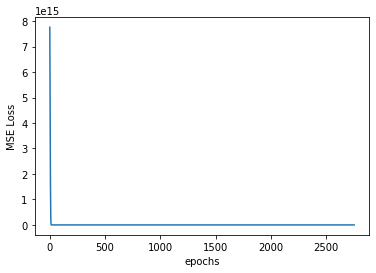

	Hessian at (1, 1, 1)
	 tensor([[-0.1254,  0.0000,  0.0000],
        [ 0.0000,  0.0810,  0.0000],
        [ 0.0000,  0.0000, -1.3681]], grad_fn=<CopySlices>)
	Bootstrap attempt # 8
		Initiation #1
		Epoch 5000, current loss 0.108, current formula \left(-9.89x_1^{-0.00263} + 27.8x_2^{-0.0578}-3.65x_3^{-0.00331}-11.6\right)
		Finished run #1, loss 0.10026296973228455, best loss 0.10026296973228455
		Initiation #2
		Finished run #2, loss 0.12136439979076385, best loss 0.10026296973228455
		Initiation #3
		Finished run #3, loss 0.11754731088876724, best loss 0.10026296973228455
		Initiation #4
		Finished run #4, loss 0.11395625025033951, best loss 0.10026296973228455
		Initiation #5
		Finished run #5, loss 0.11937440186738968, best loss 0.10026296973228455
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

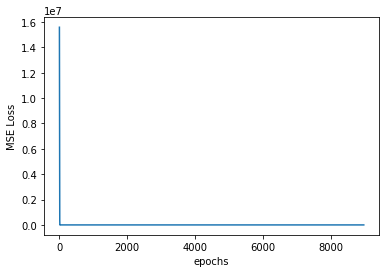

	Hessian at (1, 1, 1)
	 tensor([[-0.0268,  0.0000,  0.0000],
        [ 0.0000,  1.5932,  0.0000],
        [ 0.0000,  0.0000, -0.0116]], grad_fn=<CopySlices>)
	Bootstrap attempt # 9
		Initiation #1
		Finished run #1, loss 0.11382956057786942, best loss 0.11382956057786942
		Initiation #2
		Epoch 5000, current loss 0.112, current formula \left(-5.92x_1^{-0.00459} + 25.6x_2^{-0.0653}-3.07x_3^{-0.00423}-13.8\right)
		Finished run #2, loss 0.10859367251396179, best loss 0.10859367251396179
		Initiation #3
		Finished run #3, loss 0.0013922401703894138, best loss 0.0013922401703894138
		Initiation #4
		Epoch 5000, current loss 0.11, current formula \left(-7.4x_1^{-0.00343} + 26.6x_2^{-0.0611}-4.03x_3^{-0.00276}-12.5\right)
		Finished run #4, loss 0.10862300544977188, best loss 0.0013922401703894138
		Initiation #5
		Finished run #5, loss 0.1155225858092308, best loss 0.0013922401703894138
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

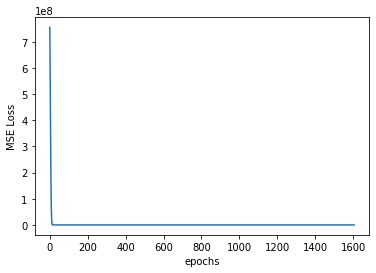

	Hessian at (1, 1, 1)
	 tensor([[-0.1701,  0.0000,  0.0000],
        [ 0.0000,  0.1033,  0.0000],
        [ 0.0000,  0.0000, -0.6093]], grad_fn=<CopySlices>)
	Bootstrap attempt # 10
		Initiation #1
		Finished run #1, loss 0.008783558383584023, best loss 0.008783558383584023
		Initiation #2
		Finished run #2, loss 0.006810068152844906, best loss 0.006810068152844906
		Initiation #3
		Finished run #3, loss 0.005854479968547821, best loss 0.005854479968547821
		Initiation #4
		Epoch 5000, current loss 0.112, current formula \left(-8.78x_1^{-0.00286} + 25.6x_2^{-0.0645}-3.24x_3^{-0.0036}-10.9\right)
		Epoch 10000, current loss 0.101, current formula \left(-13.2x_1^{-0.00201} + 32.3x_2^{-0.0474}-5.65x_3^{-0.00199}-10.9\right)
		Finished run #4, loss 0.10106045752763748, best loss 0.005854479968547821
		Initiation #5
		Finished run #5, loss 0.009180722758173943, best loss 0.005854479968547821
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

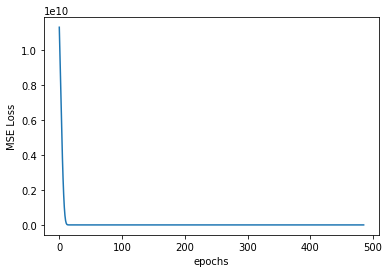

	Hessian at (1, 1, 1)
	 tensor([[-0.0252,  0.0000,  0.0000],
        [ 0.0000,  0.3001,  0.0000],
        [ 0.0000,  0.0000,  1.3858]], grad_fn=<CopySlices>)
	Bootstrap attempt # 11
		Initiation #1
		Finished run #1, loss 0.1187908872961998, best loss 0.1187908872961998
		Initiation #2
		Finished run #2, loss 0.010727249085903168, best loss 0.010727249085903168
		Initiation #3
		Finished run #3, loss 0.1155799925327301, best loss 0.010727249085903168
		Initiation #4
		Finished run #4, loss 0.005696356296539307, best loss 0.005696356296539307
		Initiation #5
		Finished run #5, loss 0.11686684191226959, best loss 0.005696356296539307
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

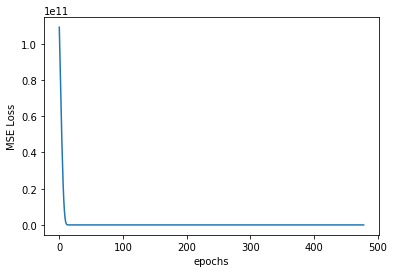

	Hessian at (1, 1, 1)
	 tensor([[5.3561e-06, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.8846e-01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 2.0147e+00]], grad_fn=<CopySlices>)
	Bootstrap attempt # 12
		Initiation #1
		Epoch 5000, current loss 0.116, current formula \left(-6.68x_1^{-0.00348} + 24.0x_2^{-0.0708}-2.29x_3^{-0.00453}-12.2\right)
		Finished run #1, loss 0.11577989906072617, best loss 0.11577989906072617
		Initiation #2
		Finished run #2, loss 0.0030613986309617758, best loss 0.0030613986309617758
		Initiation #3
		Epoch 5000, current loss 0.116, current formula \left(6.85e-05x_1^{1.01} + 24.4x_2^{-0.0693}-4.85x_3^{-0.00215}-16.6\right)
		Finished run #3, loss 0.11293086409568787, best loss 0.0030613986309617758
		Initiation #4
		Finished run #4, loss 0.1159244179725647, best loss 0.0030613986309617758
		Initiation #5
		Epoch 5000, current loss 0.348, current formula \left(-0.102x_1^{-0.332}-1.42e-05x_2^{1.81}-0.00634x_3^{0.441}-3.69\right)
		Epoch 10000, current los

<IPython.core.display.Math object>

<IPython.core.display.Math object>

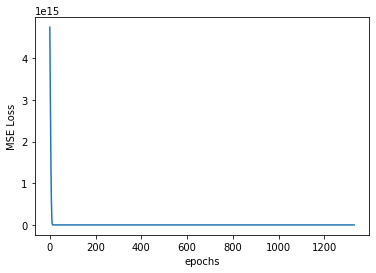

	Hessian at (1, 1, 1)
	 tensor([[-0.1013,  0.0000,  0.0000],
        [ 0.0000,  0.2513,  0.0000],
        [ 0.0000,  0.0000, -0.0008]], grad_fn=<CopySlices>)
	Bootstrap attempt # 13
		Initiation #1
		Finished run #1, loss 0.007946603931486607, best loss 0.007946603931486607
		Initiation #2
		Finished run #2, loss 0.0036212217528373003, best loss 0.0036212217528373003
		Initiation #3
		Finished run #3, loss 0.0008684087661094964, best loss 0.0008684087661094964
		Initiation #4
		Finished run #4, loss 0.12210309505462646, best loss 0.0008684087661094964
		Initiation #5
		Finished run #5, loss 0.006521452683955431, best loss 0.0008684087661094964
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

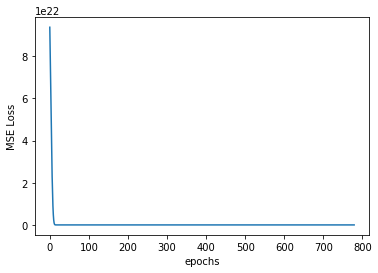

	Hessian at (1, 1, 1)
	 tensor([[-0.0343,  0.0000,  0.0000],
        [ 0.0000,  0.1125,  0.0000],
        [ 0.0000,  0.0000, -0.0004]], grad_fn=<CopySlices>)
	Bootstrap attempt # 14
		Initiation #1
		Finished run #1, loss 0.12108280509710312, best loss 0.12108280509710312
		Initiation #2
		Finished run #2, loss 0.11363846808671951, best loss 0.11363846808671951
		Initiation #3
		Epoch 5000, current loss 0.108, current formula \left(-5.89x_1^{-0.0045} + 27.6x_2^{-0.0582}-5.21x_3^{-0.00227}-13.8\right)
		Finished run #3, loss 0.1016220897436142, best loss 0.1016220897436142
		Initiation #4
		Finished run #4, loss 0.11857463419437408, best loss 0.1016220897436142
		Initiation #5
		Finished run #5, loss 0.1178475022315979, best loss 0.1016220897436142
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

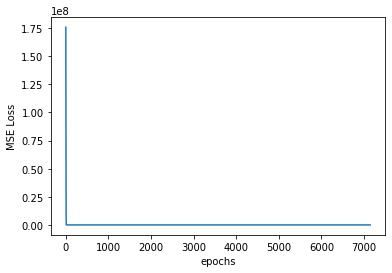

	Hessian at (1, 1, 1)
	 tensor([[-0.0263,  0.0000,  0.0000],
        [ 0.0000,  1.6120,  0.0000],
        [ 0.0000,  0.0000, -0.0109]], grad_fn=<CopySlices>)
	Bootstrap attempt # 15
		Initiation #1
		Finished run #1, loss 0.11727677285671234, best loss 0.11727677285671234
		Initiation #2
		Epoch 5000, current loss 0.212, current formula \left(-0.703x_1^{-0.965} + 14.7x_2^{-0.188} + 2.16e-06x_3^{1.52}-10.1\right)
		Epoch 10000, current loss 0.212, current formula \left(-0.703x_1^{-0.965} + 14.7x_2^{-0.188} + 2.16e-06x_3^{1.52}-10.1\right)
		Finished run #2, loss 0.21214070916175842, best loss 0.11727677285671234
		Initiation #3
		Finished run #3, loss 0.11427585035562515, best loss 0.11427585035562515
		Initiation #4
		Finished run #4, loss 0.12036813050508499, best loss 0.11427585035562515
		Initiation #5
		Finished run #5, loss 0.11984359472990036, best loss 0.11427585035562515
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

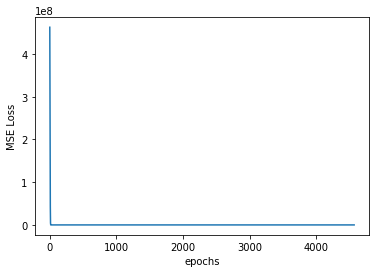

	Hessian at (1, 1, 1)
	 tensor([[-0.5965,  0.0000,  0.0000],
        [ 0.0000,  1.7904,  0.0000],
        [ 0.0000,  0.0000, -0.0151]], grad_fn=<CopySlices>)
	Bootstrap attempt # 16
		Initiation #1
		Finished run #1, loss 0.12154147773981094, best loss 0.12154147773981094
		Initiation #2
		Finished run #2, loss 0.006476165261119604, best loss 0.006476165261119604
		Initiation #3
		Finished run #3, loss 0.005073025356978178, best loss 0.005073025356978178
		Initiation #4
		Finished run #4, loss 0.00663946196436882, best loss 0.005073025356978178
		Initiation #5
		Finished run #5, loss 0.004527153912931681, best loss 0.004527153912931681
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

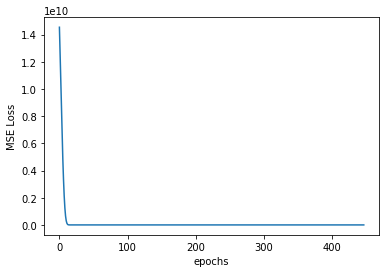

	Hessian at (1, 1, 1)
	 tensor([[-0.1826,  0.0000,  0.0000],
        [ 0.0000,  0.0743,  0.0000],
        [ 0.0000,  0.0000, -1.4800]], grad_fn=<CopySlices>)
	Bootstrap attempt # 17
		Initiation #1
		Finished run #1, loss 6.496316200355068e-05, best loss 6.496316200355068e-05
		Initiation #2
		Finished run #2, loss 0.017533425241708755, best loss 6.496316200355068e-05
		Initiation #3
		Finished run #3, loss 0.01650381274521351, best loss 6.496316200355068e-05
		Initiation #4
		Epoch 5000, current loss 0.113, current formula \left(-4.9x_1^{-0.00494} + 25.1x_2^{-0.0663}-4.18x_3^{-0.0025}-13.3\right)
		Finished run #4, loss 0.10855961591005325, best loss 6.496316200355068e-05
		Initiation #5
		Epoch 5000, current loss 0.107, current formula \left(-9.11x_1^{-0.00268} + 28.0x_2^{-0.0571}-6.02x_3^{-0.00172}-10.2\right)
		Finished run #5, loss 0.10439980030059814, best loss 6.496316200355068e-05
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

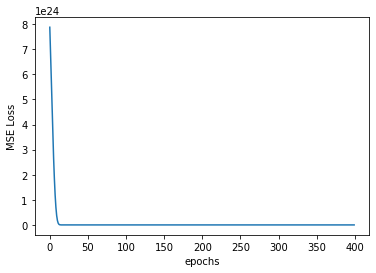

	Hessian at (1, 1, 1)
	 tensor([[-0.1213,  0.0000,  0.0000],
        [ 0.0000,  0.1396,  0.0000],
        [ 0.0000,  0.0000, -0.0003]], grad_fn=<CopySlices>)
	Bootstrap attempt # 18
		Initiation #1
		Finished run #1, loss 0.004710345063358545, best loss 0.004710345063358545
		Initiation #2
		Finished run #2, loss 0.11780478805303574, best loss 0.004710345063358545
		Initiation #3
		Finished run #3, loss 0.01575165055692196, best loss 0.004710345063358545
		Initiation #4
		Epoch 5000, current loss 0.113, current formula \left(-5.95x_1^{-0.00417} + 25.2x_2^{-0.0661}-3.12x_3^{-0.004}-13.4\right)
		Finished run #4, loss 0.11214357614517212, best loss 0.004710345063358545
		Initiation #5
		Finished run #5, loss 0.00882025808095932, best loss 0.004710345063358545
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

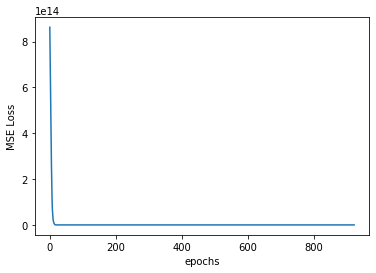

	Hessian at (1, 1, 1)
	 tensor([[-0.0783,  0.0000,  0.0000],
        [ 0.0000,  0.0726,  0.0000],
        [ 0.0000,  0.0000, -0.0001]], grad_fn=<CopySlices>)
	Bootstrap attempt # 19
		Initiation #1
		Epoch 5000, current loss 0.113, current formula \left(-0.567x_1^{-0.633} + 25.2x_2^{-0.0658}-5.23x_3^{-0.00277}-17.1\right)
		Finished run #1, loss 0.11219197511672974, best loss 0.11219197511672974
		Initiation #2
		Finished run #2, loss 0.11834047734737396, best loss 0.11219197511672974
		Initiation #3
		Epoch 5000, current loss 0.113, current formula \left(-6.71x_1^{-0.00361} + 25.3x_2^{-0.0656}-3.85x_3^{-0.00323}-12.0\right)
		Finished run #3, loss 0.11082302033901215, best loss 0.11082302033901215
		Initiation #4
		Finished run #4, loss 0.0065734717063605785, best loss 0.0065734717063605785
		Initiation #5
		Finished run #5, loss 0.11637052893638611, best loss 0.0065734717063605785
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

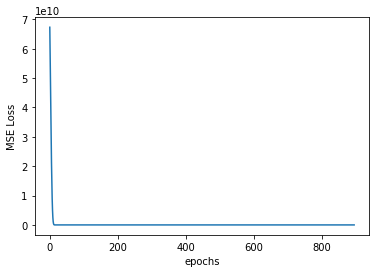

	Hessian at (1, 1, 1)
	 tensor([[-0.2099,  0.0000,  0.0000],
        [ 0.0000,  0.0634,  0.0000],
        [ 0.0000,  0.0000, -1.8070]], grad_fn=<CopySlices>)
plotting diagrams for coefficients
	plotting lambda_0


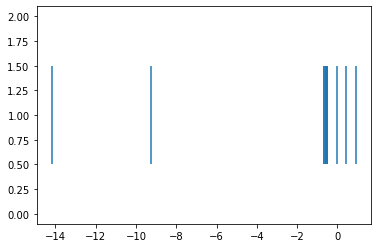

	plotting power_0


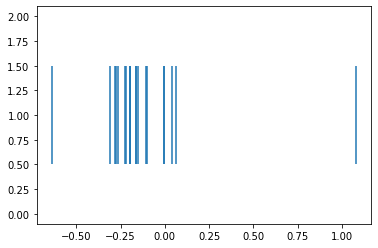

	plotting lambda_1


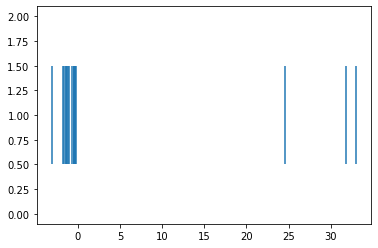

	plotting power_1


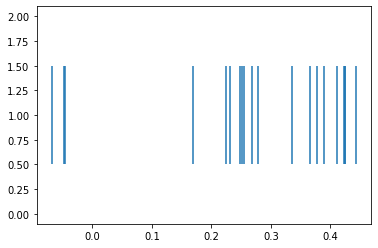

	plotting lambda_2


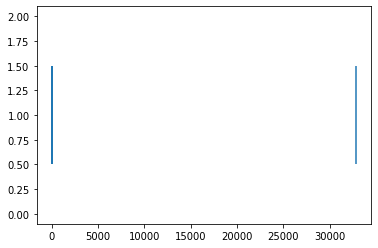

	plotting power_2


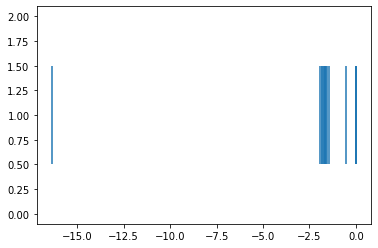

	plotting last_subformula.lambda_0


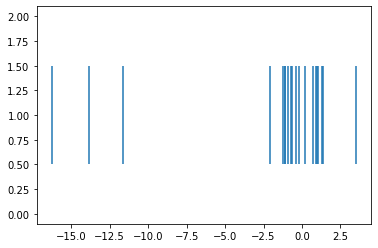


---------------------------------------------------------------------------------------------

Example 3
[-17.0, 49.0, 32.0] [48, 1, 27] [-0.3541666567325592, 49.0, 1.185185194015503]
[23.0, 46.0, -32.0] [15, 10, 1] [1.5333333015441895, 4.599999904632568, -32.0]

	Bootstrap attempt # 0
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 4.359269626959902e+26, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 1.041847202178616e+26, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 1.2066913655049807e+26, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 4.9023251704202446e+26, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 8.014614522381596e+29, best loss 1e+20


<IPython.core.display.Math object>

<IPython.core.display.Math object>

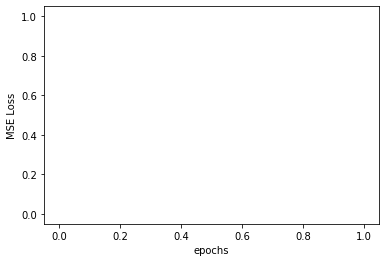

	Hessian at (1, 1, 1)
	 tensor([[-65.9615,   0.0000,   0.0000],
        [  0.0000, -15.1246,   0.0000],
        [  0.0000,   0.0000,   0.2643]], grad_fn=<CopySlices>)
	Bootstrap attempt # 1
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 6.337522811126691e+26, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 2.32168617982884e+26, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 4.4887583916597133e+26, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 4.685948920719328e+26, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 7.986755582447214e+29, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

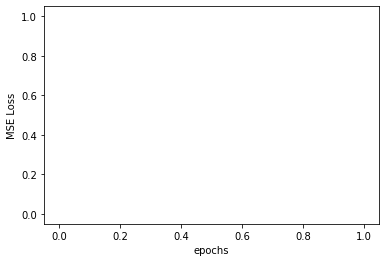

	Hessian at (1, 1, 1)
	 tensor([[-19.4692,   0.0000,   0.0000],
        [  0.0000,   3.5046,   0.0000],
        [  0.0000,   0.0000,  -0.1036]], grad_fn=<CopySlices>)
	Bootstrap attempt # 2
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 3.879135189665219e+26, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 1.3721821794448494e+26, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 7.999972919548788e+29, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 3.3649229752385286e+26, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 5.303701602827106e+26, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

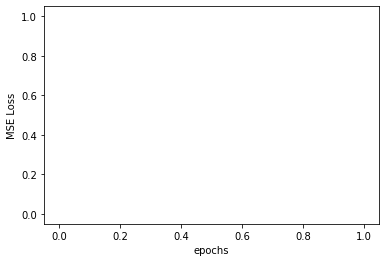

	Hessian at (1, 1, 1)
	 tensor([[-7.9234,  0.0000,  0.0000],
        [ 0.0000,  0.0884,  0.0000],
        [ 0.0000,  0.0000,  4.6851]], grad_fn=<CopySlices>)
	Bootstrap attempt # 3
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 4.5213464097403286e+26, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 4.460890526452679e+26, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 6.423756727985265e+25, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 1.5494126857806675e+26, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 1.2466207265583306e+26, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

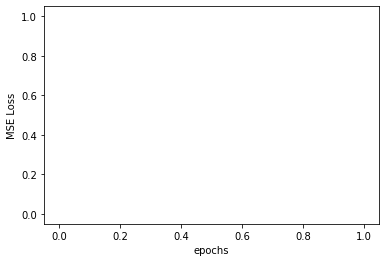

	Hessian at (1, 1, 1)
	 tensor([[  0.1359,   0.0000,   0.0000],
        [  0.0000, -15.5834,   0.0000],
        [  0.0000,   0.0000,  -0.5364]], grad_fn=<CopySlices>)
	Bootstrap attempt # 4
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 6.240154255077786e+26, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 6.1135583087836134e+26, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 7.989752207322584e+29, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 6.100419430849673e+26, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 3.1962123743543144e+26, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

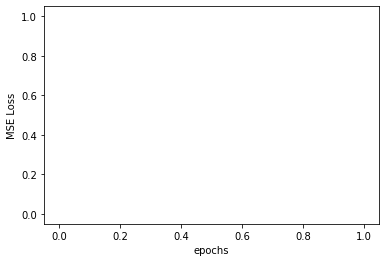

	Hessian at (1, 1, 1)
	 tensor([[  0.7732,   0.0000,   0.0000],
        [  0.0000, -10.4002,   0.0000],
        [  0.0000,   0.0000,   0.7790]], grad_fn=<CopySlices>)
	Bootstrap attempt # 5
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 7.98255834311724e+29, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 7.987678143963308e+29, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 5.0369864021583244e+26, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 8.553073860331138e+29, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 5.5366592618409986e+26, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

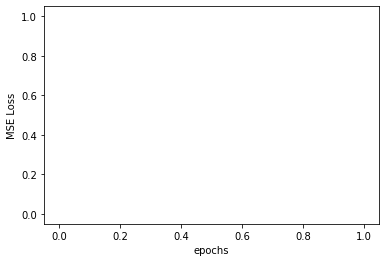

	Hessian at (1, 1, 1)
	 tensor([[-15.1833,   0.0000,   0.0000],
        [  0.0000,  -0.0669,   0.0000],
        [  0.0000,   0.0000,   7.8394]], grad_fn=<CopySlices>)
	Bootstrap attempt # 6
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 4.756275287825938e+26, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 8.111638422415708e+25, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 1.0797464068129337e+26, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 8.008407443876512e+29, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 5.273948111440857e+25, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

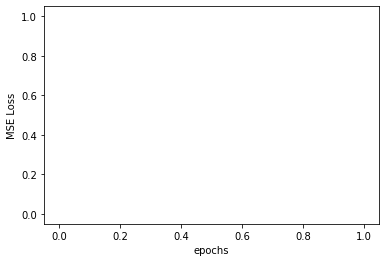

	Hessian at (1, 1, 1)
	 tensor([[47.2766,  0.0000,  0.0000],
        [ 0.0000,  1.8234,  0.0000],
        [ 0.0000,  0.0000, 27.9393]], grad_fn=<CopySlices>)
	Bootstrap attempt # 7
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 7.987134127344481e+29, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 6.416797324848577e+26, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 4.758560470481789e+26, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 1.4270144805679085e+26, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 7.993484765790644e+29, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

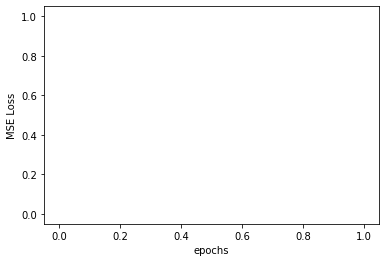

	Hessian at (1, 1, 1)
	 tensor([[1.3543, 0.0000, 0.0000],
        [0.0000, 0.5228, 0.0000],
        [0.0000, 0.0000, 0.4995]], grad_fn=<CopySlices>)
	Bootstrap attempt # 8
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 6.72327964745658e+26, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 2.25279884322742e+26, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 7.405893295336809e+26, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 1.516629408914032e+26, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 8.00065596263687e+29, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

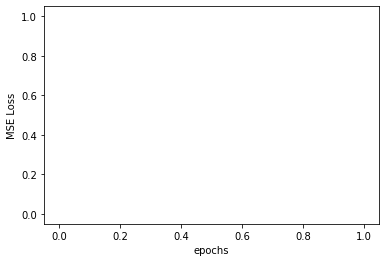

	Hessian at (1, 1, 1)
	 tensor([[-0.3267,  0.0000,  0.0000],
        [ 0.0000, -0.0543,  0.0000],
        [ 0.0000,  0.0000, -1.5720]], grad_fn=<CopySlices>)
	Bootstrap attempt # 9
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 8.016831390103314e+29, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 5.3065512558516124e+26, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 8.537051331285494e+26, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 1.130654163134311e+26, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 2.0740133685999084e+26, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

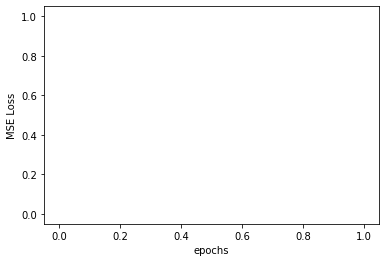

	Hessian at (1, 1, 1)
	 tensor([[0.4492, 0.0000, 0.0000],
        [0.0000, 0.0685, 0.0000],
        [0.0000, 0.0000, 1.5547]], grad_fn=<CopySlices>)
	Bootstrap attempt # 10
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 8.007601241470557e+29, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 7.332077542121216e+26, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 7.941103438542603e+26, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 7.99251838071359e+29, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 8.547020919868055e+29, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

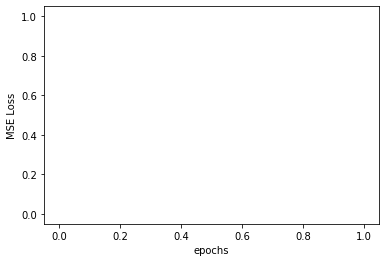

	Hessian at (1, 1, 1)
	 tensor([[ 2.7123,  0.0000,  0.0000],
        [ 0.0000,  0.4195,  0.0000],
        [ 0.0000,  0.0000, -4.2018]], grad_fn=<CopySlices>)
	Bootstrap attempt # 11
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 7.990887086435747e+29, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 5.47683683974484e+26, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 4.42466776191978e+26, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 5.431486257309388e+26, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 7.993962291489392e+29, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

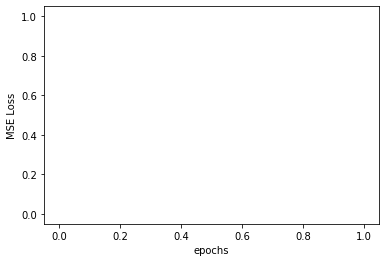

	Hessian at (1, 1, 1)
	 tensor([[-13.8528,   0.0000,   0.0000],
        [  0.0000,   4.9941,   0.0000],
        [  0.0000,   0.0000, -21.8015]], grad_fn=<CopySlices>)
	Bootstrap attempt # 12
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 3.889204898320176e+26, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 1.8788696902627128e+26, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 6.524529999587855e+26, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 8.007110870934976e+29, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 1.656050915194053e+26, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

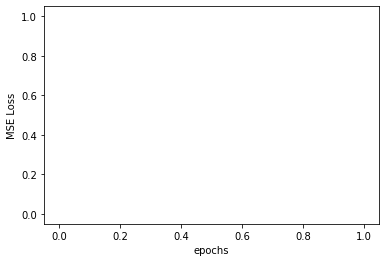

	Hessian at (1, 1, 1)
	 tensor([[  3.7870,   0.0000,   0.0000],
        [  0.0000,   1.8496,   0.0000],
        [  0.0000,   0.0000, -51.2283]], grad_fn=<CopySlices>)
	Bootstrap attempt # 13
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 1.3611408254392983e+27, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 2.346445399724573e+26, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 5.782641797910456e+26, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 1.7847680525892612e+26, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 5.935503694156302e+26, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

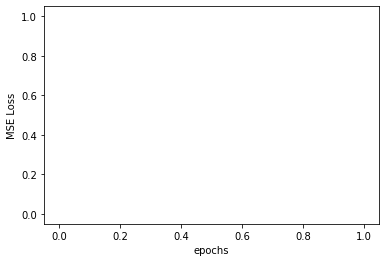

	Hessian at (1, 1, 1)
	 tensor([[  2.2651,   0.0000,   0.0000],
        [  0.0000,  -0.3682,   0.0000],
        [  0.0000,   0.0000, -19.5487]], grad_fn=<CopySlices>)
	Bootstrap attempt # 14
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 5.622076910274311e+26, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 1.1799355069241976e+27, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 4.8010698853950085e+26, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 3.090571191458113e+26, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 2.5995408158414125e+26, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

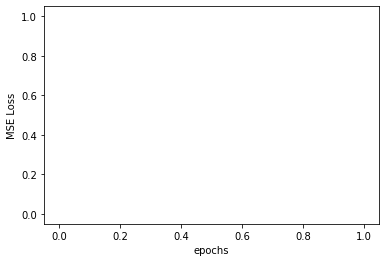

	Hessian at (1, 1, 1)
	 tensor([[  5.1458,   0.0000,   0.0000],
        [  0.0000, -11.0148,   0.0000],
        [  0.0000,   0.0000,  15.1003]], grad_fn=<CopySlices>)
	Bootstrap attempt # 15
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 8.939913464460051e+26, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 7.989184767766002e+29, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 7.993278492822672e+29, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 4.9462129260506515e+26, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 4.741741836040025e+26, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

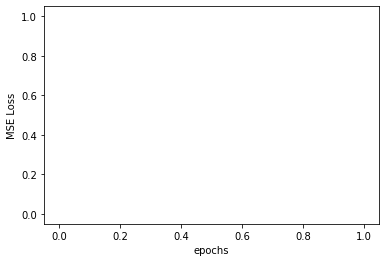

	Hessian at (1, 1, 1)
	 tensor([[  0.2043,   0.0000,   0.0000],
        [  0.0000,  15.0543,   0.0000],
        [  0.0000,   0.0000, -13.9085]], grad_fn=<CopySlices>)
	Bootstrap attempt # 16
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 1.7971744103160345e+26, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 5.464510356419906e+26, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 3.377864104075999e+26, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 2.4236350624312478e+26, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 1.0415351755026092e+26, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

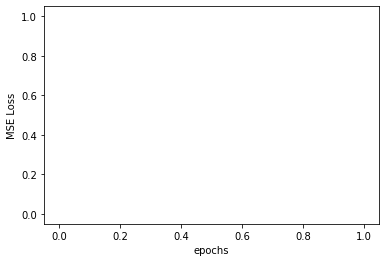

	Hessian at (1, 1, 1)
	 tensor([[-0.0612,  0.0000,  0.0000],
        [ 0.0000, -4.1680,  0.0000],
        [ 0.0000,  0.0000, -0.7529]], grad_fn=<CopySlices>)
	Bootstrap attempt # 17
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 7.991338166882191e+29, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 4.2025320697841694e+26, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 7.346617265800114e+26, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 7.996447389627337e+29, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 8.009561968034244e+29, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

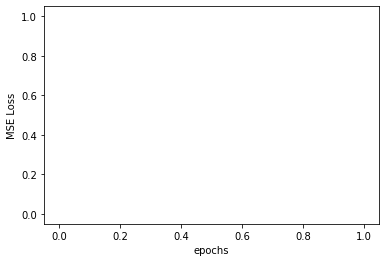

	Hessian at (1, 1, 1)
	 tensor([[ -0.8119,   0.0000,   0.0000],
        [  0.0000, -13.4669,   0.0000],
        [  0.0000,   0.0000,   4.6145]], grad_fn=<CopySlices>)
	Bootstrap attempt # 18
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 3.225247180591452e+26, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 8.542995952467376e+29, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 6.939502789181685e+25, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 2.3034724181327815e+26, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 8.862698345246555e+26, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

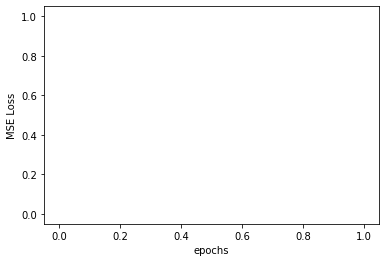

	Hessian at (1, 1, 1)
	 tensor([[  6.6657,   0.0000,   0.0000],
        [  0.0000, -28.2234,   0.0000],
        [  0.0000,   0.0000,   1.3298]], grad_fn=<CopySlices>)
	Bootstrap attempt # 19
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 6.961354064341638e+26, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 1.3593047841081539e+26, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 1.6516393763488252e+26, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 1.4692112231690783e+26, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 4.274526022555043e+26, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

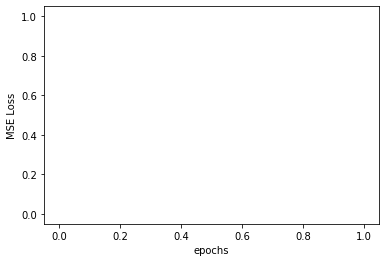

	Hessian at (1, 1, 1)
	 tensor([[-0.0291,  0.0000,  0.0000],
        [ 0.0000, -1.1287,  0.0000],
        [ 0.0000,  0.0000, -0.0801]], grad_fn=<CopySlices>)
plotting diagrams for coefficients
	plotting lambda_0


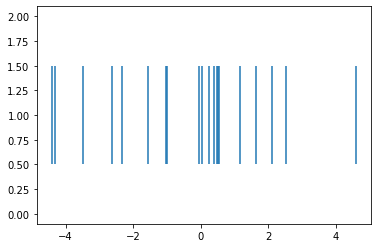

	plotting power_0


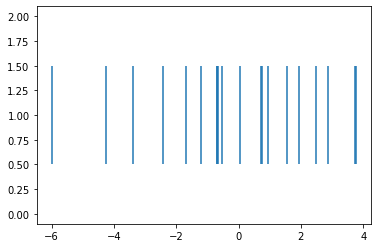

	plotting lambda_1


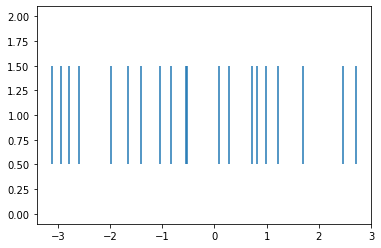

	plotting power_1


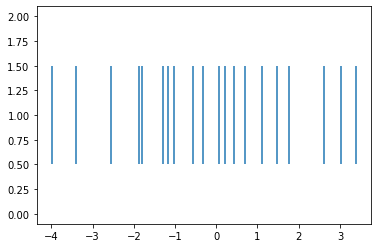

	plotting lambda_2


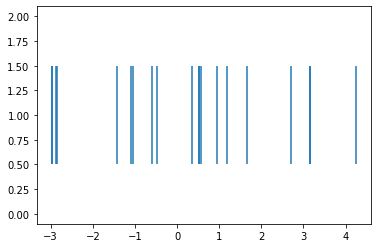

	plotting power_2


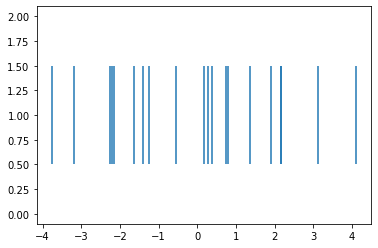

	plotting last_subformula.lambda_0


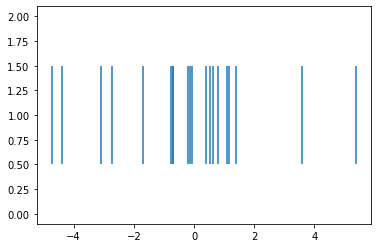


---------------------------------------------------------------------------------------------

Example 4
[29.0, 39.0, 35.0] [7, 7, 37] [4.142857074737549, 5.5714287757873535, 0.9459459185600281]
[-24.0, 28.0, -50.0] [44, 9, 35] [-0.5454545617103577, 3.1111111640930176, -1.4285714626312256]

	Bootstrap attempt # 0
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 178866748391424.0, best loss 178866748391424.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 167115248107520.0, best loss 167115248107520.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 6573262762934272.0, best loss 167115248107520.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 4829735284637696.0, best loss 167115248107520.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		F

<IPython.core.display.Math object>

<IPython.core.display.Math object>

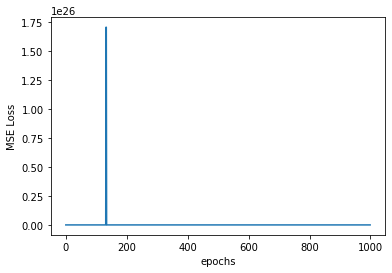

	Hessian at (1, 1, 1)
	 tensor([[ -9.6243,   0.0000,   0.0000],
        [  0.0000,  42.3416,   0.0000],
        [  0.0000,   0.0000, -45.7307]], grad_fn=<CopySlices>)
	Bootstrap attempt # 1
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 13987178610688.0, best loss 13987178610688.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 1.3954907021733003e+19, best loss 13987178610688.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 2347884347392.0, best loss 2347884347392.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 2.6106696715730944e+16, best loss 2347884347392.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 676881678467072.0, best loss 2347884347392.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

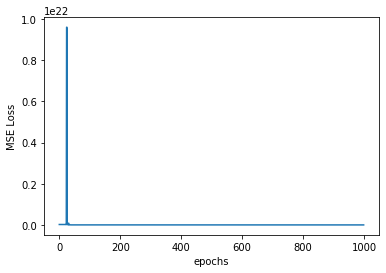

	Hessian at (1, 1, 1)
	 tensor([[-27.9093,   0.0000,   0.0000],
        [  0.0000,  37.2424,   0.0000],
        [  0.0000,   0.0000,  -1.0756]], grad_fn=<CopySlices>)
	Bootstrap attempt # 2
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 8169238787260416.0, best loss 8169238787260416.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 1.541426351651265e+19, best loss 8169238787260416.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 864752205037568.0, best loss 864752205037568.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 3673260847792128.0, best loss 864752205037568.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 1.3991731865170477e+19, best loss 864752205037568.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

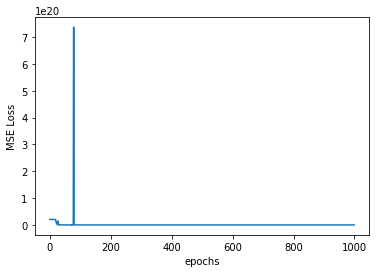

	Hessian at (1, 1, 1)
	 tensor([[3.7791e+03, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.6753e+01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 6.0880e-01]], grad_fn=<CopySlices>)
	Bootstrap attempt # 3
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 1533861401985024.0, best loss 1533861401985024.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 1.3915480733784211e+19, best loss 1533861401985024.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 1.5418071125279638e+19, best loss 1533861401985024.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 538760328511488.0, best loss 538760328511488.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 345344730726400.0, best loss 345344730726400.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

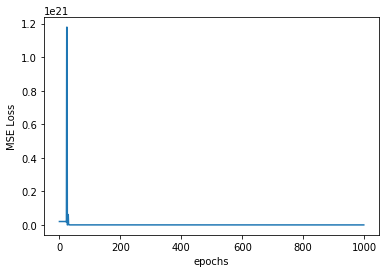

	Hessian at (1, 1, 1)
	 tensor([[-45.5674,   0.0000,   0.0000],
        [  0.0000,  45.1479,   0.0000],
        [  0.0000,   0.0000, -60.2454]], grad_fn=<CopySlices>)
	Bootstrap attempt # 4
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 1696839573176320.0, best loss 1696839573176320.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 1.5376387539959022e+19, best loss 1696839573176320.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 2785344005079040.0, best loss 1696839573176320.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 4517556912128.0, best loss 4517556912128.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 1.148443653308416e+16, best loss 4517556912128.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

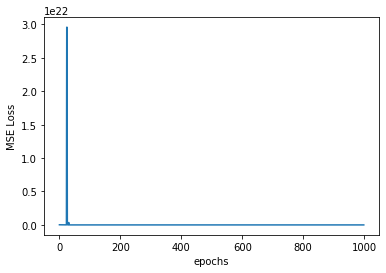

	Hessian at (1, 1, 1)
	 tensor([[ 3.9036,  0.0000,  0.0000],
        [ 0.0000, 35.7129,  0.0000],
        [ 0.0000,  0.0000, 10.8098]], grad_fn=<CopySlices>)
	Bootstrap attempt # 5
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 1527442707578880.0, best loss 1527442707578880.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 1559611878408192.0, best loss 1527442707578880.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 205268025344.0, best loss 205268025344.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 2165986769764352.0, best loss 205268025344.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 382705946591232.0, best loss 205268025344.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

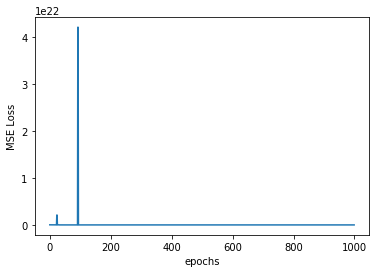

	Hessian at (1, 1, 1)
	 tensor([[-13.1050,   0.0000,   0.0000],
        [  0.0000,  36.7895,   0.0000],
        [  0.0000,   0.0000, -11.1005]], grad_fn=<CopySlices>)
	Bootstrap attempt # 6
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 1.3936575963874722e+19, best loss 1.3936575963874722e+19
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 66838822125568.0, best loss 66838822125568.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 146860484329472.0, best loss 66838822125568.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 236023200088064.0, best loss 66838822125568.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 1554638037843968.0, best loss 66838822125568.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

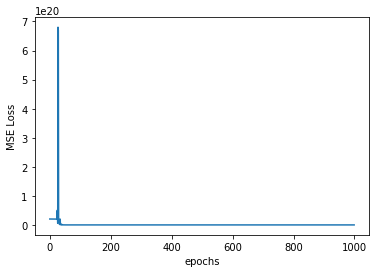

	Hessian at (1, 1, 1)
	 tensor([[4065.9065,    0.0000,    0.0000],
        [   0.0000,   33.4444,    0.0000],
        [   0.0000,    0.0000,   95.4882]], grad_fn=<CopySlices>)
	Bootstrap attempt # 7
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 1.5423423547883651e+19, best loss 1.5423423547883651e+19
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 1981211213824.0, best loss 1981211213824.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 660218144882688.0, best loss 1981211213824.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 5478934086942720.0, best loss 1981211213824.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 1.4150123112221377e+19, best loss 1981211213824.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

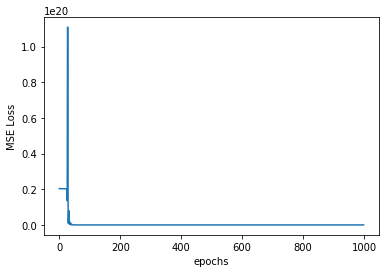

	Hessian at (1, 1, 1)
	 tensor([[ 5.7260,  0.0000,  0.0000],
        [ 0.0000, 36.0037,  0.0000],
        [ 0.0000,  0.0000, 10.2407]], grad_fn=<CopySlices>)
	Bootstrap attempt # 8
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 1.3992010041612304e+19, best loss 1.3992010041612304e+19
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 79980184731648.0, best loss 79980184731648.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 1209761559216128.0, best loss 79980184731648.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 363402166272.0, best loss 363402166272.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 7841607944503296.0, best loss 363402166272.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

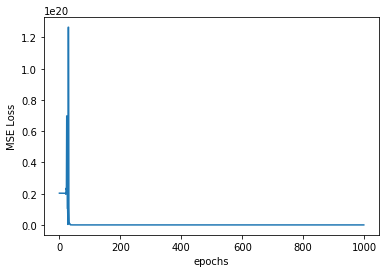

	Hessian at (1, 1, 1)
	 tensor([[2.6630e+04, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 3.6347e+01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 5.0811e+00]], grad_fn=<CopySlices>)
	Bootstrap attempt # 9
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 116371618791424.0, best loss 116371618791424.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 1.3978958838590603e+19, best loss 116371618791424.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 1.4043866308513104e+19, best loss 116371618791424.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 180969990520832.0, best loss 116371618791424.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 2806064087040.0, best loss 2806064087040.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

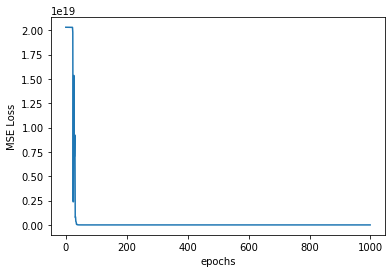

	Hessian at (1, 1, 1)
	 tensor([[13.5829,  0.0000,  0.0000],
        [ 0.0000, 35.8936,  0.0000],
        [ 0.0000,  0.0000,  5.8301]], grad_fn=<CopySlices>)
	Bootstrap attempt # 10
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 789628730736640.0, best loss 789628730736640.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 8062317723910144.0, best loss 789628730736640.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 116405810757632.0, best loss 116405810757632.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 1.3924045929364586e+19, best loss 116405810757632.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 1.4025129530864173e+19, best loss 116405810757632.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

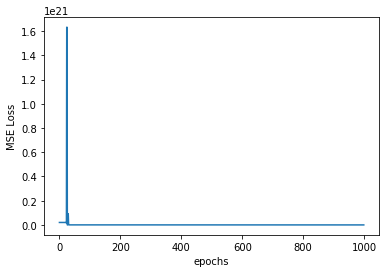

	Hessian at (1, 1, 1)
	 tensor([[21.3325,  0.0000,  0.0000],
        [ 0.0000, 32.3482,  0.0000],
        [ 0.0000,  0.0000, 43.4793]], grad_fn=<CopySlices>)
	Bootstrap attempt # 11
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 152334487257088.0, best loss 152334487257088.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 1.4211420885469889e+19, best loss 152334487257088.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 132324922490880.0, best loss 132324922490880.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 67438485962752.0, best loss 67438485962752.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 216338559664128.0, best loss 67438485962752.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

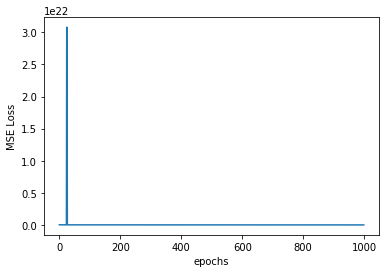

	Hessian at (1, 1, 1)
	 tensor([[ -9.5682,   0.0000,   0.0000],
        [  0.0000,  40.1616,   0.0000],
        [  0.0000,   0.0000, -31.3797]], grad_fn=<CopySlices>)
	Bootstrap attempt # 12
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 398448008364032.0, best loss 398448008364032.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 1077349059657728.0, best loss 398448008364032.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 3843785544957952.0, best loss 398448008364032.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 1357289256648704.0, best loss 398448008364032.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 5344862928896.0, best loss 5344862928896.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

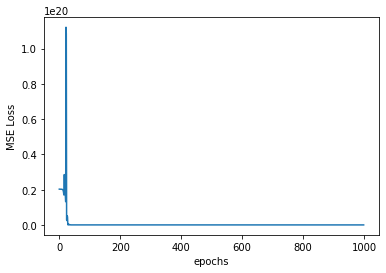

	Hessian at (1, 1, 1)
	 tensor([[-3.2596e+05,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  3.7523e+01,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -5.1915e+00]], grad_fn=<CopySlices>)
	Bootstrap attempt # 13
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 1496567395647488.0, best loss 1496567395647488.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 6645999644704768.0, best loss 1496567395647488.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 3300222268604416.0, best loss 1496567395647488.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 13271936532480.0, best loss 13271936532480.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 33314102575104.0, best loss 13271936532480.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

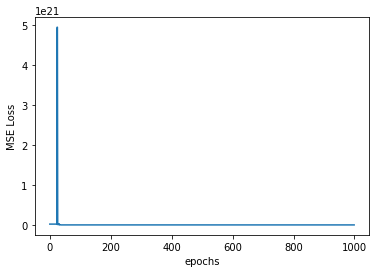

	Hessian at (1, 1, 1)
	 tensor([[21657.7188,     0.0000,     0.0000],
        [    0.0000,    35.0878,     0.0000],
        [    0.0000,     0.0000,   -29.8187]], grad_fn=<CopySlices>)
	Bootstrap attempt # 14
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 47765807693824.0, best loss 47765807693824.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 792449651834880.0, best loss 47765807693824.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 1.3907325656040997e+19, best loss 47765807693824.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 1255992587190272.0, best loss 47765807693824.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 367652723752960.0, best loss 47765807693824.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

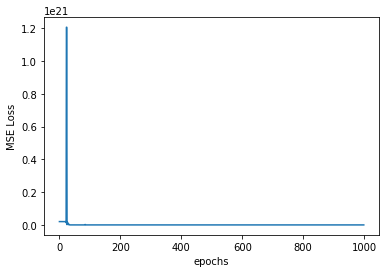

	Hessian at (1, 1, 1)
	 tensor([[6088.5234,    0.0000,    0.0000],
        [   0.0000,   39.7352,    0.0000],
        [   0.0000,    0.0000,  -20.7228]], grad_fn=<CopySlices>)
	Bootstrap attempt # 15
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 3715693019136.0, best loss 3715693019136.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 1.5460939984134996e+19, best loss 3715693019136.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 753770317217792.0, best loss 3715693019136.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 1.4047815754280075e+19, best loss 3715693019136.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 2116229267456.0, best loss 2116229267456.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

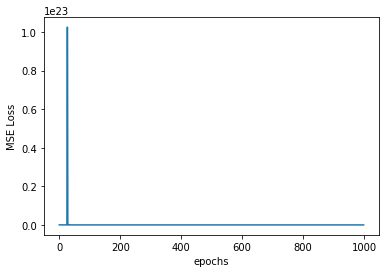

	Hessian at (1, 1, 1)
	 tensor([[-23.0259,   0.0000,   0.0000],
        [  0.0000,  37.2177,   0.0000],
        [  0.0000,   0.0000, -27.3274]], grad_fn=<CopySlices>)
	Bootstrap attempt # 16
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 1.3889373929694298e+19, best loss 1.3889373929694298e+19
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 542201536839680.0, best loss 542201536839680.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 1.5397469575909999e+19, best loss 542201536839680.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 225829552128.0, best loss 225829552128.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 1.3937474264874615e+19, best loss 225829552128.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

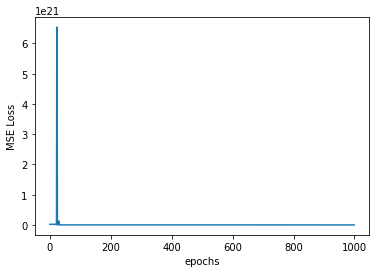

	Hessian at (1, 1, 1)
	 tensor([[-7.8242,  0.0000,  0.0000],
        [ 0.0000, 36.7979,  0.0000],
        [ 0.0000,  0.0000, -9.1357]], grad_fn=<CopySlices>)
	Bootstrap attempt # 17
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 43381002600448.0, best loss 43381002600448.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 476094071308288.0, best loss 43381002600448.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 177943464640512.0, best loss 43381002600448.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 8.332519163088077e+16, best loss 43381002600448.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 521476641914880.0, best loss 43381002600448.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

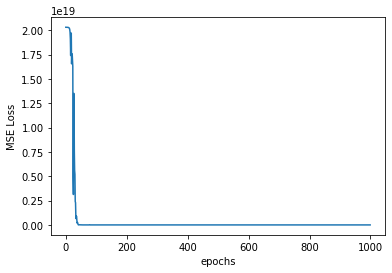

	Hessian at (1, 1, 1)
	 tensor([[-18.0615,   0.0000,   0.0000],
        [  0.0000,  39.4275,   0.0000],
        [  0.0000,   0.0000,  -8.3391]], grad_fn=<CopySlices>)
	Bootstrap attempt # 18
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 1.282939480440832e+16, best loss 1.282939480440832e+16
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 1.3962434278336758e+19, best loss 1.282939480440832e+16
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 433667981705216.0, best loss 433667981705216.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 795556054040576.0, best loss 433667981705216.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 1398411421024256.0, best loss 433667981705216.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

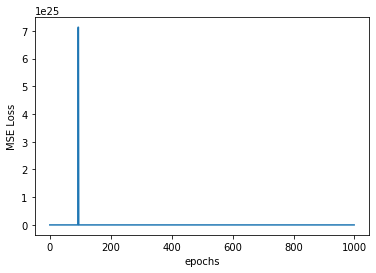

	Hessian at (1, 1, 1)
	 tensor([[-36.4620,   0.0000,   0.0000],
        [  0.0000,  46.2588,   0.0000],
        [  0.0000,   0.0000, -38.9690]], grad_fn=<CopySlices>)
	Bootstrap attempt # 19
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 2023633165746176.0, best loss 2023633165746176.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 737853638180864.0, best loss 737853638180864.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 245188291198976.0, best loss 245188291198976.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 1787534250082304.0, best loss 245188291198976.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 2772227443392512.0, best loss 245188291198976.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

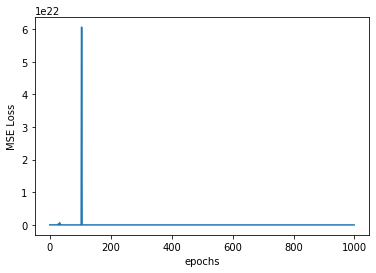

	Hessian at (1, 1, 1)
	 tensor([[-1.4600e+06,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  4.3725e+01,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -7.4602e+02]], grad_fn=<CopySlices>)
plotting diagrams for coefficients
	plotting lambda_0


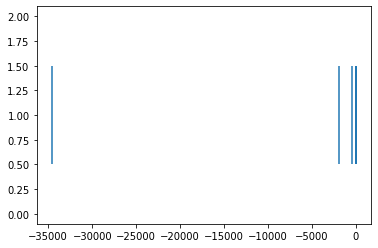

	plotting power_0


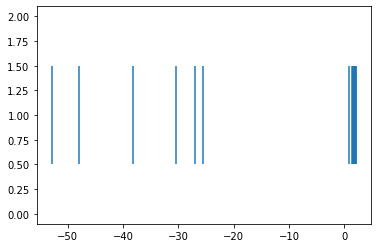

	plotting lambda_1


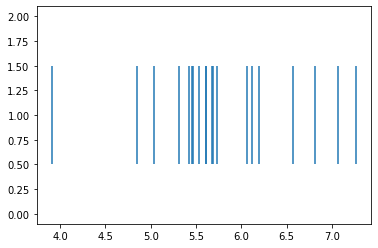

	plotting power_1


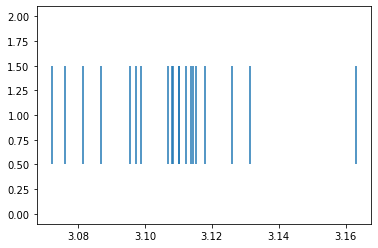

	plotting lambda_2


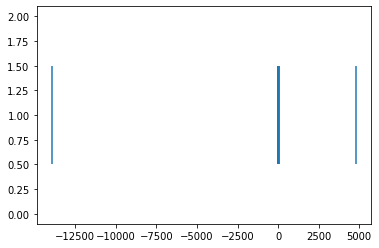

	plotting power_2


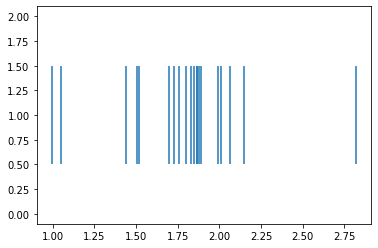

	plotting last_subformula.lambda_0


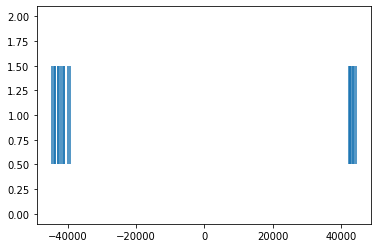


---------------------------------------------------------------------------------------------

Example 5
[42.0, -3.0, -41.0] [12, 41, 27] [3.5, -0.0731707289814949, -1.5185185670852661]
[-38.0, -13.0, -1.0] [28, 24, 29] [-1.3571428060531616, -0.5416666865348816, -0.03448275849223137]

	Bootstrap attempt # 0
		Initiation #1
		Finished run #1, loss 0.028041331097483635, best loss 0.028041331097483635
		Initiation #2
		Finished run #2, loss 2.681053229025565e-05, best loss 2.681053229025565e-05
		Initiation #3
		Finished run #3, loss 3.639061833382584e-05, best loss 2.681053229025565e-05
		Initiation #4
		Finished run #4, loss 0.030165772885084152, best loss 2.681053229025565e-05
		Initiation #5
		Finished run #5, loss 0.029930487275123596, best loss 2.681053229025565e-05
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

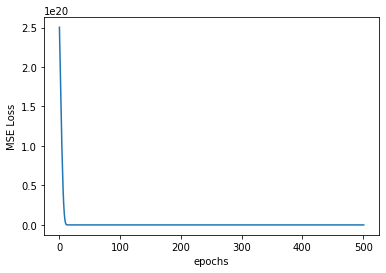

	Hessian at (1, 1, 1)
	 tensor([[11.2108,  0.0000,  0.0000],
        [ 0.0000, -0.0566,  0.0000],
        [ 0.0000,  0.0000, -0.0170]], grad_fn=<CopySlices>)
	Bootstrap attempt # 1
		Initiation #1
		Finished run #1, loss 4.2018018575618044e-05, best loss 4.2018018575618044e-05
		Initiation #2
		Finished run #2, loss 3.209417263860814e-05, best loss 3.209417263860814e-05
		Initiation #3
		Finished run #3, loss 0.029721276834607124, best loss 3.209417263860814e-05
		Initiation #4
		Finished run #4, loss 4.036906830151565e-06, best loss 4.036906830151565e-06
		Initiation #5
		Finished run #5, loss 0.02928905561566353, best loss 4.036906830151565e-06
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

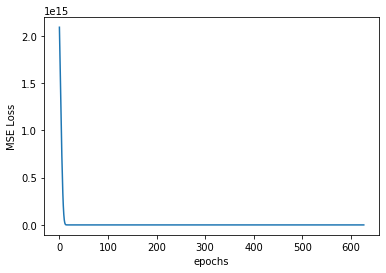

	Hessian at (1, 1, 1)
	 tensor([[ 1.1186e+01,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -3.2119e-03,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -6.4787e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 2
		Initiation #1
		Epoch 5000, current loss 0.000377, current formula \left(3.5x_1^{-1.37}-7.76e-07x_2^{1.4}-0.825x_3^{-0.258}-1.05\right)
		Epoch 10000, current loss 0.000377, current formula \left(3.5x_1^{-1.37}-7.76e-07x_2^{1.4}-0.825x_3^{-0.258}-1.05\right)
		Finished run #1, loss 0.00037673860788345337, best loss 0.00037673860788345337
		Initiation #2
		Finished run #2, loss 4.6263776312116534e-05, best loss 4.6263776312116534e-05
		Initiation #3
		Finished run #3, loss 6.663815838692244e-06, best loss 6.663815838692244e-06
		Initiation #4
		Finished run #4, loss 3.000714121625947e-09, best loss 3.000714121625947e-09
		Initiation #5
		Finished run #5, loss 1.1530561749850676e-07, best loss 3.000714121625947e-09
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

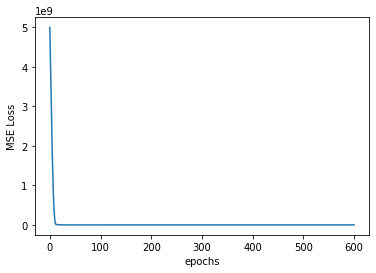

	Hessian at (1, 1, 1)
	 tensor([[11.1960,  0.0000,  0.0000],
        [ 0.0000, -0.0581,  0.0000],
        [ 0.0000,  0.0000, -0.0543]], grad_fn=<CopySlices>)
	Bootstrap attempt # 3
		Initiation #1
		Finished run #1, loss 3.343541948197526e-06, best loss 3.343541948197526e-06
		Initiation #2
		Finished run #2, loss 6.0252023104112595e-05, best loss 3.343541948197526e-06
		Initiation #3
		Finished run #3, loss 3.760272738873027e-05, best loss 3.343541948197526e-06
		Initiation #4
		Finished run #4, loss 4.8029458412202075e-05, best loss 3.343541948197526e-06
		Initiation #5
		Finished run #5, loss 3.078013105550781e-05, best loss 3.343541948197526e-06
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

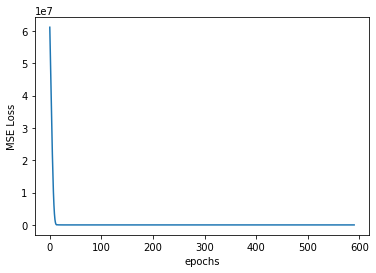

	Hessian at (1, 1, 1)
	 tensor([[ 1.1191e+01,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -2.9536e-03,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -4.9234e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 4
		Initiation #1
		Finished run #1, loss 5.709570359613281e-06, best loss 5.709570359613281e-06
		Initiation #2
		Finished run #2, loss 0.029508842155337334, best loss 5.709570359613281e-06
		Initiation #3
		Epoch 5000, current loss 0.0355, current formula \left(-0.558x_1^{0.1}-0.744x_2^{0.0499} + 2.61e-06x_3^{1.48} + 0.755\right)
		Epoch 10000, current loss 0.0355, current formula \left(-0.558x_1^{0.1}-0.744x_2^{0.0499} + 2.61e-06x_3^{1.48} + 0.755\right)
		Finished run #3, loss 0.03553101792931557, best loss 5.709570359613281e-06
		Initiation #4
		Finished run #4, loss 3.741265754797496e-05, best loss 5.709570359613281e-06
		Initiation #5
		Finished run #5, loss 7.068701961543411e-06, best loss 5.709570359613281e-06
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

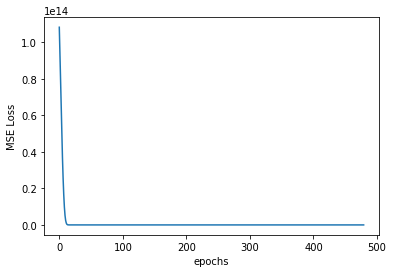

	Hessian at (1, 1, 1)
	 tensor([[ 1.1182e+01,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -4.2208e-03,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -7.4556e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 5
		Initiation #1
		Finished run #1, loss 5.8531684771878645e-05, best loss 5.8531684771878645e-05
		Initiation #2
		Finished run #2, loss 3.0104324650892522e-06, best loss 3.0104324650892522e-06
		Initiation #3
		Epoch 5000, current loss 0.0828, current formula \left(-1.42e-06x_1^{1.59}-1.52x_2^{0.0902} + 5.07e-07x_3^{1.68} + 1.38\right)
		Epoch 10000, current loss 0.0828, current formula \left(-1.42e-06x_1^{1.59}-1.52x_2^{0.0902} + 5.07e-07x_3^{1.68} + 1.38\right)
		Finished run #3, loss 0.08279938995838165, best loss 3.0104324650892522e-06
		Initiation #4
		Finished run #4, loss 0.02924974262714386, best loss 3.0104324650892522e-06
		Initiation #5
		Finished run #5, loss 3.8881582440808415e-05, best loss 3.0104324650892522e-06
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

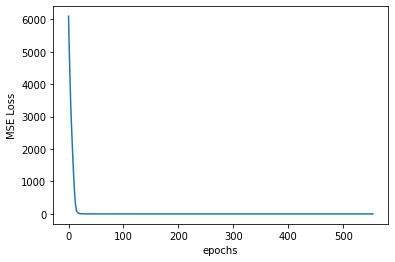

	Hessian at (1, 1, 1)
	 tensor([[11.1906,  0.0000,  0.0000],
        [ 0.0000, -0.0649,  0.0000],
        [ 0.0000,  0.0000, -0.0750]], grad_fn=<CopySlices>)
	Bootstrap attempt # 6
		Initiation #1
		Finished run #1, loss 4.1896215407177806e-05, best loss 4.1896215407177806e-05
		Initiation #2
		Epoch 5000, current loss 0.042, current formula \left(0.333x_1^{0.0606}-5.65x_2^{0.00868} + 1.65e-06x_3^{1.68} + 4.19\right)
		Epoch 10000, current loss 0.042, current formula \left(0.333x_1^{0.0606}-5.65x_2^{0.00868} + 1.65e-06x_3^{1.68} + 4.19\right)
		Finished run #2, loss 0.04197963327169418, best loss 4.1896215407177806e-05
		Initiation #3
		Finished run #3, loss 3.133851578240865e-06, best loss 3.133851578240865e-06
		Initiation #4
		Finished run #4, loss 0.028951045125722885, best loss 3.133851578240865e-06
		Initiation #5
		Finished run #5, loss 0.02910454012453556, best loss 3.133851578240865e-06
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

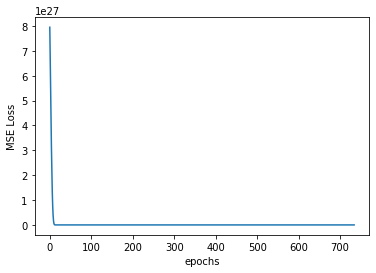

	Hessian at (1, 1, 1)
	 tensor([[ 1.1191e+01,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -3.5841e-03,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -4.8221e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 7
		Initiation #1
		Finished run #1, loss 2.3554504878120497e-05, best loss 2.3554504878120497e-05
		Initiation #2
		Finished run #2, loss 2.8566309993038885e-06, best loss 2.8566309993038885e-06
		Initiation #3
		Finished run #3, loss 3.042291609745007e-05, best loss 2.8566309993038885e-06
		Initiation #4
		Finished run #4, loss 0.029402688145637512, best loss 2.8566309993038885e-06
		Initiation #5
		Finished run #5, loss 2.5837624662017333e-07, best loss 2.5837624662017333e-07
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

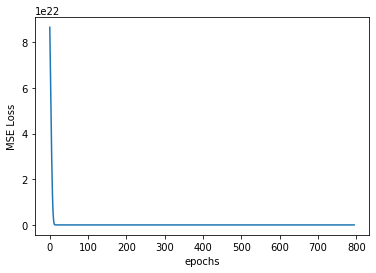

	Hessian at (1, 1, 1)
	 tensor([[11.1986,  0.0000,  0.0000],
        [ 0.0000, -0.0666,  0.0000],
        [ 0.0000,  0.0000, -0.0491]], grad_fn=<CopySlices>)
	Bootstrap attempt # 8
		Initiation #1
		Finished run #1, loss 4.280945358914323e-05, best loss 4.280945358914323e-05
		Initiation #2
		Finished run #2, loss 2.9220393571449677e-06, best loss 2.9220393571449677e-06
		Initiation #3
		Finished run #3, loss 3.670652586151846e-05, best loss 2.9220393571449677e-06
		Initiation #4
		Finished run #4, loss 3.828069748124108e-05, best loss 2.9220393571449677e-06
		Initiation #5
		Finished run #5, loss 0.030393745750188828, best loss 2.9220393571449677e-06
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

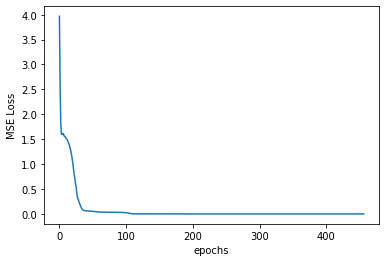

	Hessian at (1, 1, 1)
	 tensor([[11.2027,  0.0000,  0.0000],
        [ 0.0000, -0.0697,  0.0000],
        [ 0.0000,  0.0000, -0.0383]], grad_fn=<CopySlices>)
	Bootstrap attempt # 9
		Initiation #1
		Finished run #1, loss 0.030548393726348877, best loss 0.030548393726348877
		Initiation #2
		Finished run #2, loss 0.029955239966511726, best loss 0.029955239966511726
		Initiation #3
		Finished run #3, loss 0.033696260303258896, best loss 0.029955239966511726
		Initiation #4
		Finished run #4, loss 0.03022604063153267, best loss 0.029955239966511726
		Initiation #5
		Finished run #5, loss 1.1145267308165785e-05, best loss 1.1145267308165785e-05
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

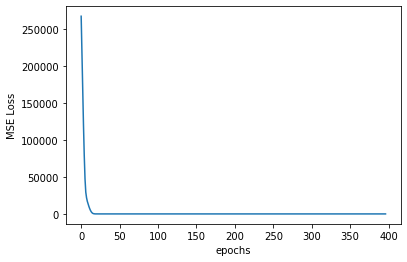

	Hessian at (1, 1, 1)
	 tensor([[ 1.1197e+01,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -3.3088e-03,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -2.9487e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 10
		Initiation #1
		Finished run #1, loss 4.43879580416251e-05, best loss 4.43879580416251e-05
		Initiation #2
		Finished run #2, loss 0.029282018542289734, best loss 4.43879580416251e-05
		Initiation #3
		Finished run #3, loss 5.260583080257675e-09, best loss 5.260583080257675e-09
		Initiation #4
		Finished run #4, loss 2.5094088414334692e-05, best loss 5.260583080257675e-09
		Initiation #5
		Finished run #5, loss 0.00038647453766316175, best loss 5.260583080257675e-09
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

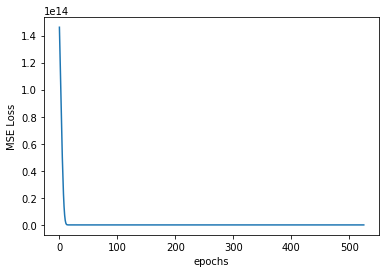

	Hessian at (1, 1, 1)
	 tensor([[11.1966,  0.0000,  0.0000],
        [ 0.0000, -0.0638,  0.0000],
        [ 0.0000,  0.0000, -0.0548]], grad_fn=<CopySlices>)
	Bootstrap attempt # 11
		Initiation #1
		Finished run #1, loss 0.029397308826446533, best loss 0.029397308826446533
		Initiation #2
		Finished run #2, loss 3.732543336809613e-05, best loss 3.732543336809613e-05
		Initiation #3
		Finished run #3, loss 5.1878116209991276e-05, best loss 3.732543336809613e-05
		Initiation #4
		Finished run #4, loss 3.174624680468696e-06, best loss 3.174624680468696e-06
		Initiation #5
		Finished run #5, loss 0.005091214086860418, best loss 3.174624680468696e-06
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

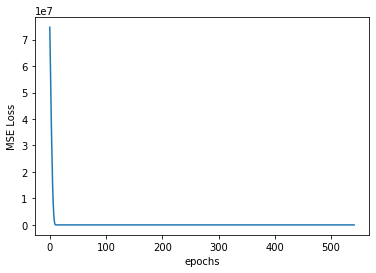

	Hessian at (1, 1, 1)
	 tensor([[ 1.1185e+01,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -5.0165e-03,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -6.3153e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 12
		Initiation #1
		Finished run #1, loss 0.029367541894316673, best loss 0.029367541894316673
		Initiation #2
		Finished run #2, loss 0.005000334233045578, best loss 0.005000334233045578
		Initiation #3
		Finished run #3, loss 1.421682918589795e-05, best loss 1.421682918589795e-05
		Initiation #4
		Finished run #4, loss 3.636906694737263e-05, best loss 1.421682918589795e-05
		Initiation #5
		Finished run #5, loss 0.029938509687781334, best loss 1.421682918589795e-05
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

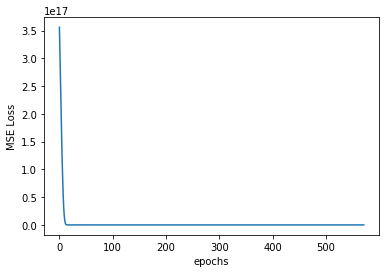

	Hessian at (1, 1, 1)
	 tensor([[ 1.1175e+01,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -3.6366e-03,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -9.9207e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 13
		Initiation #1
		Finished run #1, loss 5.222237450652756e-05, best loss 5.222237450652756e-05
		Initiation #2
		Finished run #2, loss 0.0050188289023935795, best loss 5.222237450652756e-05
		Initiation #3
		Finished run #3, loss 0.029419342055916786, best loss 5.222237450652756e-05
		Initiation #4
		Finished run #4, loss 7.729228855168913e-06, best loss 7.729228855168913e-06
		Initiation #5
		Finished run #5, loss 3.0431694995058933e-06, best loss 3.0431694995058933e-06
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

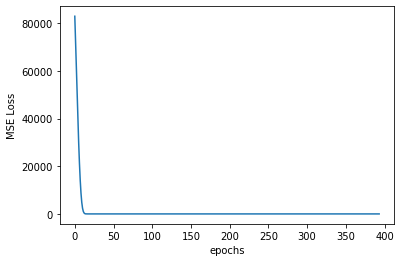

	Hessian at (1, 1, 1)
	 tensor([[ 1.1189e+01,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -3.1805e-03,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -5.1693e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 14
		Initiation #1
		Epoch 5000, current loss 0.0908, current formula \left(3.21x_1^{-1.65}-2.42e-06x_2^{1.77}-1.08e-06x_3^{1.86}-0.708\right)
		Epoch 10000, current loss 0.0908, current formula \left(3.21x_1^{-1.65}-2.42e-06x_2^{1.77}-1.08e-06x_3^{1.86}-0.708\right)
		Finished run #1, loss 0.09079655259847641, best loss 0.09079655259847641
		Initiation #2
		Finished run #2, loss 4.032758079119958e-05, best loss 4.032758079119958e-05
		Initiation #3
		Finished run #3, loss 0.027754446491599083, best loss 4.032758079119958e-05
		Initiation #4
		Finished run #4, loss 0.029909973964095116, best loss 4.032758079119958e-05
		Initiation #5
		Finished run #5, loss 0.029064370319247246, best loss 4.032758079119958e-05
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

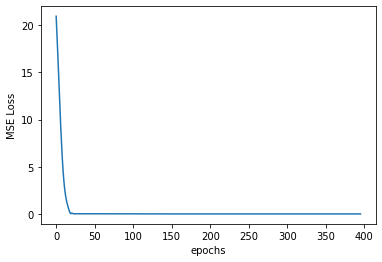

	Hessian at (1, 1, 1)
	 tensor([[11.1700,  0.0000,  0.0000],
        [ 0.0000, -0.1324,  0.0000],
        [ 0.0000,  0.0000, -0.1610]], grad_fn=<CopySlices>)
	Bootstrap attempt # 15
		Initiation #1
		Finished run #1, loss 3.0629721550212707e-06, best loss 3.0629721550212707e-06
		Initiation #2
		Finished run #2, loss 6.324217974906787e-05, best loss 3.0629721550212707e-06
		Initiation #3
		Finished run #3, loss 4.285563773009926e-05, best loss 3.0629721550212707e-06
		Initiation #4
		Finished run #4, loss 0.02938523329794407, best loss 3.0629721550212707e-06
		Initiation #5
		Finished run #5, loss 0.029273338615894318, best loss 3.0629721550212707e-06
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

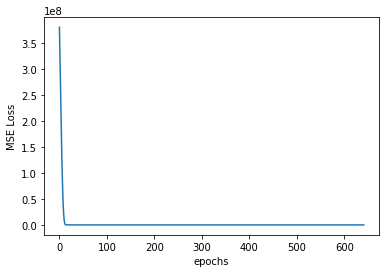

	Hessian at (1, 1, 1)
	 tensor([[ 1.1190e+01,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -3.1753e-03,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -5.0925e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 16
		Initiation #1
		Finished run #1, loss 1.0374171324656345e-05, best loss 1.0374171324656345e-05
		Initiation #2
		Epoch 5000, current loss 46.7, current formula \left(1.02x_1^{0.0994}-1.17e-06x_2^{2.42} + 0.162x_3^{-0.15} + 0.253\right)
		Epoch 10000, current loss 46.7, current formula \left(1.02x_1^{0.0994}-1.17e-06x_2^{2.42} + 0.162x_3^{-0.15} + 0.253\right)
		Finished run #2, loss 46.72337341308594, best loss 1.0374171324656345e-05
		Initiation #3
		Finished run #3, loss 0.029934706166386604, best loss 1.0374171324656345e-05
		Initiation #4
		Finished run #4, loss 3.818933691945858e-05, best loss 1.0374171324656345e-05
		Initiation #5
		Finished run #5, loss 0.02999686822295189, best loss 1.0374171324656345e-05
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

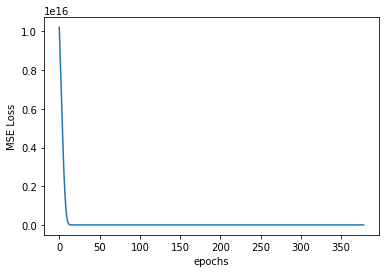

	Hessian at (1, 1, 1)
	 tensor([[11.2038,  0.0000,  0.0000],
        [ 0.0000, -0.0399,  0.0000],
        [ 0.0000,  0.0000, -0.0274]], grad_fn=<CopySlices>)
	Bootstrap attempt # 17
		Initiation #1
		Finished run #1, loss 0.029334034770727158, best loss 0.029334034770727158
		Initiation #2
		Finished run #2, loss 3.687136268126778e-05, best loss 3.687136268126778e-05
		Initiation #3
		Finished run #3, loss 0.029124358668923378, best loss 3.687136268126778e-05
		Initiation #4
		Finished run #4, loss 6.700935773551464e-05, best loss 3.687136268126778e-05
		Initiation #5
		Finished run #5, loss 2.4383352865697816e-05, best loss 2.4383352865697816e-05
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

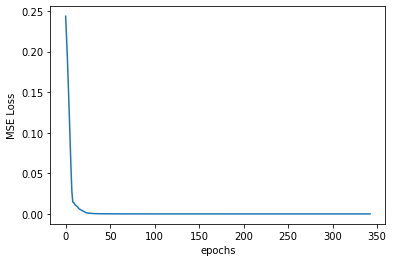

	Hessian at (1, 1, 1)
	 tensor([[11.1777,  0.0000,  0.0000],
        [ 0.0000, -0.0924,  0.0000],
        [ 0.0000,  0.0000, -0.1266]], grad_fn=<CopySlices>)
	Bootstrap attempt # 18
		Initiation #1
		Epoch 5000, current loss 0.046, current formula \left(0.537x_1^{0.0762}-0.051x_2^{-1.17} + 1.33e-06x_3^{1.61}-2.13\right)
		Epoch 10000, current loss 0.046, current formula \left(0.537x_1^{0.0762}-0.051x_2^{-1.17} + 1.33e-06x_3^{1.61}-2.13\right)
		Finished run #1, loss 0.04598294198513031, best loss 0.04598294198513031
		Initiation #2
		Finished run #2, loss 0.00012625403178390115, best loss 0.00012625403178390115
		Initiation #3
		Finished run #3, loss 0.00012818767572753131, best loss 0.00012625403178390115
		Initiation #4
		Finished run #4, loss 0.029442880302667618, best loss 0.00012625403178390115
		Initiation #5
		Finished run #5, loss 0.030295081436634064, best loss 0.00012625403178390115
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

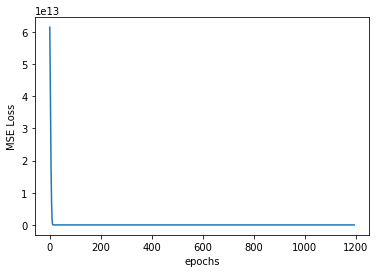

	Hessian at (1, 1, 1)
	 tensor([[ 1.1222e+01,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -2.4608e-03,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -2.7085e-03]], grad_fn=<CopySlices>)
	Bootstrap attempt # 19
		Initiation #1
		Finished run #1, loss 0.0002952088543679565, best loss 0.0002952088543679565
		Initiation #2
		Finished run #2, loss 0.030769001692533493, best loss 0.0002952088543679565
		Initiation #3
		Finished run #3, loss 0.030298342928290367, best loss 0.0002952088543679565
		Initiation #4
		Finished run #4, loss 3.641011790023185e-05, best loss 3.641011790023185e-05
		Initiation #5
		Finished run #5, loss 5.001436875318177e-05, best loss 3.641011790023185e-05
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

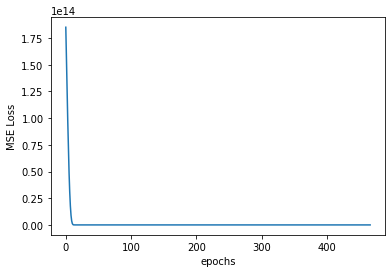

	Hessian at (1, 1, 1)
	 tensor([[11.1757,  0.0000,  0.0000],
        [ 0.0000, -0.1128,  0.0000],
        [ 0.0000,  0.0000, -0.1540]], grad_fn=<CopySlices>)
plotting diagrams for coefficients
	plotting lambda_0


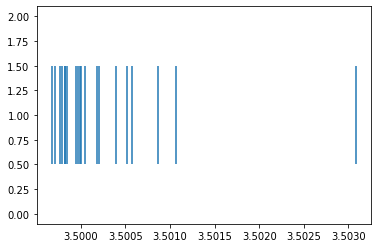

	plotting power_0


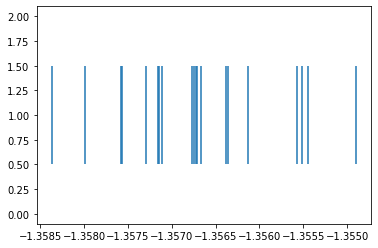

	plotting lambda_1


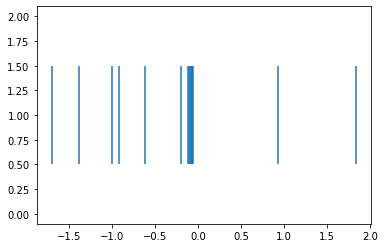

	plotting power_1


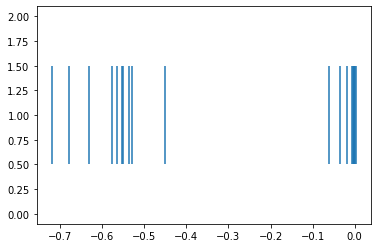

	plotting lambda_2


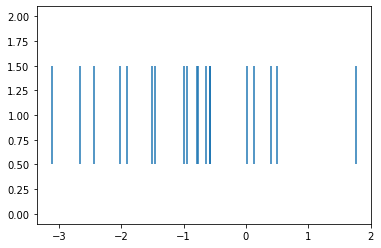

	plotting power_2


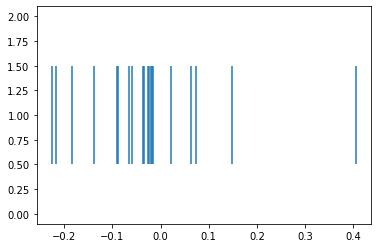

	plotting last_subformula.lambda_0


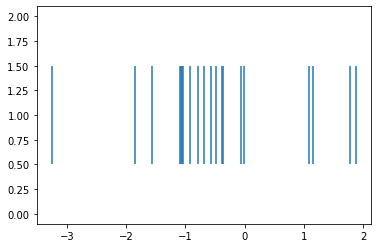


---------------------------------------------------------------------------------------------

Example 6
[-40.0, 46.0, -6.0] [7, 1, 20] [-5.714285850524902, 46.0, -0.30000001192092896]
[-45.0, 10.0, -42.0] [11, 39, 8] [-4.090909004211426, 0.25641027092933655, -5.25]

	Bootstrap attempt # 0
		Initiation #1
		Epoch 5000, current loss 1.12e+02, current formula \left(1.13x_1^{0.21}-8.67e+02x_2^{-0.0719} + 1.25e+02x_3^{-0.00371} + 6.57e+02\right)
		Epoch 10000, current loss 95.4, current formula \left(1.14x_1^{0.187}-1.14e+03x_2^{-0.0495} + 4.09e+02x_3^{-0.000943} + 6.58e+02\right)
		Finished run #1, loss 95.43875885009766, best loss 95.43875885009766
		Initiation #2
		Epoch 5000, current loss 12.0, current formula \left(-6.38x_1^{0.0359} + 14.9x_2^{0.385}-15.5x_3^{0.00992} + 86.3\right)
		Epoch 10000, current loss 1.85, current formula \left(-6.42x_1^{-0.00127} + 30.9x_2^{0.3}-15.6x_3^{0.0038} + 48.9\right)
		Finished run #2, loss 1.852751612663269, best loss 1.852751612663269
		Initiatio

<IPython.core.display.Math object>

<IPython.core.display.Math object>

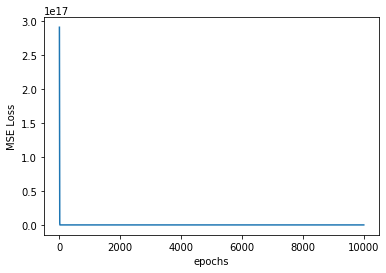

	Hessian at (1, 1, 1)
	 tensor([[-1.3624e+02,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -7.1639e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  3.0768e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 1
		Initiation #1
		Epoch 5000, current loss 3.78, current formula \left(-2.45x_1^{0.0284} + 25.0x_2^{0.324}-21.6x_3^{0.00106} + 63.0\right)
		Epoch 10000, current loss 0.843, current formula \left(-10.5x_1^{-0.0107} + 36.9x_2^{0.28}-28.5x_3^{0.000642} + 54.1\right)
		Finished run #1, loss 0.8431491255760193, best loss 0.8431491255760193
		Initiation #2
		Epoch 5000, current loss 1.13e+02, current formula \left(-0.806x_1^{-8.24}-8.61e+02x_2^{-0.0731} + 1.56e+02x_3^{-0.00265} + 6.22e+02\right)
		Epoch 10000, current loss 1.01e+02, current formula \left(-0.796x_1^{-8.5}-1.02e+03x_2^{-0.0578} + 3.2e+02x_3^{-0.00121} + 6.22e+02\right)
		Finished run #2, loss 101.46697998046875, best loss 0.8431491255760193
		Initiation #3
		Epoch 5000, current loss 3.74, current formula \left(-3

<IPython.core.display.Math object>

<IPython.core.display.Math object>

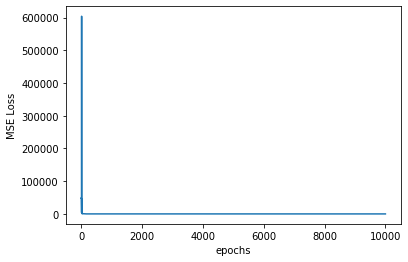

	Hessian at (1, 1, 1)
	 tensor([[-136.3259,    0.0000,    0.0000],
        [   0.0000,   -7.2805,    0.0000],
        [   0.0000,    0.0000,   10.5580]], grad_fn=<CopySlices>)
	Bootstrap attempt # 2
		Initiation #1
		Epoch 5000, current loss 1.11e+02, current formula \left(2.39x_1^{0.144}-8.75e+02x_2^{-0.0713} + 1.66e+02x_3^{-0.00211} + 6.21e+02\right)
		Epoch 10000, current loss 96.3, current formula \left(2.4x_1^{0.126}-1.12e+03x_2^{-0.0507} + 4.15e+02x_3^{-0.000962} + 6.29e+02\right)
		Finished run #1, loss 96.270751953125, best loss 96.270751953125
		Initiation #2
		Epoch 5000, current loss 4.82, current formula \left(-2.05x_1^{-0.0586} + 22.9x_2^{0.334}-52.4x_3^{0.00204} + 97.4\right)
		Epoch 10000, current loss 0.888, current formula \left(-3.46x_1^{-0.0376} + 36.5x_2^{0.281}-53.9x_3^{0.000223} + 73.0\right)
		Finished run #2, loss 0.8881521224975586, best loss 0.8881521224975586
		Initiation #3
		Epoch 5000, current loss 3.64, current formula \left(-3.51x_1^{-5.87} + 24.3x_2^{0.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

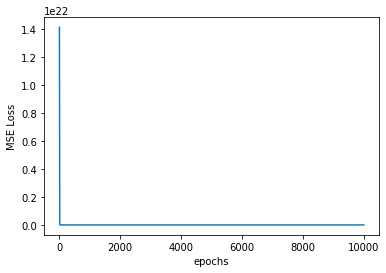

	Hessian at (1, 1, 1)
	 tensor([[-1.3617e+02,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -7.2604e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -1.8709e-03]], grad_fn=<CopySlices>)
	Bootstrap attempt # 3
		Initiation #1
		Epoch 5000, current loss 3.94, current formula \left(-6.98x_1^{0.00897} + 24.7x_2^{0.325} + 6.76x_3^{-1.55} + 46.5\right)
		Epoch 10000, current loss 0.986, current formula \left(-12.6x_1^{-0.00545} + 35.7x_2^{0.284} + 2.67x_3^{-1.55} + 30.0\right)
		Finished run #1, loss 0.9860504269599915, best loss 0.9860504269599915
		Initiation #2
		Epoch 5000, current loss 4.34, current formula \left(-2.36x_1^{-0.133} + 23.8x_2^{0.329}-4.95x_3^{0.00335} + 47.1\right)
		Epoch 10000, current loss 1.04, current formula \left(-2.36x_1^{-0.129} + 35.3x_2^{0.285}-5.36x_3^{0.00513} + 25.1\right)
		Finished run #2, loss 1.0360604524612427, best loss 0.9860504269599915
		Initiation #3
		Epoch 5000, current loss 2.42, current formula \left(-8.5x_1^{-0.0048} + 28.7x_2^{0.308} 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

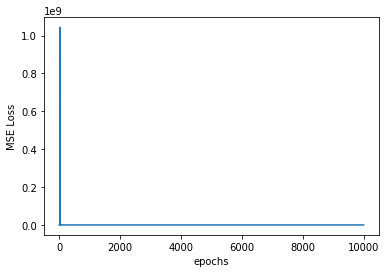

	Hessian at (1, 1, 1)
	 tensor([[-0.0845,  0.0000,  0.0000],
        [ 0.0000, -7.6687,  0.0000],
        [ 0.0000,  0.0000,  7.3088]], grad_fn=<CopySlices>)
	Bootstrap attempt # 4
		Initiation #1
		Epoch 5000, current loss 6.56, current formula \left(-1.12x_1^{0.0732} + 20.2x_2^{0.349}-3.11x_3^{0.0229} + 54.1\right)
		Epoch 10000, current loss 0.995, current formula \left(-8.01x_1^{-0.0128} + 35.7x_2^{0.284}-3.17x_3^{0.00657} + 28.6\right)
		Finished run #1, loss 0.9951542615890503, best loss 0.9951542615890503
		Initiation #2
		Epoch 5000, current loss 1.04e+02, current formula \left(44.7x_1^{0.0141}-9.66e+02x_2^{-0.0618} + 3.16e+02x_3^{-0.00112} + 5.25e+02\right)
		Epoch 10000, current loss 98.4, current formula \left(44.7x_1^{0.0131}-1.07e+03x_2^{-0.0537} + 4.26e+02x_3^{-0.000823} + 5.25e+02\right)
		Finished run #2, loss 98.39944458007812, best loss 0.9951542615890503
		Initiation #3
		Epoch 5000, current loss 4.6, current formula \left(-8.19x_1^{-3.15} + 22.4x_2^{0.336}-6.46x_3^{

<IPython.core.display.Math object>

<IPython.core.display.Math object>

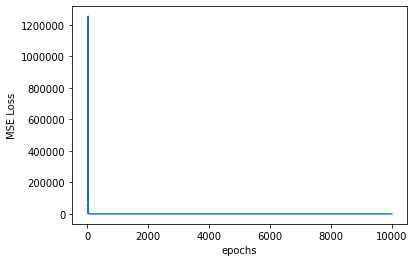

	Hessian at (1, 1, 1)
	 tensor([[-1.1212e+02,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -7.3413e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.1638e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 5
		Initiation #1
		Epoch 5000, current loss 1.12e+02, current formula \left(0.371x_1^{0.321}-8.67e+02x_2^{-0.0722} + 1.15e+02x_3^{-0.00432} + 6.68e+02\right)
		Epoch 10000, current loss 1.01e+02, current formula \left(0.37x_1^{0.308}-1.02e+03x_2^{-0.0575} + 2.74e+02x_3^{-0.00145} + 6.68e+02\right)
		Finished run #1, loss 101.14515686035156, best loss 101.14515686035156
		Initiation #2
		Epoch 5000, current loss 1.11e+02, current formula \left(0.00106x_1^{1.05}-8.81e+02x_2^{-0.0704} + 1.46e+02x_3^{-0.00323} + 6.54e+02\right)
		Epoch 10000, current loss 1.02e+02, current formula \left(0.00369x_1^{0.868}-1.01e+03x_2^{-0.0578} + 2.85e+02x_3^{-0.00141} + 6.54e+02\right)
		Finished run #2, loss 101.50390625, best loss 101.14515686035156
		Initiation #3
		Epoch 5000, current loss 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

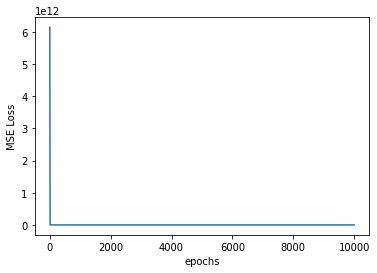

	Hessian at (1, 1, 1)
	 tensor([[-1.1167e+02,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -7.4630e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -2.2280e-03]], grad_fn=<CopySlices>)
	Bootstrap attempt # 6
		Initiation #1
		Epoch 5000, current loss 4.6, current formula \left(-2.82x_1^{0.0304} + 23.4x_2^{0.332}-1.55x_3^{0.0489} + 47.2\right)
		Epoch 10000, current loss 1.13, current formula \left(-20.0x_1^{-0.00348} + 34.7x_2^{0.287}-1.7x_3^{0.0168} + 41.1\right)
		Finished run #1, loss 1.1338874101638794, best loss 1.1338874101638794
		Initiation #2
		Epoch 5000, current loss 1.12e+02, current formula \left(3.39x_1^{0.117}-8.67e+02x_2^{-0.0722} + 88.3x_3^{-0.00569} + 6.9e+02\right)
		Epoch 10000, current loss 1.01e+02, current formula \left(3.4x_1^{0.108}-1.02e+03x_2^{-0.0573} + 2.51e+02x_3^{-0.00161} + 6.9e+02\right)
		Finished run #2, loss 100.9641342163086, best loss 1.1338874101638794
		Initiation #3
		Epoch 5000, current loss 4.54, current formula \left(-2.22x_1^{-7.37}

<IPython.core.display.Math object>

<IPython.core.display.Math object>

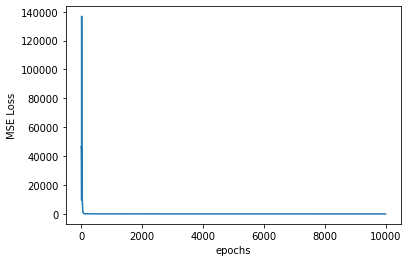

	Hessian at (1, 1, 1)
	 tensor([[-1.3232e+02,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -7.1236e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  2.6108e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 7
		Initiation #1
		Epoch 5000, current loss 6.28, current formula \left(-13.3x_1^{0.0103} + 20.6x_2^{0.346} + 1.1x_3^{0.0151} + 60.8\right)
		Epoch 10000, current loss 1.25, current formula \left(-14.0x_1^{-0.00296} + 33.9x_2^{0.289} + 0.783x_3^{0.0015} + 33.9\right)
		Finished run #1, loss 1.2503398656845093, best loss 1.2503398656845093
		Initiation #2
		Epoch 5000, current loss 6.33, current formula \left(-7.52x_1^{0.0163} + 20.5x_2^{0.347} + 8.99x_3^{-1.54} + 56.3\right)
		Epoch 10000, current loss 1.04, current formula \left(-12.4x_1^{-0.00481} + 35.3x_2^{0.285} + 2.8x_3^{-1.57} + 30.6\right)
		Finished run #2, loss 1.0405381917953491, best loss 1.0405381917953491
		Initiation #3
		Epoch 5000, current loss 1.12e+02, current formula \left(0.551x_1^{0.28}-8.69e+02x_2^{-0

<IPython.core.display.Math object>

<IPython.core.display.Math object>

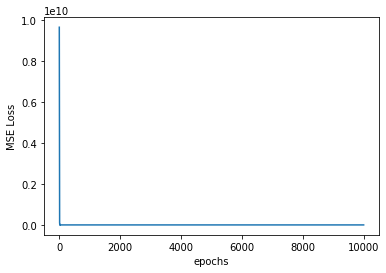

	Hessian at (1, 1, 1)
	 tensor([[-0.0934,  0.0000,  0.0000],
        [ 0.0000, -7.5185,  0.0000],
        [ 0.0000,  0.0000,  0.0111]], grad_fn=<CopySlices>)
	Bootstrap attempt # 8
		Initiation #1
		Epoch 5000, current loss 3.68, current formula \left(-2.2x_1^{0.0238} + 25.3x_2^{0.323}-15.2x_3^{0.00472} + 56.0\right)
		Epoch 10000, current loss 0.954, current formula \left(-9.76x_1^{-0.00969} + 36.0x_2^{0.283}-15.4x_3^{0.000795} + 41.9\right)
		Finished run #1, loss 0.9535973072052002, best loss 0.9535973072052002
		Initiation #2
		Epoch 5000, current loss 5.5, current formula \left(-0.0236x_1^{0.373} + 21.7x_2^{0.34}-4.24x_3^{0.0204} + 50.5\right)
		Epoch 10000, current loss 0.671, current formula \left(-0.015x_1^{-23.4} + 35.0x_2^{0.286}-4.35x_3^{0.00798} + 23.6\right)
		Finished run #2, loss 0.6708645224571228, best loss 0.6708645224571228
		Initiation #3
		Epoch 5000, current loss 4.33, current formula \left(-3.27x_1^{-6.12} + 23.0x_2^{0.334}-25.2x_3^{0.00398} + 68.5\right)
		Epoch

<IPython.core.display.Math object>

<IPython.core.display.Math object>

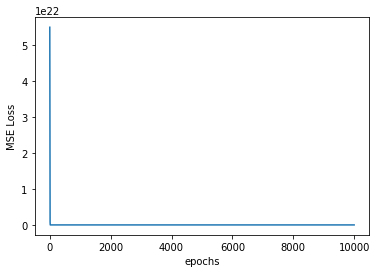

	Hessian at (1, 1, 1)
	 tensor([[-1.3646e+02,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -7.2603e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.5721e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 9
		Initiation #1
		Epoch 5000, current loss 5.0, current formula \left(-3.92x_1^{-5.54} + 21.8x_2^{0.34}-16.2x_3^{0.00693} + 62.2\right)
		Epoch 10000, current loss 0.758, current formula \left(-3.99x_1^{-5.35} + 34.4x_2^{0.288}-16.3x_3^{0.00212} + 36.7\right)
		Finished run #1, loss 0.7581087946891785, best loss 0.7581087946891785
		Initiation #2
		Epoch 5000, current loss 3.56, current formula \left(-2.89x_1^{-6.5} + 24.5x_2^{0.326}-8.89x_3^{0.00868} + 48.8\right)
		Epoch 10000, current loss 0.483, current formula \left(-2.9x_1^{-6.36} + 36.5x_2^{0.281}-9.28x_3^{0.00125} + 25.8\right)
		Finished run #2, loss 0.4827551543712616, best loss 0.4827551543712616
		Initiation #3
		Epoch 5000, current loss 4.27, current formula \left(-2.43x_1^{0.0237} + 24.0x_2^{0.329}-28.4x_3^{0

<IPython.core.display.Math object>

<IPython.core.display.Math object>

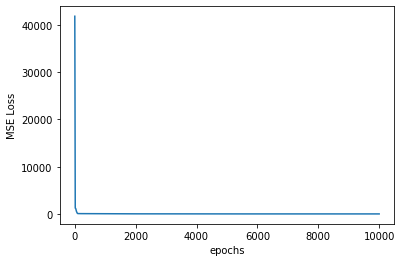

	Hessian at (1, 1, 1)
	 tensor([[-1.3582e+02,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -7.3718e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.1547e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 10
		Initiation #1
		Epoch 5000, current loss 1.12e+02, current formula \left(5.98x_1^{0.0829}-8.66e+02x_2^{-0.0721} + 1.13e+02x_3^{-0.00411} + 6.62e+02\right)
		Epoch 10000, current loss 98.4, current formula \left(5.98x_1^{0.0718}-1.07e+03x_2^{-0.0537} + 3.27e+02x_3^{-0.00121} + 6.62e+02\right)
		Finished run #1, loss 98.43421173095703, best loss 98.43421173095703
		Initiation #2
		Epoch 5000, current loss 1.07e+02, current formula \left(13.3x_1^{0.0434}-9.22e+02x_2^{-0.0661} + 2.79e+02x_3^{-0.00139} + 5.47e+02\right)
		Epoch 10000, current loss 92.5, current formula \left(13.4x_1^{0.036}-1.22e+03x_2^{-0.0454} + 5.9e+02x_3^{-0.000635} + 5.47e+02\right)
		Finished run #2, loss 92.54205322265625, best loss 92.54205322265625
		Initiation #3
		Epoch 5000, current loss 8.99, cu

<IPython.core.display.Math object>

<IPython.core.display.Math object>

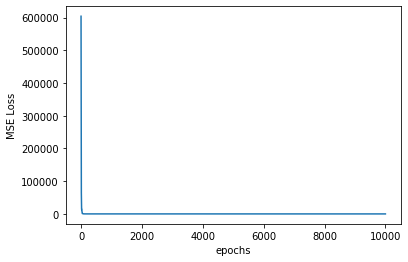

	Hessian at (1, 1, 1)
	 tensor([[-1.1234e+02,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -7.3886e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.8686e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 11
		Initiation #1
		Epoch 5000, current loss 2.19, current formula \left(-7.68x_1^{-3.29} + 28.0x_2^{0.311}-0.908x_3^{-0.016} + 33.0\right)
		Epoch 10000, current loss 0.424, current formula \left(-6.8x_1^{-3.6} + 37.0x_2^{0.28}-15.6x_3^{0.000647} + 31.2\right)
		Finished run #1, loss 0.424324631690979, best loss 0.424324631690979
		Initiation #2
		Epoch 5000, current loss 14.9, current formula \left(-2.43x_1^{-7.25} + 12.6x_2^{0.405} + 12.6x_3^{-1.5} + 68.0\right)
		Epoch 10000, current loss 1.69, current formula \left(-2.4x_1^{-7.03} + 29.8x_2^{0.304} + 4.45x_3^{-1.59} + 28.8\right)
		Finished run #2, loss 1.6864217519760132, best loss 0.424324631690979
		Initiation #3
		Epoch 5000, current loss 3.02, current formula \left(-7.65x_1^{-3.33} + 25.7x_2^{0.321}-19.7x_3^{0.003

<IPython.core.display.Math object>

<IPython.core.display.Math object>

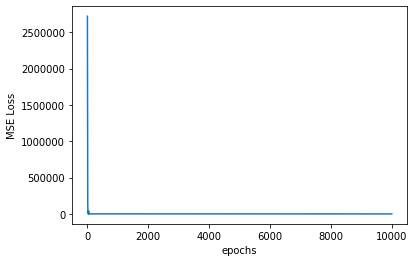

	Hessian at (1, 1, 1)
	 tensor([[-1.1250e+02,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -7.4510e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.0128e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 12
		Initiation #1
		Epoch 5000, current loss 4.87, current formula \left(-1.74x_1^{0.0236} + 22.8x_2^{0.334}-38.1x_3^{0.00216} + 83.7\right)
		Epoch 10000, current loss 0.851, current formula \left(-9.42x_1^{-0.0116} + 36.8x_2^{0.28}-41.2x_3^{0.000366} + 65.8\right)
		Finished run #1, loss 0.8513067960739136, best loss 0.8513067960739136
		Initiation #2
		Epoch 5000, current loss 1.09e+02, current formula \left(1.6x_1^{0.17}-9.02e+02x_2^{-0.0681} + 1.79e+02x_3^{-0.00227} + 6.38e+02\right)
		Epoch 10000, current loss 95.1, current formula \left(1.61x_1^{0.157}-1.15e+03x_2^{-0.049} + 4.36e+02x_3^{-0.000815} + 6.39e+02\right)
		Finished run #2, loss 95.1043472290039, best loss 0.8513067960739136
		Initiation #3
		Epoch 5000, current loss 9.72, current formula \left(-3.73x_1^{0

<IPython.core.display.Math object>

<IPython.core.display.Math object>

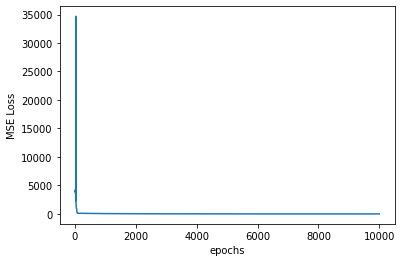

	Hessian at (1, 1, 1)
	 tensor([[-1.1345e+02,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -7.0145e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  2.7518e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 13
		Initiation #1
		Epoch 5000, current loss 4.31, current formula \left(-7.81x_1^{-3.29} + 23.0x_2^{0.333}-3.59x_3^{0.0296} + 46.9\right)
		Epoch 10000, current loss 0.574, current formula \left(-6.87x_1^{-3.58} + 35.7x_2^{0.284}-3.61x_3^{0.0103} + 21.5\right)
		Finished run #1, loss 0.5737745761871338, best loss 0.5737745761871338
		Initiation #2
		Epoch 5000, current loss 1.14e+02, current formula \left(1.1x_1^{0.215}-8.46e+02x_2^{-0.0748} + 1e+02x_3^{-0.00516} + 6.59e+02\right)
		Epoch 10000, current loss 1.04e+02, current formula \left(1.1x_1^{0.202}-9.76e+02x_2^{-0.061} + 2.37e+02x_3^{-0.00166} + 6.59e+02\right)
		Finished run #2, loss 103.66374206542969, best loss 0.5737745761871338
		Initiation #3
		Epoch 5000, current loss 4.18, current formula \left(-2.16x_1^{0.03

<IPython.core.display.Math object>

<IPython.core.display.Math object>

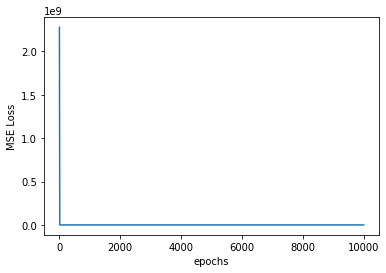

	Hessian at (1, 1, 1)
	 tensor([[-1.1269e+02,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -7.2553e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  3.6808e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 14
		Initiation #1
		Epoch 5000, current loss 3.09, current formula \left(-2.84x_1^{-6.54} + 25.6x_2^{0.321}-20.5x_3^{0.00257} + 58.2\right)
		Epoch 10000, current loss 0.479, current formula \left(-2.84x_1^{-6.43} + 36.5x_2^{0.281}-20.7x_3^{0.000507} + 37.1\right)
		Finished run #1, loss 0.47894757986068726, best loss 0.47894757986068726
		Initiation #2
		Epoch 5000, current loss 1.09e+02, current formula \left(4.6x_1^{0.0951}-9.02e+02x_2^{-0.0683} + 2.36e+02x_3^{-0.00189} + 5.78e+02\right)
		Epoch 10000, current loss 94.1, current formula \left(4.61x_1^{0.0824}-1.18e+03x_2^{-0.0476} + 5.2e+02x_3^{-0.00073} + 5.78e+02\right)
		Finished run #2, loss 94.09307098388672, best loss 0.47894757986068726
		Initiation #3
		Epoch 5000, current loss 5.24, current formula \left(-9.96e-

<IPython.core.display.Math object>

<IPython.core.display.Math object>

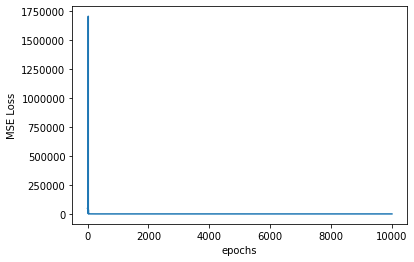

	Hessian at (1, 1, 1)
	 tensor([[-1.3566e+02,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -7.3748e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.0449e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 15
		Initiation #1
		Epoch 5000, current loss 5.32, current formula \left(-6.35e-05x_1^{1.01} + 22.0x_2^{0.338} + 7.9x_3^{-1.53} + 45.0\right)
		Epoch 10000, current loss 1.0, current formula \left(5.74e-05x_1^{1.01} + 35.7x_2^{0.284} + 2.86x_3^{-1.54} + 17.8\right)
		Finished run #1, loss 0.9998353123664856, best loss 0.9998353123664856
		Initiation #2
		Epoch 5000, current loss 6.77, current formula \left(-3.33x_1^{-6.11} + 19.3x_2^{0.354}-7.33x_3^{0.0198} + 59.0\right)
		Epoch 10000, current loss 0.833, current formula \left(-3.38x_1^{-5.89} + 33.9x_2^{0.289}-7.36x_3^{0.005} + 28.6\right)
		Finished run #2, loss 0.832793116569519, best loss 0.832793116569519
		Initiation #3
		Epoch 5000, current loss 19.6, current formula \left(-9.57x_1^{-2.83} + 10.3x_2^{0.429} + 14.5x_3

<IPython.core.display.Math object>

<IPython.core.display.Math object>

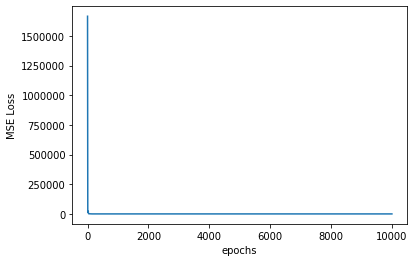

	Hessian at (1, 1, 1)
	 tensor([[-1.1476e+02,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -7.3102e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.0328e-07]], grad_fn=<CopySlices>)
	Bootstrap attempt # 16
		Initiation #1
		Epoch 5000, current loss 1.12e+02, current formula \left(3.02x_1^{0.128}-8.73e+02x_2^{-0.0712} + 1.16e+02x_3^{-0.00437} + 6.71e+02\right)
		Epoch 10000, current loss 1.02e+02, current formula \left(3.02x_1^{0.118}-1e+03x_2^{-0.0589} + 2.49e+02x_3^{-0.00163} + 6.71e+02\right)
		Finished run #1, loss 102.14421844482422, best loss 102.14421844482422
		Initiation #2
		Epoch 5000, current loss 3.65, current formula \left(-6.02x_1^{0.00642} + 25.3x_2^{0.322}-17.5x_3^{0.00382} + 61.8\right)
		Epoch 10000, current loss 0.775, current formula \left(-11.3x_1^{-0.00882} + 37.6x_2^{0.278}-17.6x_3^{0.00104} + 42.8\right)
		Finished run #2, loss 0.774878203868866, best loss 0.774878203868866
		Initiation #3
		Epoch 5000, current loss 1.08e+02, current formula \left(0.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

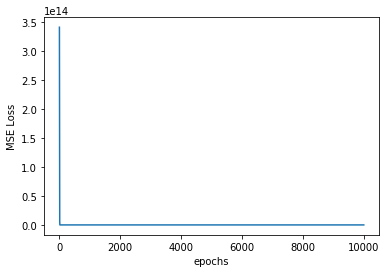

	Hessian at (1, 1, 1)
	 tensor([[-0.1002,  0.0000,  0.0000],
        [ 0.0000, -7.5465,  0.0000],
        [ 0.0000,  0.0000,  0.0183]], grad_fn=<CopySlices>)
	Bootstrap attempt # 17
		Initiation #1
		Epoch 5000, current loss 6.88, current formula \left(-3.61x_1^{-5.84} + 19.2x_2^{0.355}-11.3x_3^{0.0116} + 63.3\right)
		Epoch 10000, current loss 0.806, current formula \left(-3.68x_1^{-5.61} + 34.1x_2^{0.289}-11.5x_3^{0.00341} + 32.4\right)
		Finished run #1, loss 0.8057524561882019, best loss 0.8057524561882019
		Initiation #2
		Epoch 5000, current loss 1.11e+02, current formula \left(-6.48x_1^{-0.341}-8.81e+02x_2^{-0.0707} + 1.81e+02x_3^{-0.00213} + 6.18e+02\right)
		Epoch 10000, current loss 1.02e+02, current formula \left(-6.48x_1^{-0.336}-1e+03x_2^{-0.059} + 3.07e+02x_3^{-0.00115} + 6.18e+02\right)
		Finished run #2, loss 102.22642517089844, best loss 0.8057524561882019
		Initiation #3
		Epoch 5000, current loss 7.37, current formula \left(-1.59x_1^{-0.19} + 19.1x_2^{0.355}-17.7x_3^

<IPython.core.display.Math object>

<IPython.core.display.Math object>

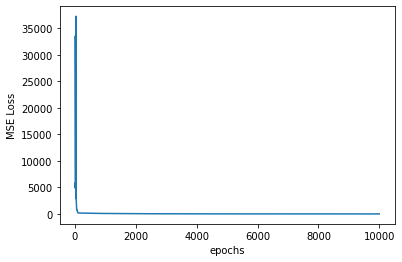

	Hessian at (1, 1, 1)
	 tensor([[-1.3361e+02,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -7.2279e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  3.3682e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 18
		Initiation #1
		Epoch 5000, current loss 1.07e+02, current formula \left(3.38x_1^{0.113}-9.22e+02x_2^{-0.0662} + 2.36e+02x_3^{-0.00163} + 6e+02\right)
		Epoch 10000, current loss 95.0, current formula \left(3.4x_1^{0.101}-1.15e+03x_2^{-0.0489} + 4.75e+02x_3^{-0.000781} + 6e+02\right)
		Finished run #1, loss 95.01747131347656, best loss 95.01747131347656
		Initiation #2
		Epoch 5000, current loss 7.7, current formula \left(-1.53x_1^{-8.64} + 18.2x_2^{0.361} + 9.61x_3^{-1.52} + 53.6\right)
		Epoch 10000, current loss 1.01, current formula \left(-1.49x_1^{-8.55} + 32.8x_2^{0.293} + 3.66x_3^{-1.65} + 23.0\right)
		Finished run #2, loss 1.0137214660644531, best loss 1.0137214660644531
		Initiation #3
		Epoch 5000, current loss 9.7, current formula \left(-4.66x_1^{-5.06} + 16

<IPython.core.display.Math object>

<IPython.core.display.Math object>

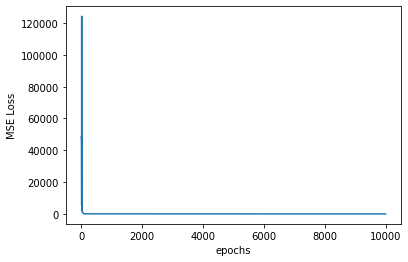

	Hessian at (1, 1, 1)
	 tensor([[-1.3214e+02,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -7.1720e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  3.1139e-02]], grad_fn=<CopySlices>)
	Bootstrap attempt # 19
		Initiation #1
		Epoch 5000, current loss 9.86, current formula \left(-8.78x_1^{-3.01} + 16.1x_2^{0.376} + 11.7x_3^{-1.57} + 58.9\right)
		Epoch 10000, current loss 1.31, current formula \left(-7.34x_1^{-3.4} + 31.3x_2^{0.298} + 3.98x_3^{-1.61} + 25.8\right)
		Finished run #1, loss 1.3133069276809692, best loss 1.3133069276809692
		Initiation #2
		Epoch 5000, current loss 5.07, current formula \left(-2.01x_1^{-7.71} + 21.6x_2^{0.341} + 0.00392x_3^{0.541} + 45.5\right)
		Epoch 10000, current loss 0.762, current formula \left(-1.99x_1^{-7.61} + 34.3x_2^{0.288} + 0.00161x_3^{0.541} + 20.2\right)
		Finished run #2, loss 0.7623794674873352, best loss 0.7623794674873352
		Initiation #3
		Epoch 5000, current loss 8.86, current formula \left(-4.74x_1^{-4.98} + 17.0x_2^{0.369} + 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

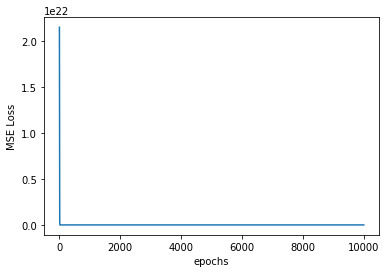

	Hessian at (1, 1, 1)
	 tensor([[-1.2997e+02,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -7.0384e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -3.9955e-04]], grad_fn=<CopySlices>)
plotting diagrams for coefficients
	plotting lambda_0


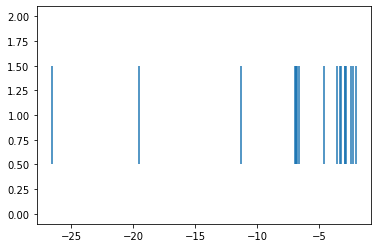

	plotting power_0


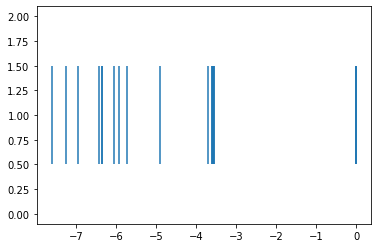

	plotting lambda_1


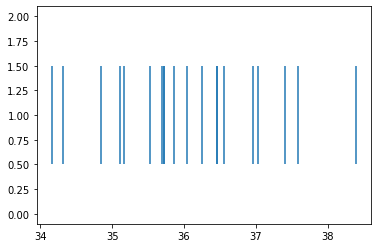

	plotting power_1


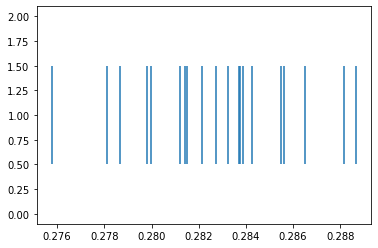

	plotting lambda_2


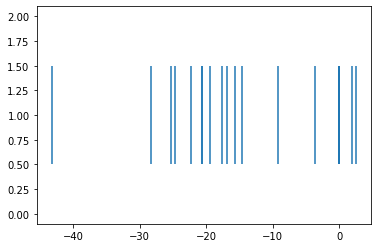

	plotting power_2


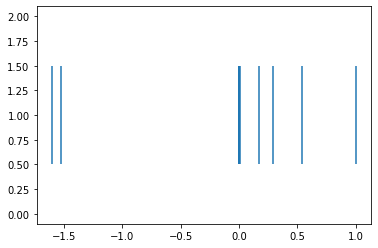

	plotting last_subformula.lambda_0


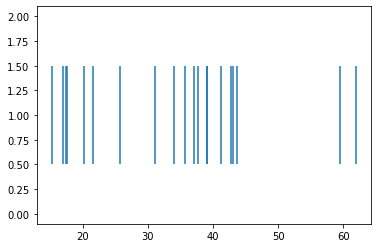


---------------------------------------------------------------------------------------------

Example 7
[8.0, 21.0, 35.0] [29, 24, 27] [0.27586206793785095, 0.875, 1.296296238899231]
[35.0, -29.0, 17.0] [4, 9, 45] [8.75, -3.222222328186035, 0.3777777850627899]

	Bootstrap attempt # 0
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

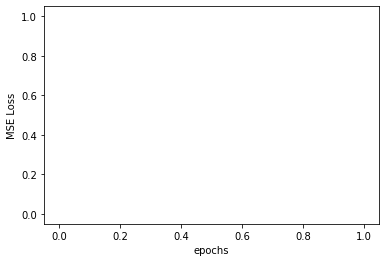

	Hessian at (1, 1, 1)
	 tensor([[-3.6414,  0.0000,  0.0000],
        [ 0.0000, -2.3329,  0.0000],
        [ 0.0000,  0.0000,  1.4762]], grad_fn=<CopySlices>)
	Bootstrap attempt # 1
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

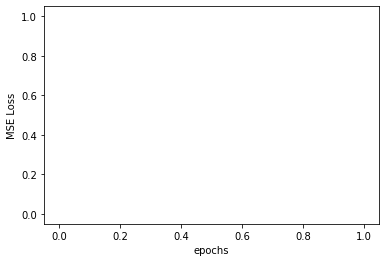

	Hessian at (1, 1, 1)
	 tensor([[4.7850, 0.0000, 0.0000],
        [0.0000, 0.9257, 0.0000],
        [0.0000, 0.0000, 4.0904]], grad_fn=<CopySlices>)
	Bootstrap attempt # 2
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

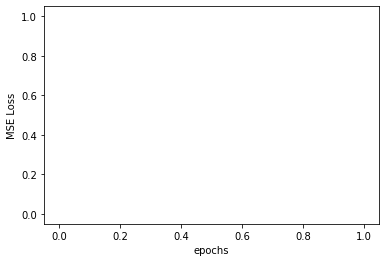

	Hessian at (1, 1, 1)
	 tensor([[0.3578, 0.0000, 0.0000],
        [0.0000, 0.1296, 0.0000],
        [0.0000, 0.0000, 0.3570]], grad_fn=<CopySlices>)
	Bootstrap attempt # 3
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

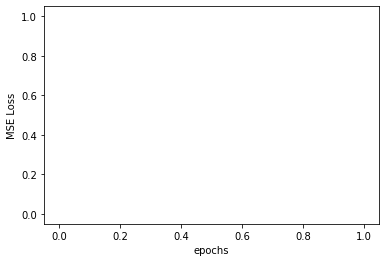

	Hessian at (1, 1, 1)
	 tensor([[ 0.1658,  0.0000,  0.0000],
        [ 0.0000,  0.2882,  0.0000],
        [ 0.0000,  0.0000, -0.0777]], grad_fn=<CopySlices>)
	Bootstrap attempt # 4
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

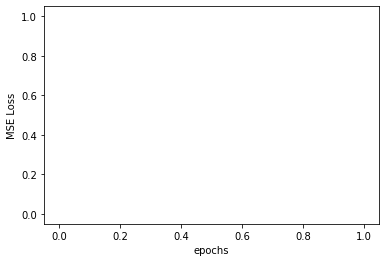

	Hessian at (1, 1, 1)
	 tensor([[ 0.5282,  0.0000,  0.0000],
        [ 0.0000, -2.2044,  0.0000],
        [ 0.0000,  0.0000, -3.3720]], grad_fn=<CopySlices>)
	Bootstrap attempt # 5
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

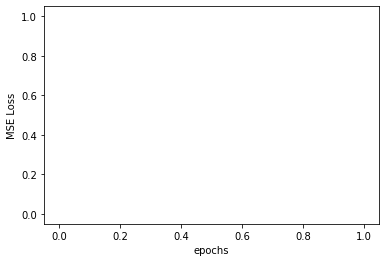

	Hessian at (1, 1, 1)
	 tensor([[ -0.6766,   0.0000,   0.0000],
        [  0.0000, -25.0845,   0.0000],
        [  0.0000,   0.0000,  -0.3472]], grad_fn=<CopySlices>)
	Bootstrap attempt # 6
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

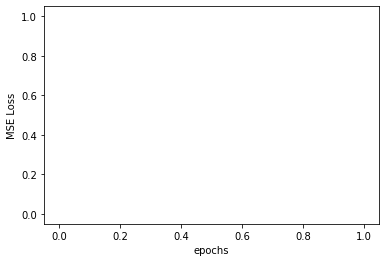

	Hessian at (1, 1, 1)
	 tensor([[ 0.0488,  0.0000,  0.0000],
        [ 0.0000,  5.0587,  0.0000],
        [ 0.0000,  0.0000, -9.5106]], grad_fn=<CopySlices>)
	Bootstrap attempt # 7
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

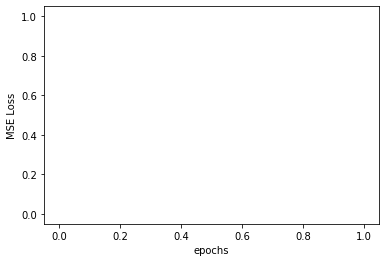

	Hessian at (1, 1, 1)
	 tensor([[-0.1882,  0.0000,  0.0000],
        [ 0.0000,  0.3466,  0.0000],
        [ 0.0000,  0.0000, -1.2211]], grad_fn=<CopySlices>)
	Bootstrap attempt # 8
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

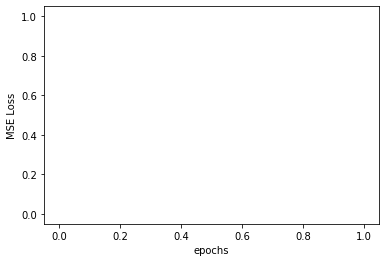

	Hessian at (1, 1, 1)
	 tensor([[25.1861,  0.0000,  0.0000],
        [ 0.0000, -0.3577,  0.0000],
        [ 0.0000,  0.0000,  0.1218]], grad_fn=<CopySlices>)
	Bootstrap attempt # 9
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

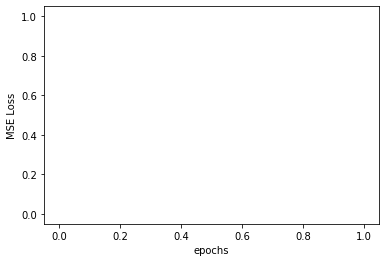

	Hessian at (1, 1, 1)
	 tensor([[-10.6280,   0.0000,   0.0000],
        [  0.0000,  -2.5936,   0.0000],
        [  0.0000,   0.0000,   2.4413]], grad_fn=<CopySlices>)
	Bootstrap attempt # 10
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

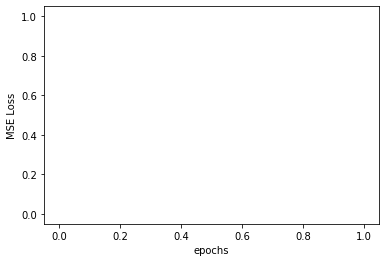

	Hessian at (1, 1, 1)
	 tensor([[-0.3476,  0.0000,  0.0000],
        [ 0.0000,  1.3772,  0.0000],
        [ 0.0000,  0.0000,  7.9799]], grad_fn=<CopySlices>)
	Bootstrap attempt # 11
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

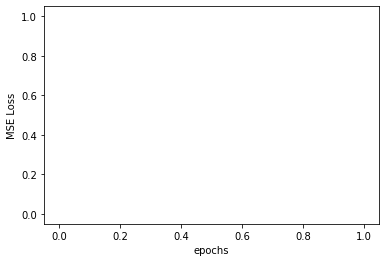

	Hessian at (1, 1, 1)
	 tensor([[-0.2408,  0.0000,  0.0000],
        [ 0.0000, -0.0645,  0.0000],
        [ 0.0000,  0.0000, -0.0913]], grad_fn=<CopySlices>)
	Bootstrap attempt # 12
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

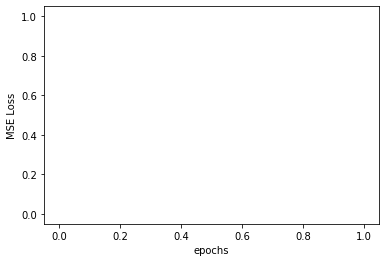

	Hessian at (1, 1, 1)
	 tensor([[ -6.9802,   0.0000,   0.0000],
        [  0.0000,  -1.5601,   0.0000],
        [  0.0000,   0.0000, -21.2095]], grad_fn=<CopySlices>)
	Bootstrap attempt # 13
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

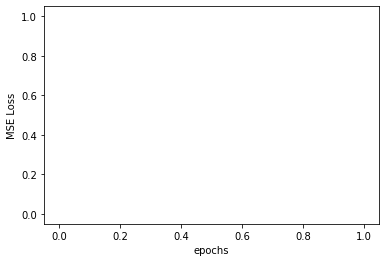

	Hessian at (1, 1, 1)
	 tensor([[  0.0166,   0.0000,   0.0000],
        [  0.0000,   9.5281,   0.0000],
        [  0.0000,   0.0000, -12.4505]], grad_fn=<CopySlices>)
	Bootstrap attempt # 14
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

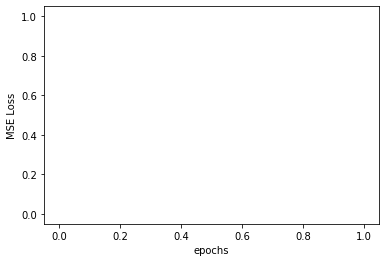

	Hessian at (1, 1, 1)
	 tensor([[ 24.0924,   0.0000,   0.0000],
        [  0.0000, -12.9709,   0.0000],
        [  0.0000,   0.0000,  -0.2314]], grad_fn=<CopySlices>)
	Bootstrap attempt # 15
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

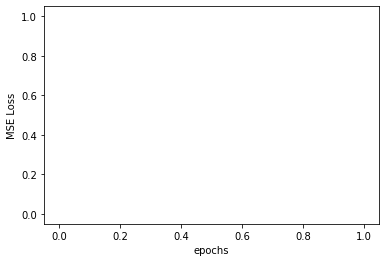

	Hessian at (1, 1, 1)
	 tensor([[6.3358, 0.0000, 0.0000],
        [0.0000, 1.6099, 0.0000],
        [0.0000, 0.0000, 0.0614]], grad_fn=<CopySlices>)
	Bootstrap attempt # 16
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

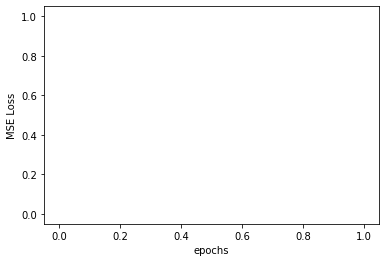

	Hessian at (1, 1, 1)
	 tensor([[  0.0212,   0.0000,   0.0000],
        [  0.0000,  -8.5075,   0.0000],
        [  0.0000,   0.0000, -21.0414]], grad_fn=<CopySlices>)
	Bootstrap attempt # 17
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

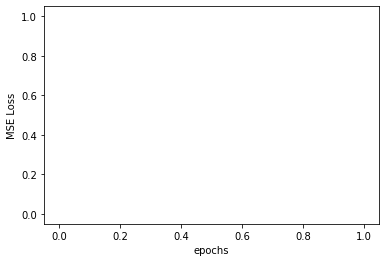

	Hessian at (1, 1, 1)
	 tensor([[ 0.1723,  0.0000,  0.0000],
        [ 0.0000, 12.4089,  0.0000],
        [ 0.0000,  0.0000,  2.4048]], grad_fn=<CopySlices>)
	Bootstrap attempt # 18
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

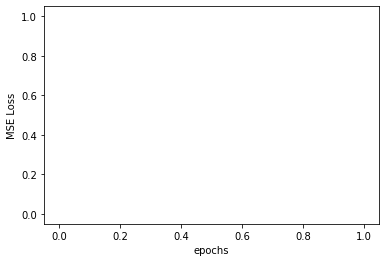

	Hessian at (1, 1, 1)
	 tensor([[ 1.7715,  0.0000,  0.0000],
        [ 0.0000, -7.7434,  0.0000],
        [ 0.0000,  0.0000, -0.2025]], grad_fn=<CopySlices>)
	Bootstrap attempt # 19
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss inf, best loss 1e+20
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss inf, best loss 1e+20
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss inf, best loss 1e+20
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss inf, best loss 1e+20
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss inf, best loss 1e+20
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

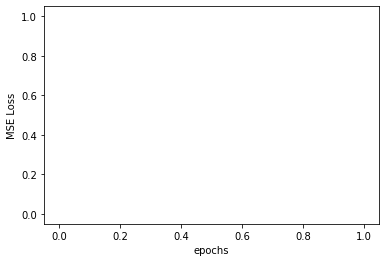

	Hessian at (1, 1, 1)
	 tensor([[-14.1369,   0.0000,   0.0000],
        [  0.0000,   1.4231,   0.0000],
        [  0.0000,   0.0000,   2.2828]], grad_fn=<CopySlices>)
plotting diagrams for coefficients
	plotting lambda_0


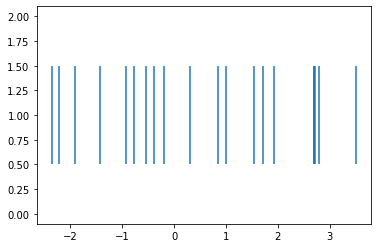

	plotting power_0


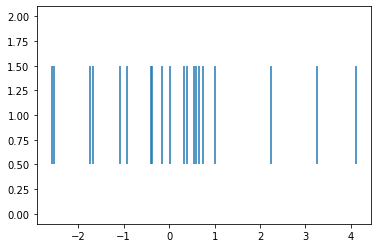

	plotting lambda_1


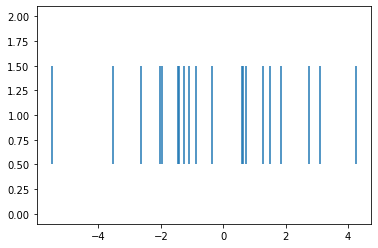

	plotting power_1


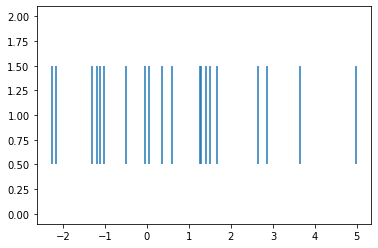

	plotting lambda_2


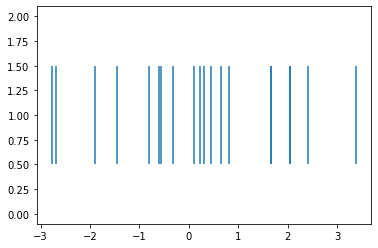

	plotting power_2


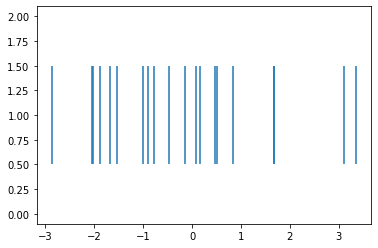

	plotting last_subformula.lambda_0


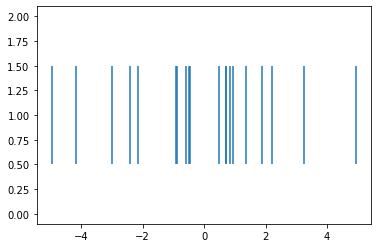


---------------------------------------------------------------------------------------------

Example 8
[20.0, -2.0, -47.0] [14, 25, 11] [1.4285714626312256, -0.07999999821186066, -4.2727274894714355]
[18.0, -4.0, -11.0] [8, 45, 7] [2.25, -0.08888889104127884, -1.5714285373687744]

	Bootstrap attempt # 0
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 1200659328.0, best loss 1200659328.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 6194320637952.0, best loss 1200659328.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 6167498588160.0, best loss 1200659328.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 5387384320.0, best loss 1200659328.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 6207982010368.0, best l

<IPython.core.display.Math object>

<IPython.core.display.Math object>

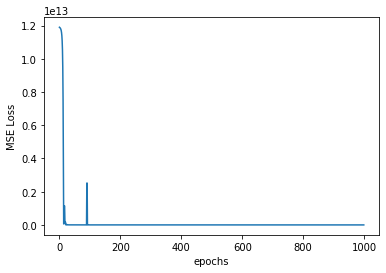

	Hessian at (1, 1, 1)
	 tensor([[2.5453, 0.0000, 0.0000],
        [0.0000, 0.4907, 0.0000],
        [0.0000, 0.0000, 0.2903]], grad_fn=<CopySlices>)
	Bootstrap attempt # 1
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 6211233120256.0, best loss 6211233120256.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 9572132864.0, best loss 9572132864.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 1055474624.0, best loss 1055474624.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 6167120576512.0, best loss 1055474624.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 6299869249536.0, best loss 1055474624.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

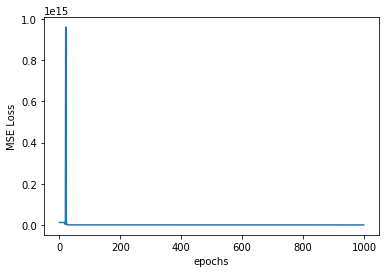

	Hessian at (1, 1, 1)
	 tensor([[6.0632, 0.0000, 0.0000],
        [0.0000, 4.6242, 0.0000],
        [0.0000, 0.0000, 2.7604]], grad_fn=<CopySlices>)
	Bootstrap attempt # 2
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 6245983453184.0, best loss 6245983453184.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 938378944.0, best loss 938378944.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 14774273024.0, best loss 938378944.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 4583073792.0, best loss 938378944.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 6255685402624.0, best loss 938378944.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

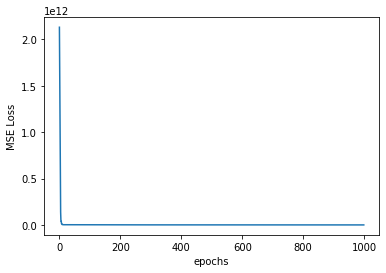

	Hessian at (1, 1, 1)
	 tensor([[2.6853, 0.0000, 0.0000],
        [0.0000, 0.3952, 0.0000],
        [0.0000, 0.0000, 0.2267]], grad_fn=<CopySlices>)
	Bootstrap attempt # 3
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 1371069952.0, best loss 1371069952.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 6162268815360.0, best loss 1371069952.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 6439182532608.0, best loss 1371069952.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 55713951744.0, best loss 1371069952.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 6189347241984.0, best loss 1371069952.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

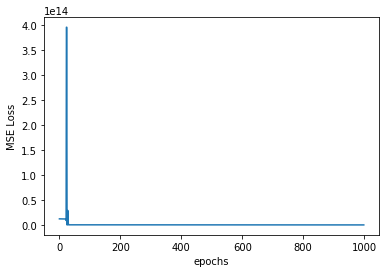

	Hessian at (1, 1, 1)
	 tensor([[6.4112, 0.0000, 0.0000],
        [0.0000, 1.2316, 0.0000],
        [0.0000, 0.0000, 0.7569]], grad_fn=<CopySlices>)
	Bootstrap attempt # 4
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 120470632.0, best loss 120470632.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 6291247857664.0, best loss 120470632.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 1308882944.0, best loss 120470632.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 6192543825920.0, best loss 120470632.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 6200453758976.0, best loss 120470632.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

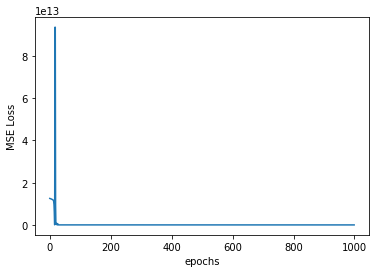

	Hessian at (1, 1, 1)
	 tensor([[ 3.4836,  0.0000,  0.0000],
        [ 0.0000, -1.7243,  0.0000],
        [ 0.0000,  0.0000, -0.1246]], grad_fn=<CopySlices>)
	Bootstrap attempt # 5
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 3281380096.0, best loss 3281380096.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 2730194944.0, best loss 2730194944.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 5563056640.0, best loss 2730194944.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 6204252225536.0, best loss 2730194944.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 2891247616.0, best loss 2730194944.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

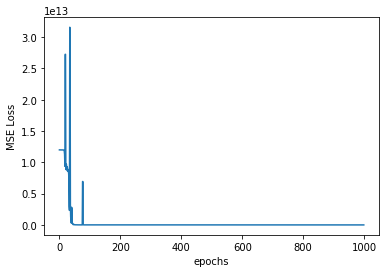

	Hessian at (1, 1, 1)
	 tensor([[ 7.5900e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -2.3990e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.7602e+05]], grad_fn=<CopySlices>)
	Bootstrap attempt # 6
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 1174047616.0, best loss 1174047616.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 323871968.0, best loss 323871968.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 2912475392.0, best loss 323871968.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 4151839232.0, best loss 323871968.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 6266300661760.0, best loss 323871968.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

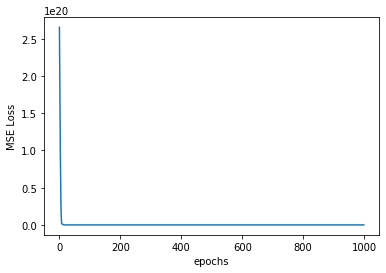

	Hessian at (1, 1, 1)
	 tensor([[ 4.9313e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -1.1169e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -5.8079e-06]], grad_fn=<CopySlices>)
	Bootstrap attempt # 7
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 4276719872.0, best loss 4276719872.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 6330977353728.0, best loss 4276719872.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 6303850168320.0, best loss 4276719872.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 2697743360.0, best loss 2697743360.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 1506254976.0, best loss 1506254976.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

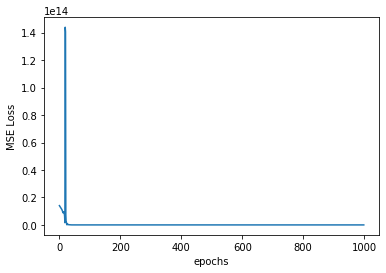

	Hessian at (1, 1, 1)
	 tensor([[ 6.5406e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -5.1361e-02,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.5984e+05]], grad_fn=<CopySlices>)
	Bootstrap attempt # 8
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 6345078784.0, best loss 6345078784.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 1892419456.0, best loss 1892419456.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 8092756480.0, best loss 1892419456.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 6184220753920.0, best loss 1892419456.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 1700083328.0, best loss 1700083328.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

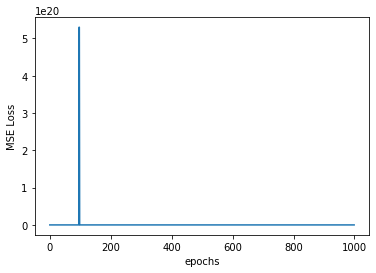

	Hessian at (1, 1, 1)
	 tensor([[ 6.7410,  0.0000,  0.0000],
        [ 0.0000,  0.1146,  0.0000],
        [ 0.0000,  0.0000, -0.4019]], grad_fn=<CopySlices>)
	Bootstrap attempt # 9
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 12462830592.0, best loss 12462830592.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 6171266646016.0, best loss 12462830592.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 519355904.0, best loss 519355904.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 6183046873088.0, best loss 519355904.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 92680232.0, best loss 92680232.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

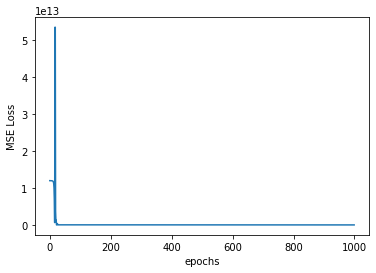

	Hessian at (1, 1, 1)
	 tensor([[ 3.5457,  0.0000,  0.0000],
        [ 0.0000, -4.8079,  0.0000],
        [ 0.0000,  0.0000, -1.3095]], grad_fn=<CopySlices>)
	Bootstrap attempt # 10
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 99674304.0, best loss 99674304.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 6343389872128.0, best loss 99674304.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 557817792.0, best loss 99674304.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 1531170.25, best loss 1531170.25
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 3831091712.0, best loss 1531170.25
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

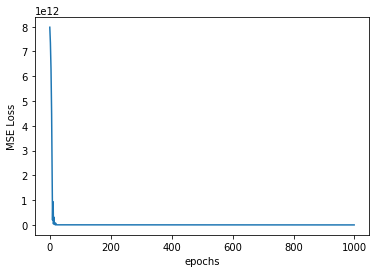

	Hessian at (1, 1, 1)
	 tensor([[4.0825e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 7.1344e-01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 1.1223e+04]], grad_fn=<CopySlices>)
	Bootstrap attempt # 11
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 6187665326080.0, best loss 6187665326080.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 6200007065600.0, best loss 6187665326080.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 6266646691840.0, best loss 6187665326080.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 510602976.0, best loss 510602976.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 12674838528.0, best loss 510602976.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

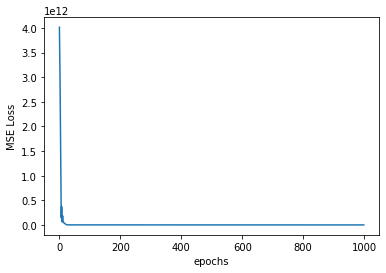

	Hessian at (1, 1, 1)
	 tensor([[ 2.9884,  0.0000,  0.0000],
        [ 0.0000,  0.1829,  0.0000],
        [ 0.0000,  0.0000, -0.1849]], grad_fn=<CopySlices>)
	Bootstrap attempt # 12
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 8972001280.0, best loss 8972001280.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 6227131629568.0, best loss 8972001280.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 461559232.0, best loss 461559232.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 1136077440.0, best loss 461559232.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 22139088.0, best loss 22139088.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

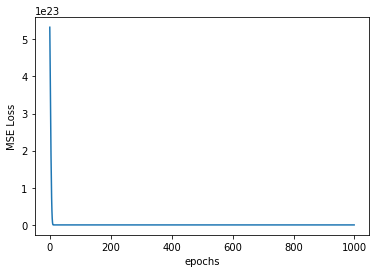

	Hessian at (1, 1, 1)
	 tensor([[ 3.7799e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  7.0250e-05,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -6.9303e-01]], grad_fn=<CopySlices>)
	Bootstrap attempt # 13
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 6211596451840.0, best loss 6211596451840.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 4821046272.0, best loss 4821046272.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 6891496960.0, best loss 4821046272.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 6180460036096.0, best loss 4821046272.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 6269566451712.0, best loss 4821046272.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

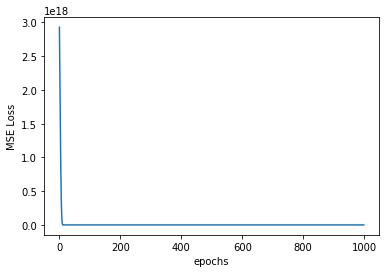

	Hessian at (1, 1, 1)
	 tensor([[ 8.9731e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -6.6082e-02,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  2.5811e+05]], grad_fn=<CopySlices>)
	Bootstrap attempt # 14
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 6261709471744.0, best loss 6261709471744.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 3166947584.0, best loss 3166947584.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 5377645056.0, best loss 3166947584.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 5239546368.0, best loss 3166947584.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 9853635584.0, best loss 3166947584.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

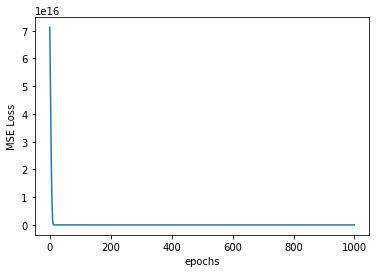

	Hessian at (1, 1, 1)
	 tensor([[ 1.9348e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -1.1935e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -1.6884e+05]], grad_fn=<CopySlices>)
	Bootstrap attempt # 15
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 6274256732160.0, best loss 6274256732160.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 2499680256.0, best loss 2499680256.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 1008551104.0, best loss 1008551104.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 6173195501568.0, best loss 1008551104.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 1942369024.0, best loss 1008551104.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

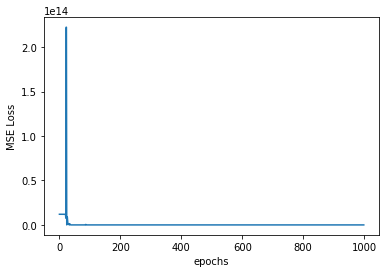

	Hessian at (1, 1, 1)
	 tensor([[6.0102, 0.0000, 0.0000],
        [0.0000, 2.1032, 0.0000],
        [0.0000, 0.0000, 3.9778]], grad_fn=<CopySlices>)
	Bootstrap attempt # 16
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 6180338925568.0, best loss 6180338925568.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 3618536192.0, best loss 3618536192.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 1629264896.0, best loss 1629264896.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 1583878656.0, best loss 1583878656.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 6309470011392.0, best loss 1583878656.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

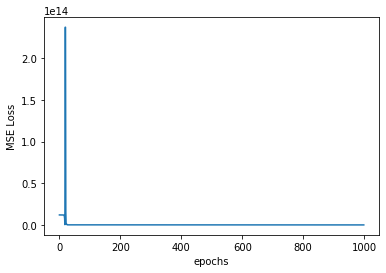

	Hessian at (1, 1, 1)
	 tensor([[ 6.6301,  0.0000,  0.0000],
        [ 0.0000, -0.6911,  0.0000],
        [ 0.0000,  0.0000, -0.2302]], grad_fn=<CopySlices>)
	Bootstrap attempt # 17
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 3284073472.0, best loss 3284073472.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 6170534739968.0, best loss 3284073472.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 2615407616.0, best loss 2615407616.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 2573792768.0, best loss 2573792768.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 5595476992.0, best loss 2573792768.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

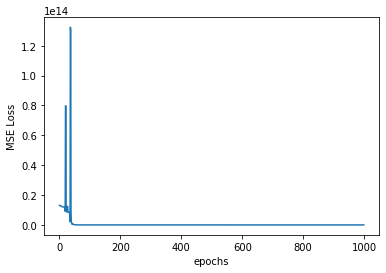

	Hessian at (1, 1, 1)
	 tensor([[ 7.5073,  0.0000,  0.0000],
        [ 0.0000, -1.8383,  0.0000],
        [ 0.0000,  0.0000, -1.3027]], grad_fn=<CopySlices>)
	Bootstrap attempt # 18
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 2277602816.0, best loss 2277602816.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 5033998.5, best loss 5033998.5
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 550506176.0, best loss 5033998.5
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 1646597888.0, best loss 5033998.5
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 1120217216.0, best loss 5033998.5
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

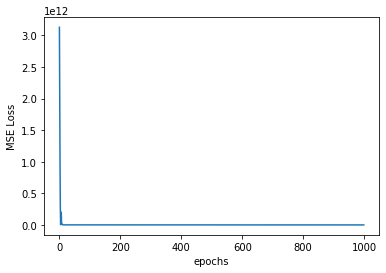

	Hessian at (1, 1, 1)
	 tensor([[4.1358, 0.0000, 0.0000],
        [0.0000, 0.2316, 0.0000],
        [0.0000, 0.0000, 0.5518]], grad_fn=<CopySlices>)
	Bootstrap attempt # 19
		Initiation #1
		The model does not seem to converge, finishing at epoch 1000
		Finished run #1, loss 10217068544.0, best loss 10217068544.0
		Initiation #2
		The model does not seem to converge, finishing at epoch 1000
		Finished run #2, loss 1724167552.0, best loss 1724167552.0
		Initiation #3
		The model does not seem to converge, finishing at epoch 1000
		Finished run #3, loss 3130946560.0, best loss 1724167552.0
		Initiation #4
		The model does not seem to converge, finishing at epoch 1000
		Finished run #4, loss 6190968864768.0, best loss 1724167552.0
		Initiation #5
		The model does not seem to converge, finishing at epoch 1000
		Finished run #5, loss 1424588672.0, best loss 1424588672.0
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

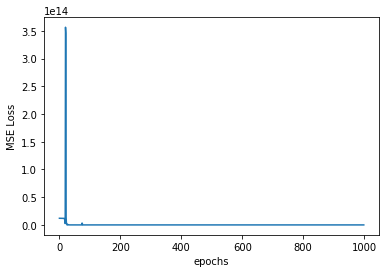

	Hessian at (1, 1, 1)
	 tensor([[6.4673, 0.0000, 0.0000],
        [0.0000, 1.2015, 0.0000],
        [0.0000, 0.0000, 3.3604]], grad_fn=<CopySlices>)
plotting diagrams for coefficients
	plotting lambda_0


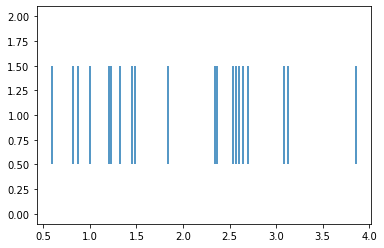

	plotting power_0


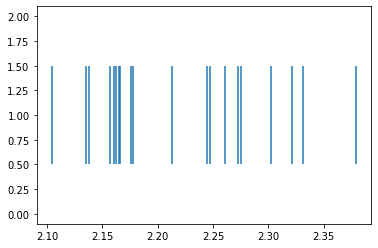

	plotting lambda_1


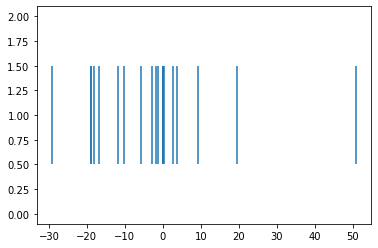

	plotting power_1


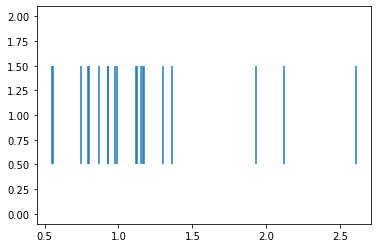

	plotting lambda_2


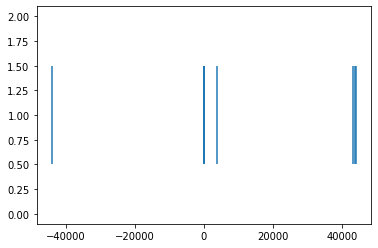

	plotting power_2


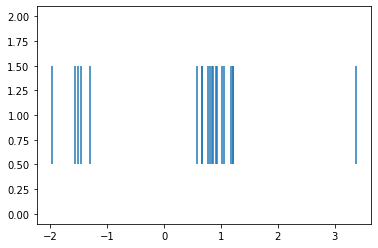

	plotting last_subformula.lambda_0


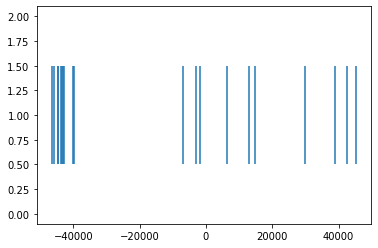


---------------------------------------------------------------------------------------------

Example 9
[-35.0, -41.0, 4.0] [46, 46, 8] [-0.760869562625885, -0.8913043737411499, 0.5]
[7.0, -17.0, 9.0] [15, 40, 33] [0.46666666865348816, -0.42500001192092896, 0.27272728085517883]

	Bootstrap attempt # 0
		Initiation #1
		Epoch 5000, current loss 2.71, current formula \left(91.1x_1^{-0.0574}-2.28x_2^{0.00909}-49.2x_3^{-0.00962}-26.6\right)
		Epoch 10000, current loss 2.49, current formula \left(1.21e+02x_1^{-0.0401}-2.32x_2^{-0.00168}-80.1x_3^{-0.00585}-26.7\right)
		Finished run #1, loss 2.4909210205078125, best loss 2.4909210205078125
		Initiation #2
		Epoch 5000, current loss 2.75, current formula \left(88.1x_1^{-0.0599}-0.0232x_2^{0.253}-44.1x_3^{-0.0108}-31.0\right)
		Epoch 10000, current loss 2.6, current formula \left(1.04e+02x_1^{-0.0485}-0.0198x_2^{0.209}-60.3x_3^{-0.00773}-31.0\right)
		Finished run #2, loss 2.5972330570220947, best loss 2.4909210205078125
		Initiation #3
		Ep

<IPython.core.display.Math object>

<IPython.core.display.Math object>

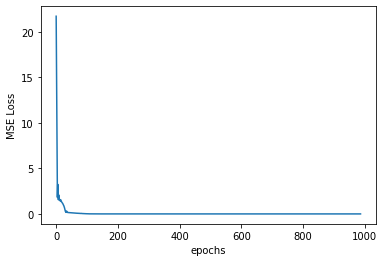

	Hessian at (1, 1, 1)
	 tensor([[ 0.1892,  0.0000,  0.0000],
        [ 0.0000, -0.0717,  0.0000],
        [ 0.0000,  0.0000, -0.2221]], grad_fn=<CopySlices>)
	Bootstrap attempt # 1
		Initiation #1
		Finished run #1, loss 0.02042950876057148, best loss 0.02042950876057148
		Initiation #2
		Finished run #2, loss 0.0017306370427832007, best loss 0.0017306370427832007
		Initiation #3
		Finished run #3, loss 0.0011756358435377479, best loss 0.0011756358435377479
		Initiation #4
		Epoch 5000, current loss 2.66, current formula \left(96.9x_1^{-0.053}-0.696x_2^{0.0219}-56.4x_3^{-0.00817}-27.0\right)
		Epoch 10000, current loss 2.45, current formula \left(1.32e+02x_1^{-0.0365}-0.765x_2^{-0.00331}-91.6x_3^{-0.00508}-27.1\right)
		Finished run #4, loss 2.445589065551758, best loss 0.0011756358435377479
		Initiation #5
		Epoch 5000, current loss 0.0334, current formula \left(-1.18x_1^{0.412} + 2.48x_2^{0.0173}-11.1x_3^{-0.0727} + 8.33\right)
		Finished run #5, loss 0.016699325293302536, best loss 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

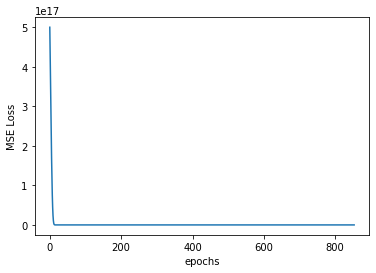

	Hessian at (1, 1, 1)
	 tensor([[ 0.1969,  0.0000,  0.0000],
        [ 0.0000, -0.0050,  0.0000],
        [ 0.0000,  0.0000, -0.0764]], grad_fn=<CopySlices>)
	Bootstrap attempt # 2
		Initiation #1
		Epoch 5000, current loss 2.59, current formula \left(1.06e+02x_1^{-0.0476}-1.24x_2^{0.00709}-86.3x_3^{-0.00527}-5.35\right)
		Epoch 10000, current loss 2.43, current formula \left(1.36e+02x_1^{-0.0351}-1.36x_2^{-0.00359}-1.17e+02x_3^{-0.00396}-5.43\right)
		Finished run #1, loss 2.42787504196167, best loss 2.42787504196167
		Initiation #2
		Finished run #2, loss 0.010515430942177773, best loss 0.010515430942177773
		Initiation #3
		Finished run #3, loss 0.01070550549775362, best loss 0.010515430942177773
		Initiation #4
		Epoch 5000, current loss 2.7, current formula \left(92.0x_1^{-0.0565}-2.29x_2^{0.00878}-74.4x_3^{-0.00612}-2.35\right)
		Epoch 10000, current loss 2.45, current formula \left(1.3e+02x_1^{-0.0369}-2.37x_2^{-0.00182}-1.13e+02x_3^{-0.00411}-2.44\right)
		Finished run #4, loss

<IPython.core.display.Math object>

<IPython.core.display.Math object>

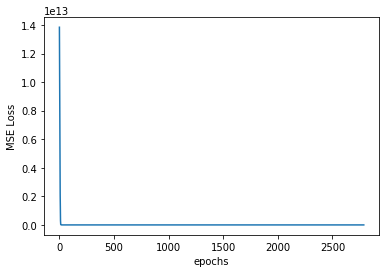

	Hessian at (1, 1, 1)
	 tensor([[ 0.1420,  0.0000,  0.0000],
        [ 0.0000, -0.0909,  0.0000],
        [ 0.0000,  0.0000, -0.2777]], grad_fn=<CopySlices>)
	Bootstrap attempt # 3
		Initiation #1
		Epoch 5000, current loss 2.58, current formula \left(1.06e+02x_1^{-0.0473}-4.55x_2^{-0.000234}-61.7x_3^{-0.00753}-27.4\right)
		Epoch 10000, current loss 2.48, current formula \left(1.24e+02x_1^{-0.039}-4.58x_2^{-0.000833}-80.1x_3^{-0.00586}-27.4\right)
		Finished run #1, loss 2.4772348403930664, best loss 2.4772348403930664
		Initiation #2
		Finished run #2, loss 0.01928936503827572, best loss 0.01928936503827572
		Initiation #3
		Epoch 5000, current loss 2.62, current formula \left(1.01e+02x_1^{-0.0503}-3.43x_2^{0.00192}-66.8x_3^{-0.00691}-18.1\right)
		Epoch 10000, current loss 2.43, current formula \left(1.35e+02x_1^{-0.0355}-3.51x_2^{-0.00156}-1.01e+02x_3^{-0.00463}-18.1\right)
		Finished run #3, loss 2.433150053024292, best loss 0.01928936503827572
		Initiation #4
		Finished run #4, l

<IPython.core.display.Math object>

<IPython.core.display.Math object>

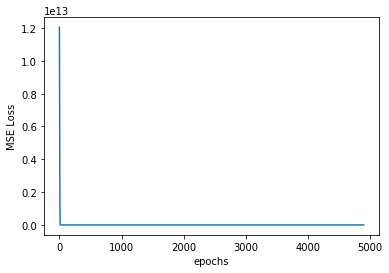

	Hessian at (1, 1, 1)
	 tensor([[ 0.2092,  0.0000,  0.0000],
        [ 0.0000, -0.9278,  0.0000],
        [ 0.0000,  0.0000, -0.9906]], grad_fn=<CopySlices>)
	Bootstrap attempt # 4
		Initiation #1
		Finished run #1, loss 0.0211834404617548, best loss 0.0211834404617548
		Initiation #2
		Epoch 5000, current loss 2.66, current formula \left(96.4x_1^{-0.0533}-3.27x_2^{0.00415}-60.6x_3^{-0.00774}-19.7\right)
		Epoch 10000, current loss 2.44, current formula \left(1.34e+02x_1^{-0.0357}-3.38x_2^{-0.00172}-98.7x_3^{-0.00472}-19.9\right)
		Finished run #2, loss 2.4358603954315186, best loss 0.0211834404617548
		Initiation #3
		Finished run #3, loss 0.020417379215359688, best loss 0.020417379215359688
		Initiation #4
		Epoch 5000, current loss 2.62, current formula \left(1.02e+02x_1^{-0.05}-2.39x_2^{0.00325}-55.9x_3^{-0.00841}-30.6\right)
		Epoch 10000, current loss 2.46, current formula \left(1.28e+02x_1^{-0.0376}-2.45x_2^{-0.00146}-83.1x_3^{-0.00561}-30.7\right)
		Finished run #4, loss 2.4589

<IPython.core.display.Math object>

<IPython.core.display.Math object>

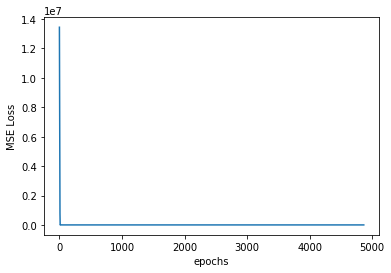

	Hessian at (1, 1, 1)
	 tensor([[ 0.2131,  0.0000,  0.0000],
        [ 0.0000, -0.0522,  0.0000],
        [ 0.0000,  0.0000, -1.0025]], grad_fn=<CopySlices>)
	Bootstrap attempt # 5
		Initiation #1
		Epoch 5000, current loss 0.0455, current formula \left(-0.478x_1^{0.526}-1.21x_2^{-0.511}-7.67x_3^{-0.158} + 4.47\right)
		Epoch 10000, current loss 0.0188, current formula \left(-0.688x_1^{0.479}-1.14x_2^{-0.514}-9.89x_3^{-0.0899} + 8.13\right)
		Finished run #1, loss 0.01879076473414898, best loss 0.01879076473414898
		Initiation #2
		Epoch 5000, current loss 0.0329, current formula \left(-0.554x_1^{0.507}-1.41x_2^{-0.615}-8.01x_3^{-0.139} + 5.3\right)
		Finished run #2, loss 0.018883803859353065, best loss 0.01879076473414898
		Initiation #3
		Epoch 5000, current loss 2.68, current formula \left(94.8x_1^{-0.0545}-3.22x_2^{0.00471}-67.2x_3^{-0.00694}-11.6\right)
		Epoch 10000, current loss 2.44, current formula \left(1.32e+02x_1^{-0.0363}-3.3x_2^{-0.00142}-1.05e+02x_3^{-0.00443}-11.7\righ

<IPython.core.display.Math object>

<IPython.core.display.Math object>

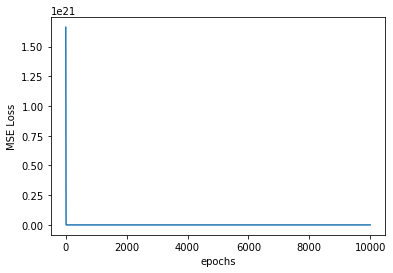

	Hessian at (1, 1, 1)
	 tensor([[ 0.1718,  0.0000,  0.0000],
        [ 0.0000, -0.8886,  0.0000],
        [ 0.0000,  0.0000, -0.9687]], grad_fn=<CopySlices>)
	Bootstrap attempt # 6
		Initiation #1
		Epoch 5000, current loss 2.67, current formula \left(95.7x_1^{-0.0537}-2.12x_2^{0.0054}-73.3x_3^{-0.0063}-7.5\right)
		Epoch 10000, current loss 2.44, current formula \left(1.33e+02x_1^{-0.0361}-2.25x_2^{-0.00231}-1.11e+02x_3^{-0.0042}-7.61\right)
		Finished run #1, loss 2.4409399032592773, best loss 2.4409399032592773
		Initiation #2
		Epoch 5000, current loss 2.67, current formula \left(95.4x_1^{-0.0541}-0.747x_2^{0.0187}-51.6x_3^{-0.00902}-30.3\right)
		Epoch 10000, current loss 2.54, current formula \left(1.13e+02x_1^{-0.0438}-0.766x_2^{-0.000875}-69.6x_3^{-0.00673}-30.3\right)
		Finished run #2, loss 2.5367722511291504, best loss 2.4409399032592773
		Initiation #3
		Epoch 5000, current loss 0.0236, current formula \left(-0.628x_1^{0.491}-1.27x_2^{-0.568}-8.84x_3^{-0.11} + 6.68\right)
	

<IPython.core.display.Math object>

<IPython.core.display.Math object>

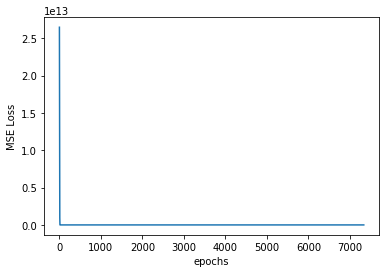

	Hessian at (1, 1, 1)
	 tensor([[ 0.1714,  0.0000,  0.0000],
        [ 0.0000, -0.9364,  0.0000],
        [ 0.0000,  0.0000, -0.9663]], grad_fn=<CopySlices>)
	Bootstrap attempt # 7
		Initiation #1
		Epoch 5000, current loss 0.082, current formula \left(-0.356x_1^{0.565} + 0.000135x_2^{0.999}-7.56x_3^{-0.181} + 3.3\right)
		Finished run #1, loss 0.03380105644464493, best loss 0.03380105644464493
		Initiation #2
		Epoch 5000, current loss 2.62, current formula \left(1.01e+02x_1^{-0.0505}-0.366x_2^{0.0326}-61.0x_3^{-0.00775}-26.9\right)
		Epoch 10000, current loss 2.45, current formula \left(1.31e+02x_1^{-0.0367}-0.63x_2^{-0.00498}-91.2x_3^{-0.00512}-27.0\right)
		Finished run #2, loss 2.447770357131958, best loss 0.03380105644464493
		Initiation #3
		Epoch 5000, current loss 0.023, current formula \left(-0.645x_1^{0.488} + 0.231x_2^{0.126}-9.16x_3^{-0.105} + 6.51\right)
		Finished run #3, loss 0.02077421545982361, best loss 0.02077421545982361
		Initiation #4
		Epoch 5000, current loss 2

<IPython.core.display.Math object>

<IPython.core.display.Math object>

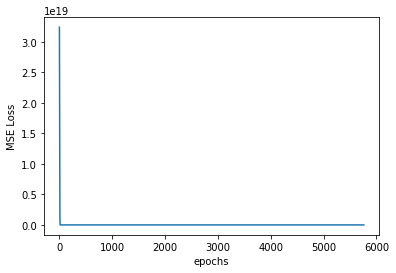

	Hessian at (1, 1, 1)
	 tensor([[ 0.1688,  0.0000,  0.0000],
        [ 0.0000, -0.0253,  0.0000],
        [ 0.0000,  0.0000, -1.0115]], grad_fn=<CopySlices>)
	Bootstrap attempt # 8
		Initiation #1
		Epoch 5000, current loss 2.59, current formula \left(1.04e+02x_1^{-0.0487}-1.78e+05x_2^{-10.1}-60.4x_3^{-0.00771}-30.6\right)
		Epoch 10000, current loss 2.46, current formula \left(1.27e+02x_1^{-0.0382}-4.04e+05x_2^{-10.9}-83.6x_3^{-0.00553}-30.7\right)
		Finished run #1, loss 2.4595401287078857, best loss 2.4595401287078857
		Initiation #2
		Epoch 5000, current loss 2.63, current formula \left(1e+02x_1^{-0.0507}-2.88x_2^{0.00322}-73.6x_3^{-0.00617}-11.2\right)
		Epoch 10000, current loss 2.43, current formula \left(1.35e+02x_1^{-0.0354}-2.97x_2^{-0.00178}-1.09e+02x_3^{-0.00429}-11.3\right)
		Finished run #2, loss 2.4325149059295654, best loss 2.4325149059295654
		Initiation #3
		Finished run #3, loss 0.021408487111330032, best loss 0.021408487111330032
		Initiation #4
		Epoch 5000, curren

<IPython.core.display.Math object>

<IPython.core.display.Math object>

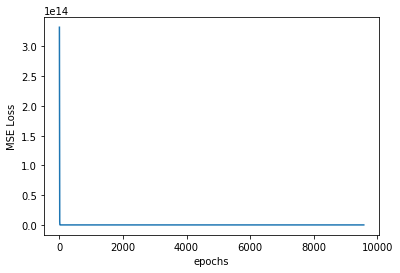

	Hessian at (1, 1, 1)
	 tensor([[ 0.1675,  0.0000,  0.0000],
        [ 0.0000, -0.9274,  0.0000],
        [ 0.0000,  0.0000, -0.9849]], grad_fn=<CopySlices>)
	Bootstrap attempt # 9
		Initiation #1
		Finished run #1, loss 0.022927040234208107, best loss 0.022927040234208107
		Initiation #2
		Epoch 5000, current loss 4.37, current formula \left(-0.0175x_1^{1.0} + 0.00426x_2^{0.798}-1.24e-07x_3^{2.26}-0.583\right)
		Epoch 10000, current loss 4.37, current formula \left(-0.0175x_1^{1.0} + 0.00426x_2^{0.798}-1.24e-07x_3^{2.26}-0.583\right)
		Finished run #2, loss 4.3749847412109375, best loss 0.022927040234208107
		Initiation #3
		Epoch 5000, current loss 0.0257, current formula \left(-0.605x_1^{0.496}-1.31x_2^{-0.58}-8.65x_3^{-0.115} + 6.35\right)
		Finished run #3, loss 0.022301314398646355, best loss 0.022301314398646355
		Initiation #4
		Finished run #4, loss 0.019282067194581032, best loss 0.019282067194581032
		Initiation #5
		Finished run #5, loss 0.007446614094078541, best loss 0.00

<IPython.core.display.Math object>

<IPython.core.display.Math object>

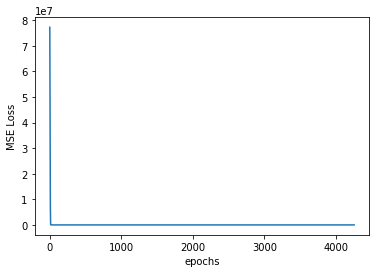

	Hessian at (1, 1, 1)
	 tensor([[ 0.2347,  0.0000,  0.0000],
        [ 0.0000, -0.0528,  0.0000],
        [ 0.0000,  0.0000, -0.2639]], grad_fn=<CopySlices>)
	Bootstrap attempt # 10
		Initiation #1
		Epoch 5000, current loss 2.63, current formula \left(1e+02x_1^{-0.0507}-4.38x_2^{0.00111}-78.4x_3^{-0.00586}-4.93\right)
		Epoch 10000, current loss 2.45, current formula \left(1.32e+02x_1^{-0.0365}-4.45x_2^{-0.00105}-1.1e+02x_3^{-0.00421}-5.0\right)
		Finished run #1, loss 2.445279836654663, best loss 2.445279836654663
		Initiation #2
		Epoch 5000, current loss 2.71, current formula \left(92.4x_1^{-0.0564}-2.73x_2^{0.00812} + 0.00125x_3^{1.02}-74.7\right)
		Epoch 10000, current loss 2.52, current formula \left(1.18e+02x_1^{-0.0418}-2.76x_2^{0.00226} + 0.00678x_3^{0.786}-1e+02\right)
		Finished run #2, loss 2.515899658203125, best loss 2.445279836654663
		Initiation #3
		Epoch 5000, current loss 2.6, current formula \left(1.03e+02x_1^{-0.0488}-2.9x_2^{0.00273}-81.4x_3^{-0.00566}-6.42\right

<IPython.core.display.Math object>

<IPython.core.display.Math object>

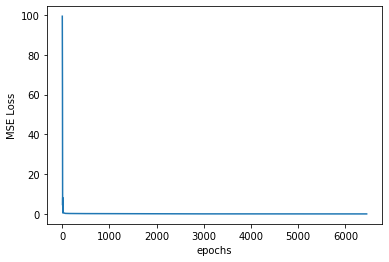

	Hessian at (1, 1, 1)
	 tensor([[ 0.1649,  0.0000,  0.0000],
        [ 0.0000, -1.0346,  0.0000],
        [ 0.0000,  0.0000, -1.0448]], grad_fn=<CopySlices>)
	Bootstrap attempt # 11
		Initiation #1
		Epoch 5000, current loss 2.59, current formula \left(1.05e+02x_1^{-0.0481}-0.00151x_2^{0.508} + 0.015x_3^{0.679}-90.4\right)
		Epoch 10000, current loss 2.43, current formula \left(1.36e+02x_1^{-0.0352}-0.00064x_2^{0.519} + 0.0249x_3^{0.613}-1.22e+02\right)
		Finished run #1, loss 2.4295198917388916, best loss 2.4295198917388916
		Initiation #2
		Epoch 5000, current loss 2.72, current formula \left(90.2x_1^{-0.0582}-14.7x_2^{0.000839}-48.9x_3^{-0.0096}-13.6\right)
		Epoch 10000, current loss 2.54, current formula \left(1.13e+02x_1^{-0.0438}-14.7x_2^{-8.88e-05}-72.2x_3^{-0.00638}-13.6\right)
		Finished run #2, loss 2.537104368209839, best loss 2.4295198917388916
		Initiation #3
		Finished run #3, loss 0.009241259656846523, best loss 0.009241259656846523
		Initiation #4
		Epoch 5000, current

<IPython.core.display.Math object>

<IPython.core.display.Math object>

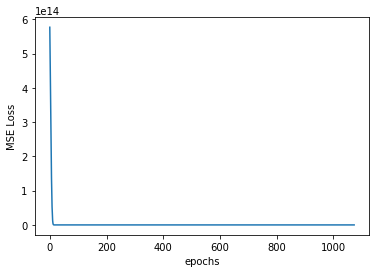

	Hessian at (1, 1, 1)
	 tensor([[ 0.2545,  0.0000,  0.0000],
        [ 0.0000, -0.0556,  0.0000],
        [ 0.0000,  0.0000, -0.1063]], grad_fn=<CopySlices>)
	Bootstrap attempt # 12
		Initiation #1
		Epoch 5000, current loss 0.0718, current formula \left(-0.378x_1^{0.557}-1.5x_2^{-0.622}-7.61x_3^{-0.182} + 3.51\right)
		Finished run #1, loss 0.02414586953818798, best loss 0.02414586953818798
		Initiation #2
		Finished run #2, loss 0.004239535890519619, best loss 0.004239535890519619
		Initiation #3
		Epoch 5000, current loss 2.65, current formula \left(97.9x_1^{-0.0525}-0.296x_2^{0.0449}-51.8x_3^{-0.0091}-32.9\right)
		Epoch 10000, current loss 2.49, current formula \left(1.22e+02x_1^{-0.0397}-0.32x_2^{0.00174}-76.8x_3^{-0.00609}-33.0\right)
		Finished run #3, loss 2.486238479614258, best loss 0.004239535890519619
		Initiation #4
		Epoch 5000, current loss 2.67, current formula \left(95.5x_1^{-0.054}-12.3x_2^{0.000523}-51.3x_3^{-0.00928}-19.2\right)
		Epoch 10000, current loss 2.48, cu

<IPython.core.display.Math object>

<IPython.core.display.Math object>

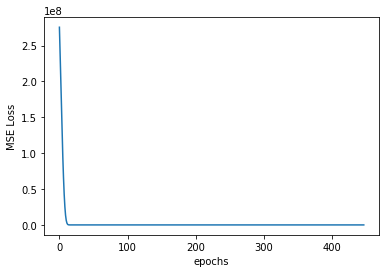

	Hessian at (1, 1, 1)
	 tensor([[ 0.2325,  0.0000,  0.0000],
        [ 0.0000, -0.4232,  0.0000],
        [ 0.0000,  0.0000, -0.0881]], grad_fn=<CopySlices>)
	Bootstrap attempt # 13
		Initiation #1
		Epoch 5000, current loss 0.0247, current formula \left(-0.622x_1^{0.492}-1.29x_2^{-0.572}-8.66x_3^{-0.116} + 6.42\right)
		Finished run #1, loss 0.0199130866676569, best loss 0.0199130866676569
		Initiation #2
		Finished run #2, loss 0.021627800539135933, best loss 0.0199130866676569
		Initiation #3
		Finished run #3, loss 0.020416883751749992, best loss 0.0199130866676569
		Initiation #4
		Epoch 5000, current loss 2.71, current formula \left(91.7x_1^{-0.0566}-0.199x_2^{0.0734}-51.3x_3^{-0.00908}-27.4\right)
		Epoch 10000, current loss 2.58, current formula \left(1.06e+02x_1^{-0.0472}-0.201x_2^{0.0449}-66.1x_3^{-0.00706}-27.4\right)
		Finished run #4, loss 2.5804550647735596, best loss 0.0199130866676569
		Initiation #5
		Epoch 5000, current loss 2.71, current formula \left(91.2x_1^{-0.057

<IPython.core.display.Math object>

<IPython.core.display.Math object>

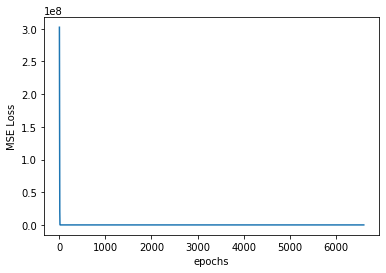

	Hessian at (1, 1, 1)
	 tensor([[ 0.1671,  0.0000,  0.0000],
        [ 0.0000, -0.9745,  0.0000],
        [ 0.0000,  0.0000, -0.9919]], grad_fn=<CopySlices>)
	Bootstrap attempt # 14
		Initiation #1
		Epoch 5000, current loss 2.65, current formula \left(97.9x_1^{-0.0524}-9.42x_2^{0.000753}-48.7x_3^{-0.0097}-27.0\right)
		Epoch 10000, current loss 2.46, current formula \left(1.29e+02x_1^{-0.0374}-9.5x_2^{-0.000535}-80.0x_3^{-0.00586}-27.1\right)
		Finished run #1, loss 2.457430124282837, best loss 2.457430124282837
		Initiation #2
		Epoch 5000, current loss 0.0403, current formula \left(-0.501x_1^{0.52}-1.47x_2^{-0.63}-7.88x_3^{-0.146} + 4.85\right)
		Finished run #2, loss 0.02526986412703991, best loss 0.02526986412703991
		Initiation #3
		Epoch 5000, current loss 2.68, current formula \left(94.3x_1^{-0.0549}-0.000154x_2^{0.834}-52.1x_3^{-0.00895}-29.3\right)
		Epoch 10000, current loss 2.45, current formula \left(1.3e+02x_1^{-0.037}-7.99e-05x_2^{0.845}-88.4x_3^{-0.00519}-29.4\right)
		

<IPython.core.display.Math object>

<IPython.core.display.Math object>

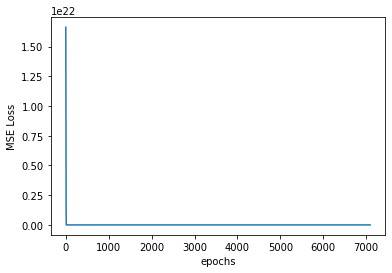

	Hessian at (1, 1, 1)
	 tensor([[ 0.1536,  0.0000,  0.0000],
        [ 0.0000, -1.1789,  0.0000],
        [ 0.0000,  0.0000, -1.1275]], grad_fn=<CopySlices>)
	Bootstrap attempt # 15
		Initiation #1
		Epoch 5000, current loss 0.00653, current formula \left(-0.639x_1^{0.489} + 0.574x_2^{0.0623} + 0.0963x_3^{0.468}-0.44\right)
		Finished run #1, loss 0.004914070013910532, best loss 0.004914070013910532
		Initiation #2
		Epoch 5000, current loss 2.73, current formula \left(89.5x_1^{-0.0586}-3.42x_2^{0.00649}-50.1x_3^{-0.00929}-23.0\right)
		Epoch 10000, current loss 2.53, current formula \left(1.15e+02x_1^{-0.043}-3.44x_2^{-0.00105}-75.8x_3^{-0.00615}-23.0\right)
		Finished run #2, loss 2.5272202491760254, best loss 0.004914070013910532
		Initiation #3
		Epoch 5000, current loss 0.0531, current formula \left(-1.46x_1^{0.386}-1.16x_2^{-0.548}-13.3x_3^{-0.0559} + 14.2\right)
		Finished run #3, loss 0.019861986860632896, best loss 0.004914070013910532
		Initiation #4
		Finished run #4, loss 0

<IPython.core.display.Math object>

<IPython.core.display.Math object>

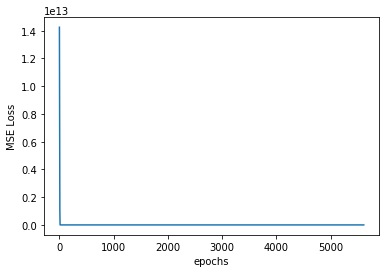

	Hessian at (1, 1, 1)
	 tensor([[ 0.1647,  0.0000,  0.0000],
        [ 0.0000, -0.0335,  0.0000],
        [ 0.0000,  0.0000, -0.0290]], grad_fn=<CopySlices>)
	Bootstrap attempt # 16
		Initiation #1
		Epoch 5000, current loss 0.0294, current formula \left(-0.559x_1^{0.506}-1.19x_2^{-0.519}-8.75x_3^{-0.116} + 6.21\right)
		Finished run #1, loss 0.02645058184862137, best loss 0.02645058184862137
		Initiation #2
		Finished run #2, loss 0.021878672763705254, best loss 0.021878672763705254
		Initiation #3
		Epoch 5000, current loss 2.66, current formula \left(97.4x_1^{-0.0527}-0.554x_2^{0.0322} + 0.00536x_3^{0.817}-82.1\right)
		Epoch 10000, current loss 2.48, current formula \left(1.24e+02x_1^{-0.039}-0.575x_2^{0.00929} + 0.0124x_3^{0.705}-1.1e+02\right)
		Finished run #3, loss 2.479518175125122, best loss 0.021878672763705254
		Initiation #4
		Epoch 5000, current loss 2.62, current formula \left(99.5x_1^{-0.0509}-1.89e+05x_2^{-10.2}-56.9x_3^{-0.00824}-30.1\right)
		Epoch 10000, current los

<IPython.core.display.Math object>

<IPython.core.display.Math object>

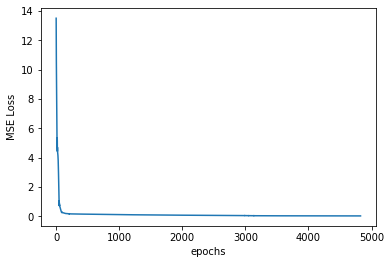

	Hessian at (1, 1, 1)
	 tensor([[ 0.2259,  0.0000,  0.0000],
        [ 0.0000, -0.0178,  0.0000],
        [ 0.0000,  0.0000, -0.9799]], grad_fn=<CopySlices>)
	Bootstrap attempt # 17
		Initiation #1
		Epoch 5000, current loss 0.0609, current formula \left(-0.375x_1^{0.558}-1.56x_2^{-0.672}-9.9x_3^{-0.0939} + 6.58\right)
		Finished run #1, loss 0.023147422820329666, best loss 0.023147422820329666
		Initiation #2
		Finished run #2, loss 0.039222680032253265, best loss 0.023147422820329666
		Initiation #3
		Epoch 5000, current loss 0.0238, current formula \left(-0.631x_1^{0.49}-1.27x_2^{-0.569}-8.76x_3^{-0.113} + 6.58\right)
		Finished run #3, loss 0.019292347133159637, best loss 0.019292347133159637
		Initiation #4
		Epoch 5000, current loss 2.73, current formula \left(89.7x_1^{-0.0585}-0.268x_2^{0.0636}-45.2x_3^{-0.0104}-31.3\right)
		Epoch 10000, current loss 2.59, current formula \left(1.05e+02x_1^{-0.0479}-0.271x_2^{0.0349}-60.9x_3^{-0.00766}-31.3\right)
		Finished run #4, loss 2.5893

<IPython.core.display.Math object>

<IPython.core.display.Math object>

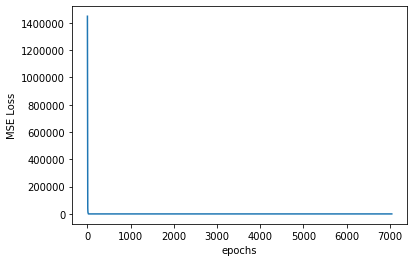

	Hessian at (1, 1, 1)
	 tensor([[ 0.1692,  0.0000,  0.0000],
        [ 0.0000, -0.9507,  0.0000],
        [ 0.0000,  0.0000, -0.9762]], grad_fn=<CopySlices>)
	Bootstrap attempt # 18
		Initiation #1
		Finished run #1, loss 0.0061263153329491615, best loss 0.0061263153329491615
		Initiation #2
		Epoch 5000, current loss 2.71, current formula \left(91.4x_1^{-0.0571}-6.09x_2^{0.00287}-47.3x_3^{-0.00998}-25.1\right)
		Epoch 10000, current loss 2.58, current formula \left(1.07e+02x_1^{-0.0471}-6.1x_2^{0.000306}-62.8x_3^{-0.00743}-25.1\right)
		Finished run #2, loss 2.5788300037384033, best loss 0.0061263153329491615
		Initiation #3
		Epoch 5000, current loss 2.69, current formula \left(93.6x_1^{-0.0554}-3.64x_2^{0.00461} + 0.0364x_3^{0.56}-75.5\right)
		Epoch 10000, current loss 2.43, current formula \left(1.35e+02x_1^{-0.0354}-4.1x_2^{-0.00127} + 0.0436x_3^{0.539}-1.17e+02\right)
		Finished run #3, loss 2.4305803775787354, best loss 0.0061263153329491615
		Initiation #4
		Epoch 5000, curren

<IPython.core.display.Math object>

<IPython.core.display.Math object>

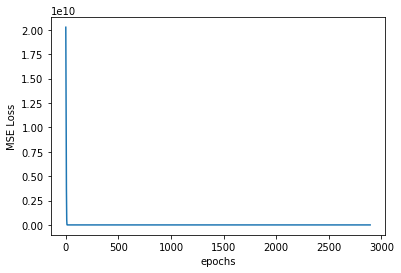

	Hessian at (1, 1, 1)
	 tensor([[ 0.2238,  0.0000,  0.0000],
        [ 0.0000, -0.4569,  0.0000],
        [ 0.0000,  0.0000, -0.0229]], grad_fn=<CopySlices>)
	Bootstrap attempt # 19
		Initiation #1
		Epoch 5000, current loss 0.0555, current formula \left(-0.431x_1^{0.54}-1.52x_2^{-0.645}-7.61x_3^{-0.165} + 4.08\right)
		Epoch 10000, current loss 0.0196, current formula \left(-0.676x_1^{0.482}-1.18x_2^{-0.53}-9.66x_3^{-0.0937} + 7.81\right)
		Finished run #1, loss 0.019596250727772713, best loss 0.019596250727772713
		Initiation #2
		Epoch 5000, current loss 0.0259, current formula \left(-1.04x_1^{0.428}-1.12x_2^{-0.525}-9.99x_3^{-0.0865} + 9.47\right)
		Finished run #2, loss 0.02483510598540306, best loss 0.019596250727772713
		Initiation #3
		Epoch 5000, current loss 0.0486, current formula \left(-0.46x_1^{0.531} + 0.00426x_2^{0.553}-8.1x_3^{-0.144} + 4.64\right)
		Epoch 10000, current loss 0.0196, current formula \left(-0.689x_1^{0.479} + 0.0519x_2^{0.256}-10.1x_3^{-0.0873} + 8.03\ri

<IPython.core.display.Math object>

<IPython.core.display.Math object>

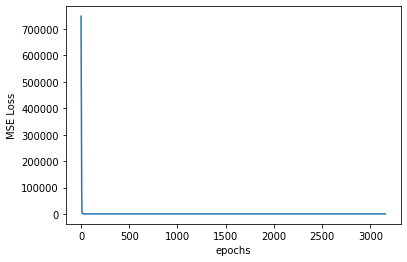

	Hessian at (1, 1, 1)
	 tensor([[ 0.2530,  0.0000,  0.0000],
        [ 0.0000, -0.0627,  0.0000],
        [ 0.0000,  0.0000, -0.2261]], grad_fn=<CopySlices>)
plotting diagrams for coefficients
	plotting lambda_0


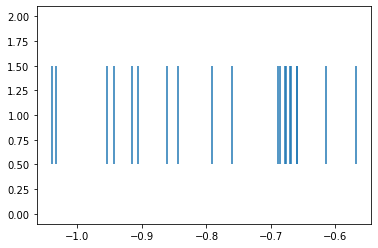

	plotting power_0


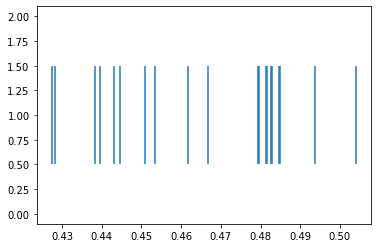

	plotting lambda_1


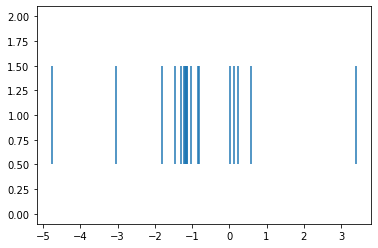

	plotting power_1


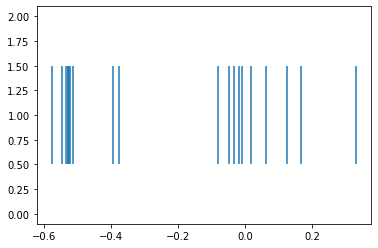

	plotting lambda_2


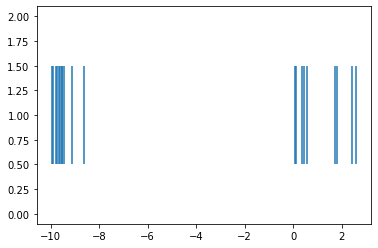

	plotting power_2


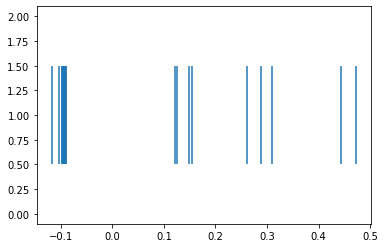

	plotting last_subformula.lambda_0


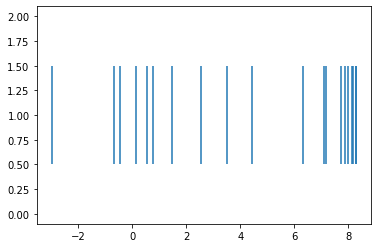


---------------------------------------------------------------------------------------------

Example 10
[-37.0, 9.0, 37.0] [39, 35, 45] [-0.9487179517745972, 0.2571428716182709, 0.8222222328186035]
[20.0, 21.0, -16.0] [23, 22, 10] [0.8695651888847351, 0.9545454382896423, -1.600000023841858]

	Bootstrap attempt # 0
		Initiation #1
		Epoch 5000, current loss 0.756, current formula \left(-1.06x_1^{0.854} + 0.201x_2^{0.989} + 1.71x_3^{-0.0277} + 3.5\right)
		Epoch 10000, current loss 0.0309, current formula \left(-0.969x_1^{0.867} + 0.244x_2^{0.962} + 0.634x_3^{-0.955} + 0.997\right)
		Finished run #1, loss 0.03086867928504944, best loss 0.03086867928504944
		Initiation #2
		Epoch 5000, current loss 8.43e+02, current formula \left(-0.228x_1^{1.07}-7.81e+02x_2^{-0.0901}-6.7e-06x_3^{1.87} + 5.28e+02\right)
		Epoch 10000, current loss 8.43e+02, current formula \left(-0.23x_1^{1.07}-7.81e+02x_2^{-0.0901}-5.7e-06x_3^{1.87} + 5.28e+02\right)
		Finished run #2, loss 842.5902099609375, best los

<IPython.core.display.Math object>

<IPython.core.display.Math object>

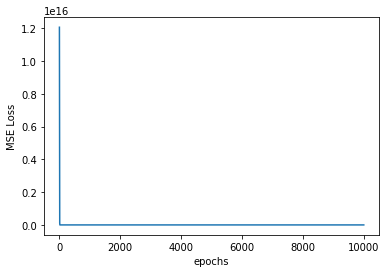

	Hessian at (1, 1, 1)
	 tensor([[ 0.1121,  0.0000,  0.0000],
        [ 0.0000, -0.0089,  0.0000],
        [ 0.0000,  0.0000,  1.1835]], grad_fn=<CopySlices>)
	Bootstrap attempt # 1
		Initiation #1
		Epoch 5000, current loss 3.75e+03, current formula \left(2.65e+03x_1^{-0.0426}-2.38e+03x_2^{-0.0217}-2.48x_3^{0.332}-58.0\right)
		Epoch 10000, current loss 3.65e+03, current formula \left(3.29e+03x_1^{-0.0324}-3.04e+03x_2^{-0.0166}-2.48x_3^{0.331}-58.0\right)
		Finished run #1, loss 3653.046142578125, best loss 3653.046142578125
		Initiation #2
		Epoch 5000, current loss 7.67e+02, current formula \left(-1.13x_1^{0.844}-1e+03x_2^{-0.0627} + 1.58e+02x_3^{-0.00538} + 6.4e+02\right)
		Epoch 10000, current loss 7.33e+02, current formula \left(-0.894x_1^{0.877}-1.23e+03x_2^{-0.0486} + 3.78e+02x_3^{-0.0018} + 6.4e+02\right)
		Finished run #2, loss 733.1285400390625, best loss 733.1285400390625
		Initiation #3
		Epoch 5000, current loss 3.91e+03, current formula \left(2.03e+03x_1^{-0.0579}-2.18e+0

<IPython.core.display.Math object>

<IPython.core.display.Math object>

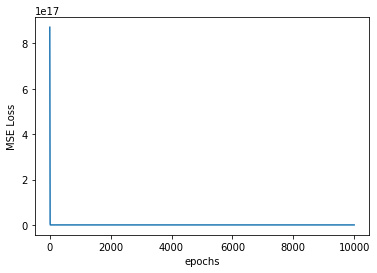

	Hessian at (1, 1, 1)
	 tensor([[ 1.3437e-01,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -2.6878e-04,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  3.8280e+00]], grad_fn=<CopySlices>)
	Bootstrap attempt # 2
		Initiation #1
		Epoch 5000, current loss 2.65, current formula \left(-1.15x_1^{0.842} + 0.393x_2^{0.895}-0.0655x_3^{0.00185} + 0.127\right)
		Epoch 10000, current loss 0.0666, current formula \left(-0.979x_1^{0.865} + 0.275x_2^{0.945}-0.0287x_3^{0.0885} + 0.0909\right)
		Finished run #1, loss 0.06664539873600006, best loss 0.06664539873600006
		Initiation #2
		Epoch 5000, current loss 7.49e+02, current formula \left(-1.04x_1^{0.856}-1.11e+03x_2^{-0.0544} + 2.88e+02x_3^{-0.00267} + 6.21e+02\right)
		Epoch 10000, current loss 7.17e+02, current formula \left(-0.818x_1^{0.889}-1.41e+03x_2^{-0.0411} + 5.8e+02x_3^{-0.00115} + 6.21e+02\right)
		Finished run #2, loss 717.077392578125, best loss 0.06664539873600006
		Initiation #3
		Epoch 5000, current loss 7.58e+02, current form

<IPython.core.display.Math object>

<IPython.core.display.Math object>

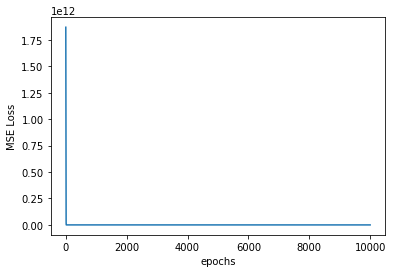

	Hessian at (1, 1, 1)
	 tensor([[ 0.1141,  0.0000,  0.0000],
        [ 0.0000, -0.0143,  0.0000],
        [ 0.0000,  0.0000,  0.0023]], grad_fn=<CopySlices>)
	Bootstrap attempt # 3
		Initiation #1
		Epoch 5000, current loss 7.48e+02, current formula \left(-1.02x_1^{0.858}-1.11e+03x_2^{-0.0548} + 3.28e+02x_3^{-0.00195} + 5.78e+02\right)
		Epoch 10000, current loss 7.15e+02, current formula \left(-0.81x_1^{0.891}-1.44e+03x_2^{-0.0399} + 6.58e+02x_3^{-0.000982} + 5.78e+02\right)
		Finished run #1, loss 714.6547241210938, best loss 714.6547241210938
		Initiation #2
		Epoch 5000, current loss 7.65e+02, current formula \left(-1.08x_1^{0.85}-1.01e+03x_2^{-0.0625} + 2.44e+02x_3^{-0.00307} + 5.57e+02\right)
		Epoch 10000, current loss 7.34e+02, current formula \left(-0.904x_1^{0.875}-1.22e+03x_2^{-0.049} + 4.52e+02x_3^{-0.00151} + 5.58e+02\right)
		Finished run #2, loss 734.049072265625, best loss 714.6547241210938
		Initiation #3
		Epoch 5000, current loss 23.3, current formula \left(-0.534x_1

<IPython.core.display.Math object>

<IPython.core.display.Math object>

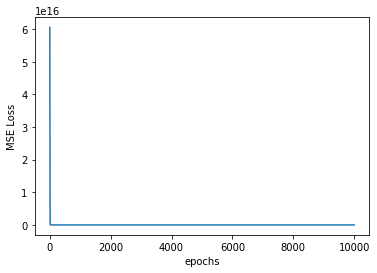

	Hessian at (1, 1, 1)
	 tensor([[ 0.0887,  0.0000,  0.0000],
        [ 0.0000, -0.0032,  0.0000],
        [ 0.0000,  0.0000, -0.0124]], grad_fn=<CopySlices>)
	Bootstrap attempt # 4
		Initiation #1
		Epoch 5000, current loss 3.58, current formula \left(-0.741x_1^{0.904} + 0.436x_2^{0.88}-2.05x_3^{-0.712}-10.9\right)
		Epoch 10000, current loss 0.236, current formula \left(-0.89x_1^{0.878} + 0.295x_2^{0.935}-0.644x_3^{-0.842}-2.78\right)
		Finished run #1, loss 0.23638296127319336, best loss 0.23638296127319336
		Initiation #2
		Epoch 5000, current loss 8e+02, current formula \left(-0.256x_1^{1.05}-9.18e+02x_2^{-0.0724}-0.000907x_3^{1.17} + 6.71e+02\right)
		Epoch 10000, current loss 7.31e+02, current formula \left(-0.482x_1^{0.963}-1.26e+03x_2^{-0.0481}-0.001x_3^{1.17} + 1.03e+03\right)
		Finished run #2, loss 731.1895141601562, best loss 0.23638296127319336
		Initiation #3
		Epoch 5000, current loss 3.14e+03, current formula \left(2.31e+03x_1^{-0.0496} + 0.795x_2^{0.793}-0.641x_3^{0.47

<IPython.core.display.Math object>

<IPython.core.display.Math object>

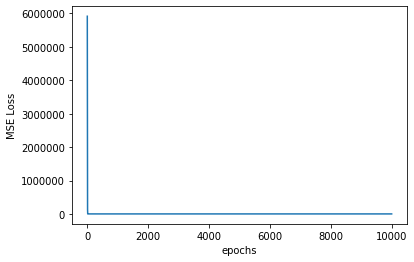

	Hessian at (1, 1, 1)
	 tensor([[ 0.0951,  0.0000,  0.0000],
        [ 0.0000, -0.0178,  0.0000],
        [ 0.0000,  0.0000, -0.9988]], grad_fn=<CopySlices>)
	Bootstrap attempt # 5
		Initiation #1
		Epoch 5000, current loss 1.03, current formula \left(-1.08x_1^{0.851} + 0.192x_2^{0.996} + 1.38x_3^{-0.737} + 5.72\right)
		Epoch 10000, current loss 0.0401, current formula \left(-0.973x_1^{0.866} + 0.242x_2^{0.963} + 0.671x_3^{-0.946} + 1.14\right)
		Finished run #1, loss 0.040101971477270126, best loss 0.040101971477270126
		Initiation #2
		Epoch 5000, current loss 3.85e+03, current formula \left(2.26e+03x_1^{-0.0505}-1.8e+03x_2^{-0.0296}-9.23x_3^{0.201}-2.48e+02\right)
		Epoch 10000, current loss 3.74e+03, current formula \left(2.71e+03x_1^{-0.0405}-2.26e+03x_2^{-0.023}-9.22x_3^{0.195}-2.48e+02\right)
		Finished run #2, loss 3740.0546875, best loss 0.040101971477270126
		Initiation #3
		Epoch 5000, current loss 3.75e+03, current formula \left(2.72e+03x_1^{-0.0412}-2.43e+03x_2^{-0.0213}-

<IPython.core.display.Math object>

<IPython.core.display.Math object>

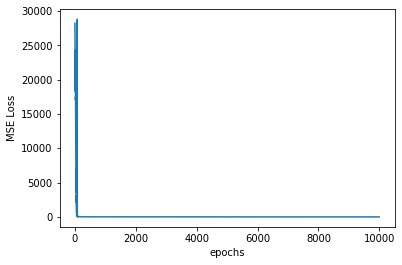

	Hessian at (1, 1, 1)
	 tensor([[ 0.1128,  0.0000,  0.0000],
        [ 0.0000, -0.0087,  0.0000],
        [ 0.0000,  0.0000,  1.2337]], grad_fn=<CopySlices>)
	Bootstrap attempt # 6
		Initiation #1
		Epoch 5000, current loss 3.18e+03, current formula \left(2.2e+03x_1^{-0.0531} + 0.0138x_2^{1.37}-5.89x_3^{0.23}-1.77e+03\right)
		Epoch 10000, current loss 3.05e+03, current formula \left(2.69e+03x_1^{-0.0415} + 0.0315x_2^{1.25}-5.89x_3^{0.221}-2.27e+03\right)
		Finished run #1, loss 3053.099365234375, best loss 3053.099365234375
		Initiation #2
		Epoch 5000, current loss 1.28e+04, current formula \left(3.79x_1^{-13.4}-9.51e+02x_2^{-0.0594}-5.69x_3^{0.267} + 5.91e+02\right)
		Epoch 10000, current loss 1.28e+04, current formula \left(3.78x_1^{-13.3}-1.21e+03x_2^{-0.0435}-5.67x_3^{0.268} + 8.61e+02\right)
		Finished run #2, loss 12799.509765625, best loss 3053.099365234375
		Initiation #3
		Epoch 5000, current loss 3.82e+03, current formula \left(2.35e+03x_1^{-0.0483}-1.83e+03x_2^{-0.0289}-13

<IPython.core.display.Math object>

<IPython.core.display.Math object>

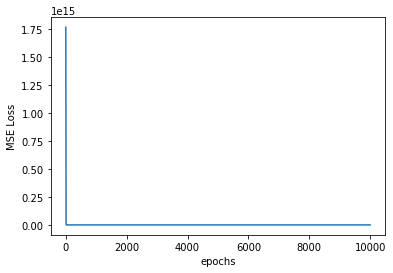

	Hessian at (1, 1, 1)
	 tensor([[ 9.8719e-02,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -7.2483e-03,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  1.2868e+01]], grad_fn=<CopySlices>)
	Bootstrap attempt # 7
		Initiation #1
		Epoch 5000, current loss 7.5e+02, current formula \left(-0.47x_1^{0.967}-1.08e+03x_2^{-0.0571} + 1.88e+02x_3^{-0.00413} + 6.7e+02\right)
		Epoch 10000, current loss 7.25e+02, current formula \left(-0.498x_1^{0.959}-1.31e+03x_2^{-0.0445} + 4.25e+02x_3^{-0.00152} + 6.7e+02\right)
		Finished run #1, loss 725.2667846679688, best loss 725.2667846679688
		Initiation #2
		Epoch 5000, current loss 7.47e+02, current formula \left(-1.03x_1^{0.858}-1.13e+03x_2^{-0.0541} + 3.33e+02x_3^{-0.00207} + 5.87e+02\right)
		Epoch 10000, current loss 7.14e+02, current formula \left(-0.802x_1^{0.892}-1.45e+03x_2^{-0.0396} + 6.56e+02x_3^{-0.00098} + 5.87e+02\right)
		Finished run #2, loss 714.1499633789062, best loss 714.1499633789062
		Initiation #3
		Epoch 5000, current loss 7

<IPython.core.display.Math object>

<IPython.core.display.Math object>

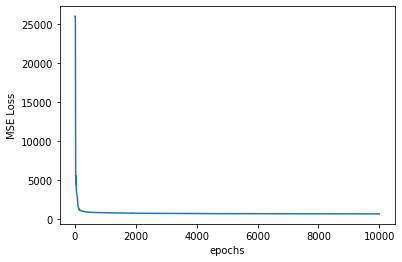

	Hessian at (1, 1, 1)
	 tensor([[  0.0773,   0.0000,   0.0000],
        [  0.0000, -59.7199,   0.0000],
        [  0.0000,   0.0000,   0.6445]], grad_fn=<CopySlices>)
	Bootstrap attempt # 8
		Initiation #1
		Epoch 5000, current loss 3.83e+03, current formula \left(2.33e+03x_1^{-0.0487}-1.85e+03x_2^{-0.0286}-12.3x_3^{0.172}-2.58e+02\right)
		Epoch 10000, current loss 3.74e+03, current formula \left(2.69e+03x_1^{-0.0409}-2.22e+03x_2^{-0.0233}-12.3x_3^{0.169}-2.58e+02\right)
		Finished run #1, loss 3744.411865234375, best loss 3744.411865234375
		Initiation #2
		Epoch 5000, current loss 2.81, current formula \left(-0.769x_1^{0.899} + 0.166x_2^{1.02} + 1.36x_3^{0.0586}-2.53\right)
		Epoch 10000, current loss 0.0786, current formula \left(-0.918x_1^{0.874} + 0.238x_2^{0.965} + 1.48x_3^{0.00543}-1.53\right)
		Finished run #2, loss 0.07863160967826843, best loss 0.07863160967826843
		Initiation #3
		Epoch 5000, current loss 3.89e+03, current formula \left(2.14e+03x_1^{-0.054}-2.15e+03x_2^{-0.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

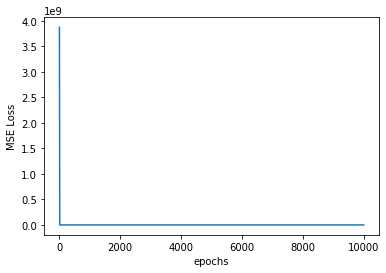

	Hessian at (1, 1, 1)
	 tensor([[ 0.1120,  0.0000,  0.0000],
        [ 0.0000, -0.0136,  0.0000],
        [ 0.0000,  0.0000, -1.7558]], grad_fn=<CopySlices>)
	Bootstrap attempt # 9
		Initiation #1
		Epoch 5000, current loss 7.6e+02, current formula \left(-1.1x_1^{0.848}-1.05e+03x_2^{-0.0594} + 2.06e+02x_3^{-0.00394} + 6.35e+02\right)
		Epoch 10000, current loss 7.31e+02, current formula \left(-0.873x_1^{0.88}-1.25e+03x_2^{-0.0476} + 4.05e+02x_3^{-0.00167} + 6.35e+02\right)
		Finished run #1, loss 730.654296875, best loss 730.654296875
		Initiation #2
		Epoch 5000, current loss 2.2, current formula \left(-1.13x_1^{0.846} + 0.383x_2^{0.899} + 6.1x_3^{0.0111}-6.72\right)
		Epoch 10000, current loss 0.0733, current formula \left(-0.976x_1^{0.866} + 0.278x_2^{0.943} + 6.26x_3^{0.00152}-6.48\right)
		Finished run #2, loss 0.07325850427150726, best loss 0.07325850427150726
		Initiation #3
		Epoch 5000, current loss 8.55e+02, current formula \left(-0.00467x_1^{1.63} + 4.5e-05x_2^{2.19} + 0.000

<IPython.core.display.Math object>

<IPython.core.display.Math object>

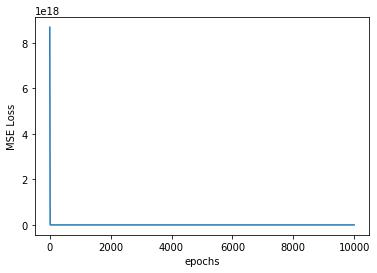

	Hessian at (1, 1, 1)
	 tensor([[ 0.1135,  0.0000,  0.0000],
        [ 0.0000, -0.0149,  0.0000],
        [ 0.0000,  0.0000, -0.0095]], grad_fn=<CopySlices>)
	Bootstrap attempt # 10
		Initiation #1
		Epoch 5000, current loss 3.81e+03, current formula \left(2.41e+03x_1^{-0.0468}-1.93e+03x_2^{-0.0274}-0.0196x_3^{0.969}-2.94e+02\right)
		Epoch 10000, current loss 3.69e+03, current formula \left(3.06e+03x_1^{-0.0353}-2.58e+03x_2^{-0.0198}-0.0247x_3^{0.933}-2.94e+02\right)
		Finished run #1, loss 3686.008056640625, best loss 3686.008056640625
		Initiation #2
		Epoch 5000, current loss 3.04, current formula \left(-1.17x_1^{0.841} + 0.406x_2^{0.89}-3.51x_3^{-0.011} + 3.43\right)
		Epoch 10000, current loss 0.0584, current formula \left(-0.976x_1^{0.866} + 0.275x_2^{0.945}-3.44x_3^{0.00129} + 3.46\right)
		Finished run #2, loss 0.05836634337902069, best loss 0.05836634337902069
		Initiation #3
		Epoch 5000, current loss 3.82e+03, current formula \left(2.36e+03x_1^{-0.0479}-1.93e+03x_2^{-0.0273

<IPython.core.display.Math object>

<IPython.core.display.Math object>

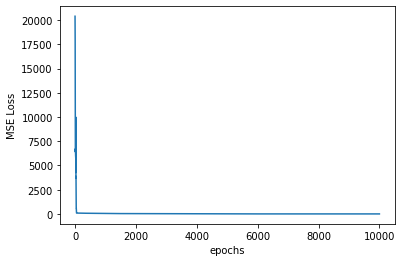

	Hessian at (1, 1, 1)
	 tensor([[ 0.1135,  0.0000,  0.0000],
        [ 0.0000, -0.0142,  0.0000],
        [ 0.0000,  0.0000,  0.0044]], grad_fn=<CopySlices>)
	Bootstrap attempt # 11
		Initiation #1
		Epoch 5000, current loss 7.57e+02, current formula \left(-1.05x_1^{0.854}-1.05e+03x_2^{-0.059} + 1.19e+02x_3^{-0.00762} + 7.27e+02\right)
		Epoch 10000, current loss 7.23e+02, current formula \left(-0.854x_1^{0.883}-1.33e+03x_2^{-0.0438} + 3.99e+02x_3^{-0.00181} + 7.27e+02\right)
		Finished run #1, loss 723.131103515625, best loss 723.131103515625
		Initiation #2
		Epoch 5000, current loss 3.85e+03, current formula \left(2.27e+03x_1^{-0.0502}-1.73e+03x_2^{-0.0309}-0.0862x_3^{0.769}-3.45e+02\right)
		Epoch 10000, current loss 3.74e+03, current formula \left(2.72e+03x_1^{-0.0405}-2.18e+03x_2^{-0.0238}-0.0863x_3^{0.763}-3.45e+02\right)
		Finished run #2, loss 3740.91845703125, best loss 723.131103515625
		Initiation #3
		Epoch 5000, current loss 7.33e+02, current formula \left(-0.634x_1^{0.92

<IPython.core.display.Math object>

<IPython.core.display.Math object>

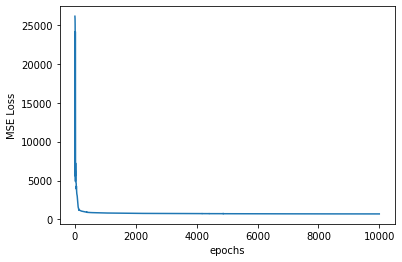

	Hessian at (1, 1, 1)
	 tensor([[ 4.5203e-02,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -5.8828e+01,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  6.5186e-01]], grad_fn=<CopySlices>)
	Bootstrap attempt # 12
		Initiation #1
		Epoch 5000, current loss 3.79e+03, current formula \left(2.44e+03x_1^{-0.046}-2.12e+03x_2^{-0.0248}-1.04x_3^{0.441}-1.3e+02\right)
		Epoch 10000, current loss 3.66e+03, current formula \left(3.26e+03x_1^{-0.0328}-2.94e+03x_2^{-0.0172}-1.04x_3^{0.434}-1.3e+02\right)
		Finished run #1, loss 3657.575927734375, best loss 3657.575927734375
		Initiation #2
		Epoch 5000, current loss 3.85e+03, current formula \left(2.23e+03x_1^{-0.0514}-1.82e+03x_2^{-0.0291}-12.1x_3^{0.176}-1.87e+02\right)
		Epoch 10000, current loss 3.76e+03, current formula \left(2.61e+03x_1^{-0.0425}-2.21e+03x_2^{-0.0235}-12.1x_3^{0.171}-1.87e+02\right)
		Finished run #2, loss 3759.38232421875, best loss 3657.575927734375
		Initiation #3
		Epoch 5000, current loss 1.05, current formula \left

<IPython.core.display.Math object>

<IPython.core.display.Math object>

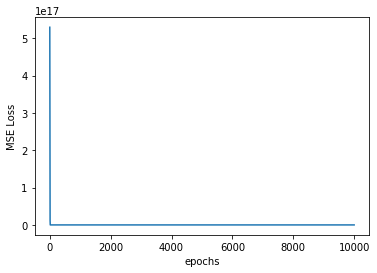

	Hessian at (1, 1, 1)
	 tensor([[ 0.1039,  0.0000,  0.0000],
        [ 0.0000, -0.0095,  0.0000],
        [ 0.0000,  0.0000,  8.3707]], grad_fn=<CopySlices>)
	Bootstrap attempt # 13
		Initiation #1
		Epoch 5000, current loss 7.42e+02, current formula \left(-0.967x_1^{0.866}-1.16e+03x_2^{-0.0524} + 2.75e+02x_3^{-0.00261} + 6.73e+02\right)
		Epoch 10000, current loss 7.22e+02, current formula \left(-0.835x_1^{0.886}-1.34e+03x_2^{-0.0434} + 4.63e+02x_3^{-0.0014} + 6.73e+02\right)
		Finished run #1, loss 721.9576416015625, best loss 721.9576416015625
		Initiation #2
		Epoch 5000, current loss 3.79e+03, current formula \left(2.49e+03x_1^{-0.0449}-2.02e+03x_2^{-0.026}-2.16x_3^{0.351}-2.7e+02\right)
		Epoch 10000, current loss 3.65e+03, current formula \left(3.37e+03x_1^{-0.0316}-2.91e+03x_2^{-0.0174}-2.16x_3^{0.346}-2.7e+02\right)
		Finished run #2, loss 3646.905517578125, best loss 721.9576416015625
		Initiation #3
		Epoch 5000, current loss 3.84e+03, current formula \left(2.27e+03x_1^{-0.0

<IPython.core.display.Math object>

<IPython.core.display.Math object>

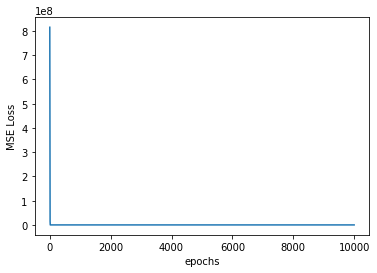

	Hessian at (1, 1, 1)
	 tensor([[  0.0841,   0.0000,   0.0000],
        [  0.0000, -60.9230,   0.0000],
        [  0.0000,   0.0000,   0.6513]], grad_fn=<CopySlices>)
	Bootstrap attempt # 14
		Initiation #1
		Epoch 5000, current loss 3.83e+03, current formula \left(2.31e+03x_1^{-0.0492}-1.94e+03x_2^{-0.0272}-3.87x_3^{0.29}-1.72e+02\right)
		Epoch 10000, current loss 3.74e+03, current formula \left(2.7e+03x_1^{-0.0409}-2.32e+03x_2^{-0.0222}-3.87x_3^{0.285}-1.72e+02\right)
		Finished run #1, loss 3741.18017578125, best loss 3741.18017578125
		Initiation #2
		Epoch 5000, current loss 3.82e+03, current formula \left(2.34e+03x_1^{-0.0481}-1.93e+03x_2^{-0.0273}-0.621x_3^{0.507}-2.12e+02\right)
		Epoch 10000, current loss 3.7e+03, current formula \left(2.92e+03x_1^{-0.0372}-2.52e+03x_2^{-0.0204}-0.621x_3^{0.501}-2.12e+02\right)
		Finished run #2, loss 3703.930908203125, best loss 3703.930908203125
		Initiation #3
		Epoch 5000, current loss 0.885, current formula \left(-1.06x_1^{0.854} + 0.331

<IPython.core.display.Math object>

<IPython.core.display.Math object>

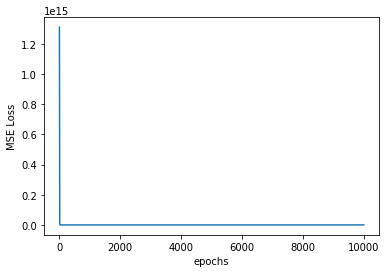

	Hessian at (1, 1, 1)
	 tensor([[ 0.1109,  0.0000,  0.0000],
        [ 0.0000, -0.0131,  0.0000],
        [ 0.0000,  0.0000,  0.0012]], grad_fn=<CopySlices>)
	Bootstrap attempt # 15
		Initiation #1
		Epoch 5000, current loss 1.29e+04, current formula \left(4.71x_1^{-12.7}-9.81e+02x_2^{-0.0571}-8.5e+02x_3^{-2.36} + 5.93e+02\right)
		Epoch 10000, current loss 1.28e+04, current formula \left(4.71x_1^{-12.6}-1.29e+03x_2^{-0.0407}-8.53e+02x_3^{-2.35} + 9.05e+02\right)
		Finished run #1, loss 12830.501953125, best loss 12830.501953125
		Initiation #2
		Epoch 5000, current loss 3.78e+03, current formula \left(2.49e+03x_1^{-0.0449}-2.09e+03x_2^{-0.025}-0.688x_3^{0.492}-2.01e+02\right)
		Epoch 10000, current loss 3.65e+03, current formula \left(3.33e+03x_1^{-0.0323}-2.93e+03x_2^{-0.0173}-0.693x_3^{0.485}-2.01e+02\right)
		Finished run #2, loss 3654.487060546875, best loss 3654.487060546875
		Initiation #3
		Epoch 5000, current loss 7.45e+02, current formula \left(-0.637x_1^{0.924}-1.1e+03x_2^{-

<IPython.core.display.Math object>

<IPython.core.display.Math object>

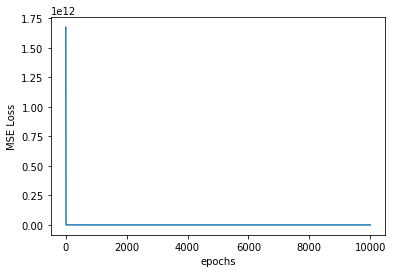

	Hessian at (1, 1, 1)
	 tensor([[ 0.1199,  0.0000,  0.0000],
        [ 0.0000, -0.0059,  0.0000],
        [ 0.0000,  0.0000,  2.0642]], grad_fn=<CopySlices>)
	Bootstrap attempt # 16
		Initiation #1
		Epoch 5000, current loss 0.532, current formula \left(-1.04x_1^{0.857} + 0.312x_2^{0.928} + 2.15x_3^{0.00117}-2.14\right)
		Epoch 10000, current loss 0.0131, current formula \left(-0.96x_1^{0.868} + 0.266x_2^{0.95} + 2.14x_3^{-0.00326}-2.14\right)
		Finished run #1, loss 0.01311844028532505, best loss 0.01311844028532505
		Initiation #2
		Epoch 5000, current loss 3.77e+03, current formula \left(2.56e+03x_1^{-0.0434}-2.04e+03x_2^{-0.0256}-4.94x_3^{0.259}-3.22e+02\right)
		Epoch 10000, current loss 3.65e+03, current formula \left(3.31e+03x_1^{-0.0321}-2.79e+03x_2^{-0.0182}-4.94x_3^{0.254}-3.22e+02\right)
		Finished run #2, loss 3653.97265625, best loss 0.01311844028532505
		Initiation #3
		Epoch 5000, current loss 7.3e+02, current formula \left(-0.561x_1^{0.942}-1.25e+03x_2^{-0.0477} + 3.76e

<IPython.core.display.Math object>

<IPython.core.display.Math object>

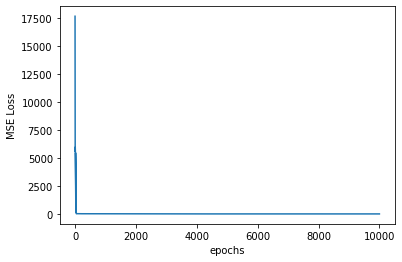

	Hessian at (1, 1, 1)
	 tensor([[ 0.1102,  0.0000,  0.0000],
        [ 0.0000, -0.0127,  0.0000],
        [ 0.0000,  0.0000,  0.0070]], grad_fn=<CopySlices>)
	Bootstrap attempt # 17
		Initiation #1
		Epoch 5000, current loss 3.88e+03, current formula \left(2.11e+03x_1^{-0.055}-2.14e+03x_2^{-0.0243}-1.78x_3^{0.382} + 2.36e+02\right)
		Epoch 10000, current loss 3.68e+03, current formula \left(3.02e+03x_1^{-0.0358}-3.06e+03x_2^{-0.0165}-1.78x_3^{0.371} + 2.36e+02\right)
		Finished run #1, loss 3684.180908203125, best loss 3684.180908203125
		Initiation #2
		Epoch 5000, current loss 3.83e+03, current formula \left(2.31e+03x_1^{-0.0493}-1.82e+03x_2^{-0.0291}-1.73x_3^{0.382}-2.83e+02\right)
		Epoch 10000, current loss 3.74e+03, current formula \left(2.73e+03x_1^{-0.0403}-2.25e+03x_2^{-0.023}-1.73x_3^{0.376}-2.83e+02\right)
		Finished run #2, loss 3737.417724609375, best loss 3684.180908203125
		Initiation #3
		Epoch 5000, current loss 3.77e+03, current formula \left(2.53e+03x_1^{-0.044}-2.26

<IPython.core.display.Math object>

<IPython.core.display.Math object>

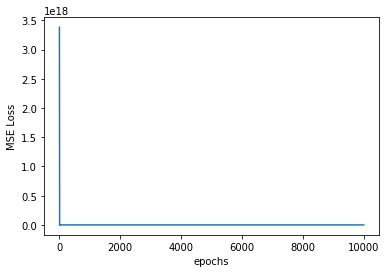

	Hessian at (1, 1, 1)
	 tensor([[ 9.1702e-03,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00, -6.4371e+01,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  6.6695e-01]], grad_fn=<CopySlices>)
	Bootstrap attempt # 18
		Initiation #1
		Epoch 5000, current loss 7.61e+02, current formula \left(-0.377x_1^{0.998}-1.05e+03x_2^{-0.0597} + 1.52e+02x_3^{-0.00508} + 6.65e+02\right)
		Epoch 10000, current loss 7.31e+02, current formula \left(-0.478x_1^{0.965}-1.25e+03x_2^{-0.0475} + 3.64e+02x_3^{-0.0016} + 6.65e+02\right)
		Finished run #1, loss 731.3892822265625, best loss 731.3892822265625
		Initiation #2
		Epoch 5000, current loss 3.84e+03, current formula \left(2.27e+03x_1^{-0.0502}-1.85e+03x_2^{-0.0287}-0.513x_3^{0.533}-2.28e+02\right)
		Epoch 10000, current loss 3.75e+03, current formula \left(2.63e+03x_1^{-0.0421}-2.21e+03x_2^{-0.0235}-0.512x_3^{0.528}-2.28e+02\right)
		Finished run #2, loss 3754.849609375, best loss 731.3892822265625
		Initiation #3


KeyboardInterrupt: 

In [5]:
for example in range(10):
    # Creating Random Data
    print("Example", example + 1)
    lambd_num = torch.randint(-50, 50, (1, 3)).float().to(device)
    lambd_denom = torch.randint(1, 50, (1, 3)).to(device)
    lambd = lambd_num / lambd_denom
    print(PrettyRepresent(lambd_num), PrettyRepresent(lambd_denom), PrettyRepresent(lambd))
    power_num = torch.randint(-50, 50, (1, 3)).float().to(device)
    power_denom = torch.randint(1, 50, (1, 3)).to(device)
    power = power_num / power_denom
    print(PrettyRepresent(power_num), PrettyRepresent(power_denom), PrettyRepresent(power))
    print()
    y = torch.sum(lambd * X**power, 1, keepdim=True)
    y = y.to(device)
    train = torch.cat([X, y], dim=1)
    N = len(X)
    bootstrap_results = {}
    for bootstrap_attempt in range(20):
        print("\tBootstrap attempt #", bootstrap_attempt)
        bootstrap_index = np.random.choice(np.arange(N), size=(N, ), replace=True)
        train_bootstrap = train[bootstrap_index]

        # Learn Formula
        formula, losses = Formula.LearnFormula(X, y, optimizer_for_formula=optim.Rprop, 
                                               n_init=5, max_iter=10000, device=device)
        print("\t", end='')
        functions.PrintFormula(formula)
        print("\t", end='')
        functions.PrintFormula(formula.simplify(X, y))
        plt.xlabel("epochs")
        plt.ylabel("MSE Loss")
        plt.plot(losses)
        plt.show()

        # Hessian at (1, 1, 1)
        print("\tHessian at (1, 1, 1)")
        X_grad = torch.tensor([[1., 1., 1.]], requires_grad=True)
        res = formula(X_grad)[0][0]
#         print(res, res.size())
        h = hessian.hessian(res, X_grad, create_graph=True)
        print("\t", h)
        for key, value in formula.state_dict().items():
            if isinstance(value, torch.Tensor) and value.size() == torch.Size([1, 1]):
#                 print(key, value)
                if key in bootstrap_results:
                    bootstrap_results[key].append(value.item())
                else:
                    bootstrap_results[key] = [value.item()]
    print("plotting diagrams for coefficients")
    for key, value in bootstrap_results.items():
        print("\tplotting", key)       
        plt.eventplot(value)
        plt.show()
    print("\n---------------------------------------------------------------------------------------------\n")

In [ ]:
from torchcontrib.optim import SWA

...
...

# training loop
base_opt = torch.optim.SGD(model.parameters(), lr=0.1)
opt = torchcontrib.optim.SWA(base_opt, swa_start=10, swa_freq=5, swa_lr=0.05)
for _ in range(100):
     opt.zero_grad()
     loss_fn(model(input), target).backward()
     opt.step()
opt.swap_swa_sgd()

In [ ]:
! pip3 install torchcontrib